In [5]:
import datasets

In [6]:
dataset = datasets.load_dataset(
    './data/ecg_preprocessed', 
    data_files='30100.csv',
)['train']

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\datasets\load.py:923: FutureWarning: The repository for ecg_preprocessed contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at ./data/ecg_preprocessed\ecg_preprocessed.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [7]:
n_window = 60 * 1000
sampling_rate = 1000

In [8]:
window_shift_size = 0.25
step_size = int(window_shift_size * sampling_rate)

### Frequencies

In [9]:
import neurokit2 as nk

In [10]:
peaks, _ = nk.ecg_peaks(dataset['ECG_Clean'], sampling_rate=sampling_rate)

HRV_ULF   HRV_VLF    HRV_LF    HRV_HF       HRV_VHF    HRV_TP  HRV_LFHF  \
0  0.000097  0.000173  0.000228  0.000009  2.098600e-07  0.000508  24.24923   

    HRV_LFn  HRV_HFn   HRV_LnHF  
0  0.448368  0.01849 -11.574658

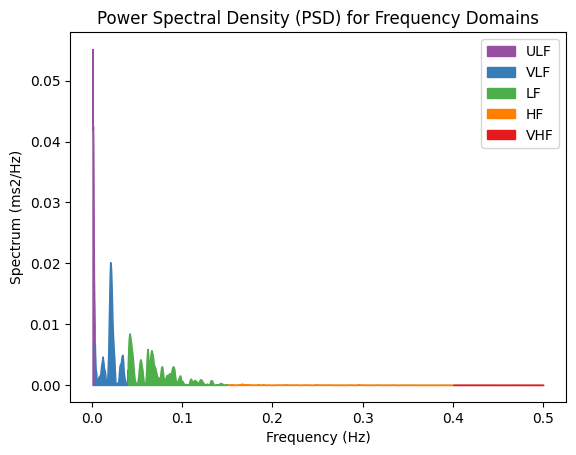

In [12]:
nk.hrv_frequency(peaks, sampling_rate=1000, show=True, normalize=True)

HRV_MeanNN    HRV_SDNN  HRV_SDANN1  HRV_SDNNI1  HRV_SDANN2  HRV_SDNNI2  \
0  926.452404  782.019089  992.818277  476.078089  881.722172  478.122388   

   HRV_SDANN5  HRV_SDNNI5   HRV_RMSSD    HRV_SDSD  ...  HRV_SampEn  \
0  882.980514  507.355732  844.688947  844.733716  ...    0.087319   

   HRV_ShanEn  HRV_FuzzyEn  HRV_MSEn  HRV_CMSEn  HRV_RCMSEn    HRV_CD  \
0    9.653612     0.113432  0.448047   0.767753    0.707924  0.193355   

    HRV_HFD   HRV_KFD   HRV_LZC  
0  1.914937  1.927776  0.271478  

[1 rows x 91 columns]

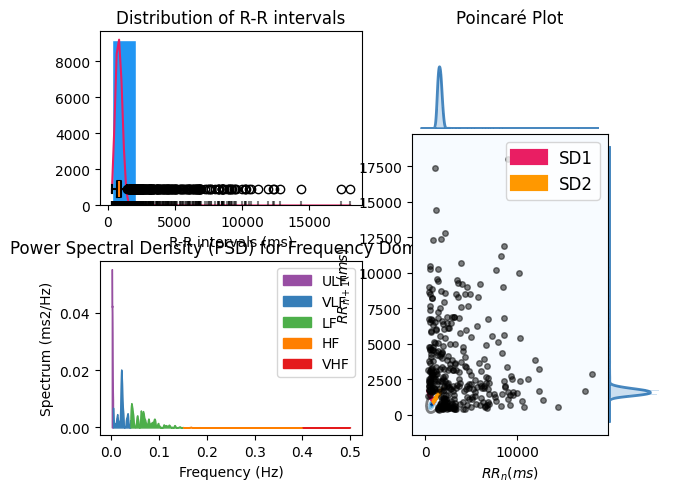

In [13]:
nk.hrv(peaks, sampling_rate=1000, show=True)

In [16]:
baseline = ['Sitting', 'Recov1', 'Recov2', 'Recov3', 'Recov4', 'Recov5', 'Recov6']
mental_stress = ['TA', 'SSST_Sing_countdown', 'Pasat', 'Raven', 'TA_repeat', 'Pasat_repeat']
high_physical_stress = ['Treadmill1', 'Treadmill2', 'Treadmill3', 'Treadmill4', 'Walking_fast_pace', 'Cycling', 'stairs_up_and_down']
moderate_physical_stress = ['Walking_own_pace', 'Dishes', 'Vacuum']
low_physical_stress = ['Standing', 'Lying_supine', 'Recov_standing']

In [20]:
df = dataset.to_pandas()

In [41]:
for category in baseline:
    df.loc[df['category'] == category, 'label'] = 0
for category in mental_stress:
    df.loc[df['category'] == category, 'label'] = 1
for category in high_physical_stress:
    df.loc[df['category'] == category, 'label'] = 2
for category in moderate_physical_stress:
    df.loc[df['category'] == category, 'label'] = 3
for category in low_physical_stress:
    df.loc[df['category'] == category, 'label'] = 4

In [42]:
import matplotlib.pyplot as plt

In [43]:
plt.rcParams["figure.figsize"] = (20, 10)

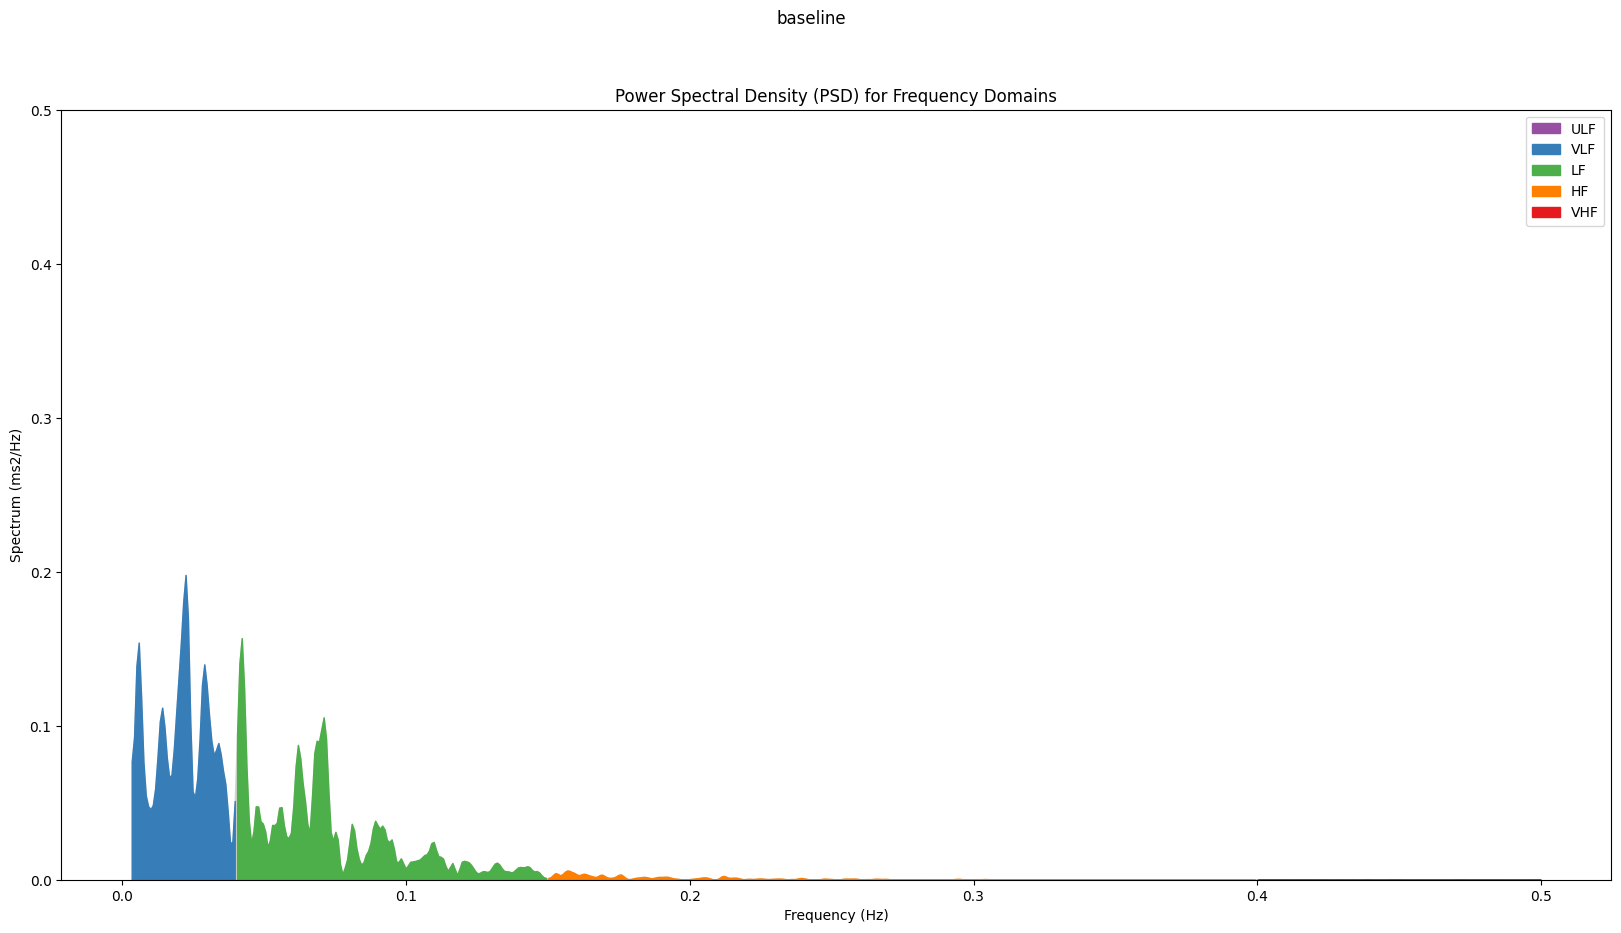

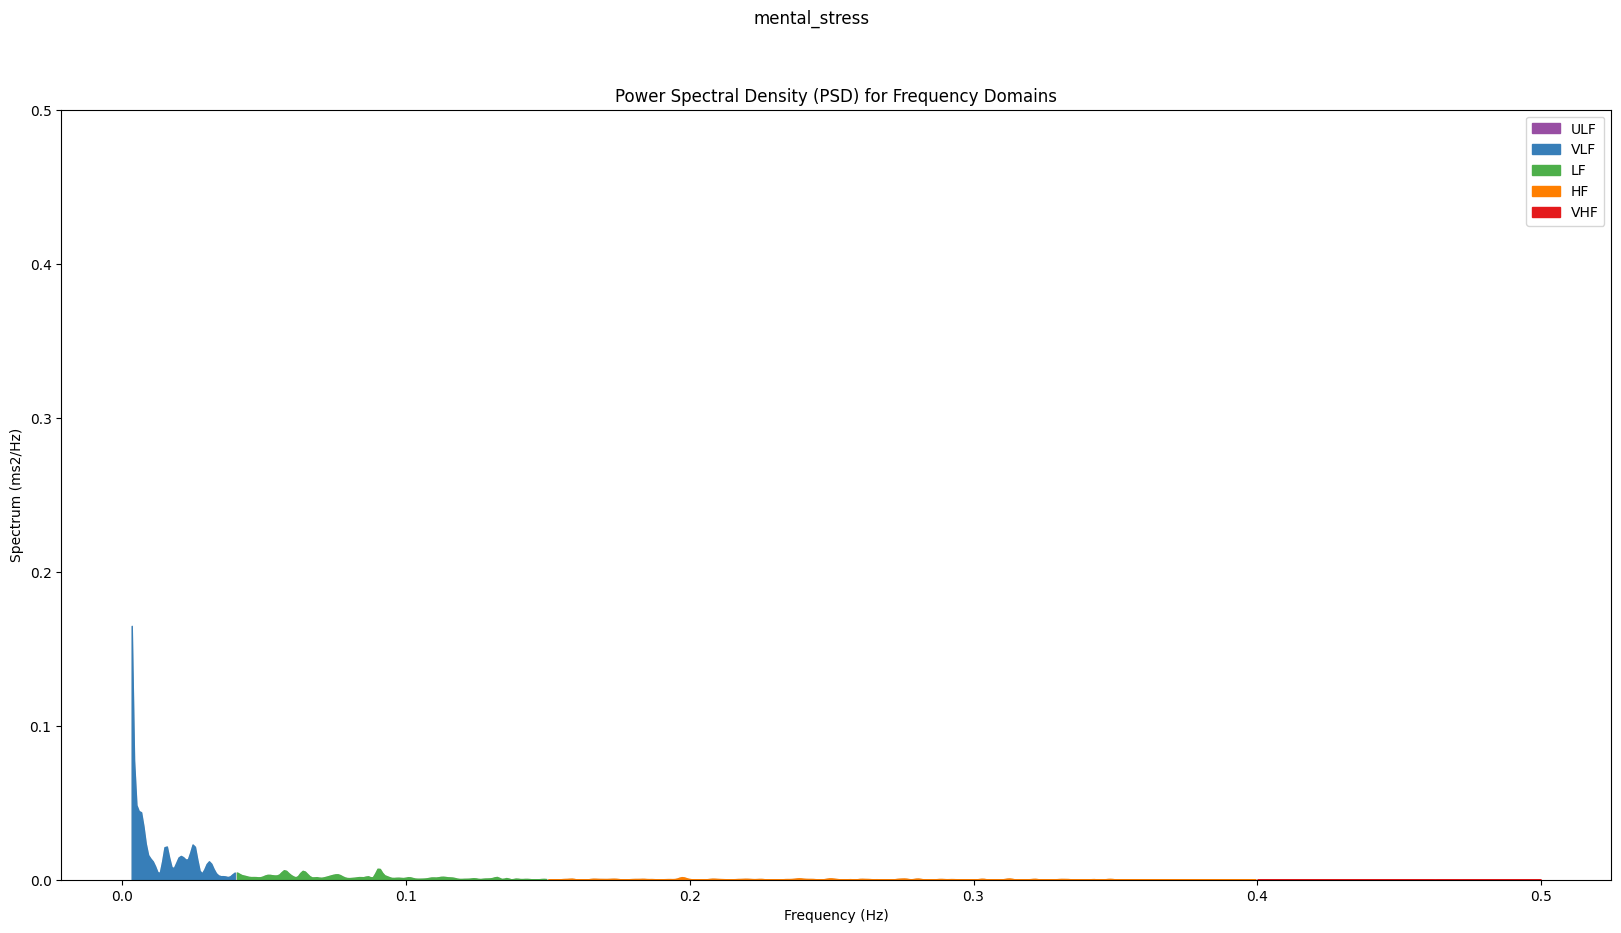

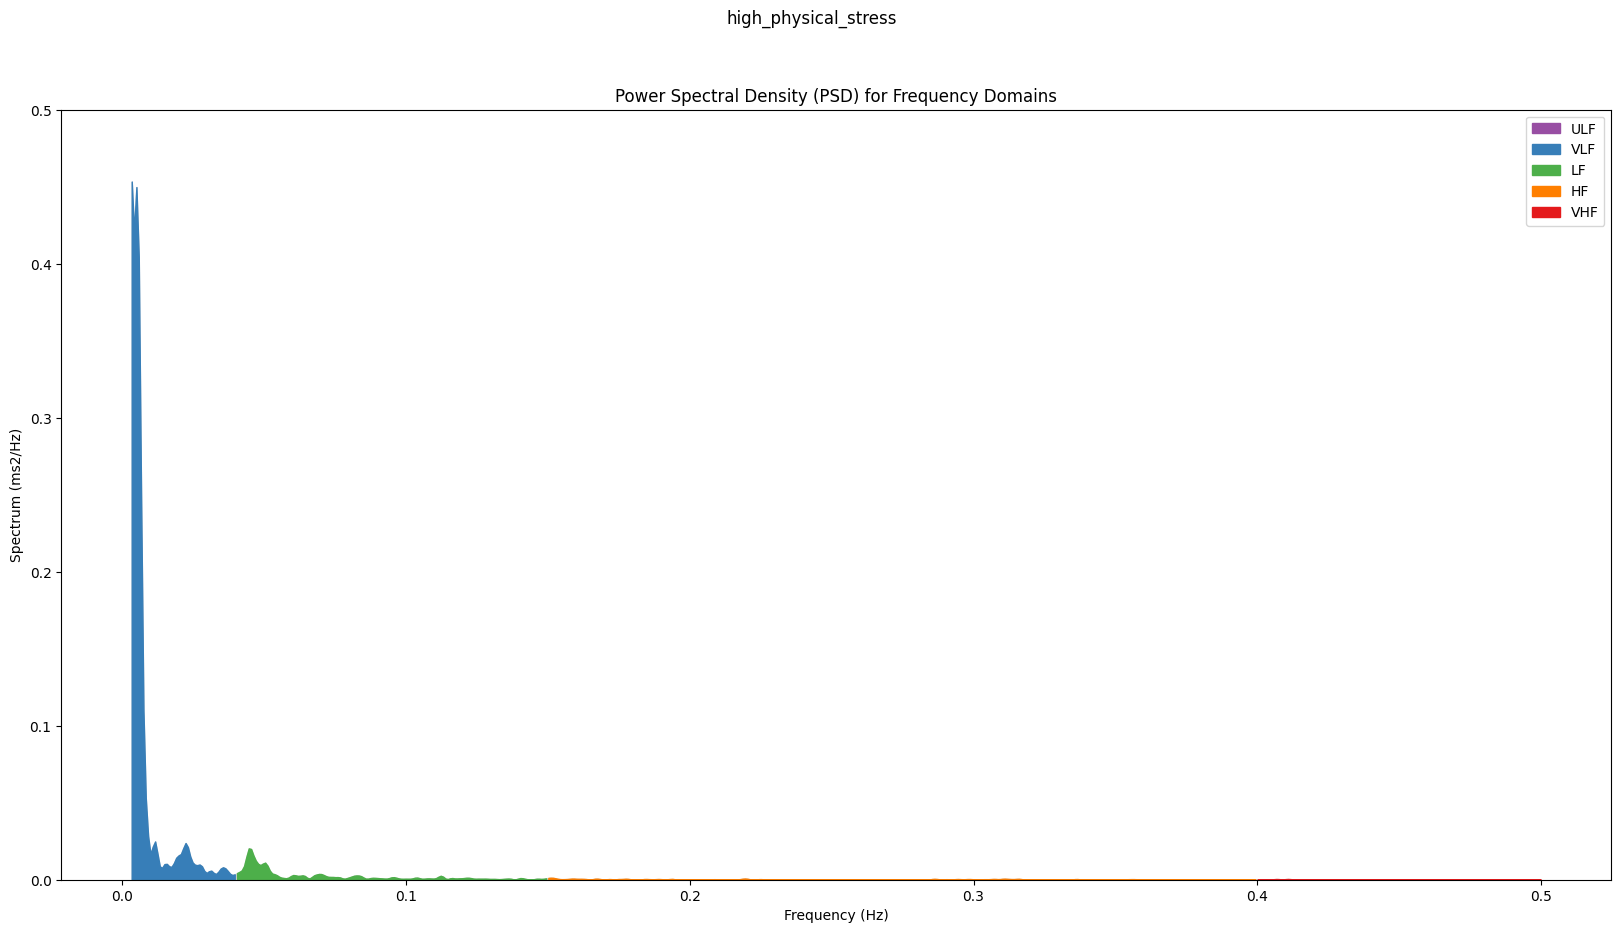

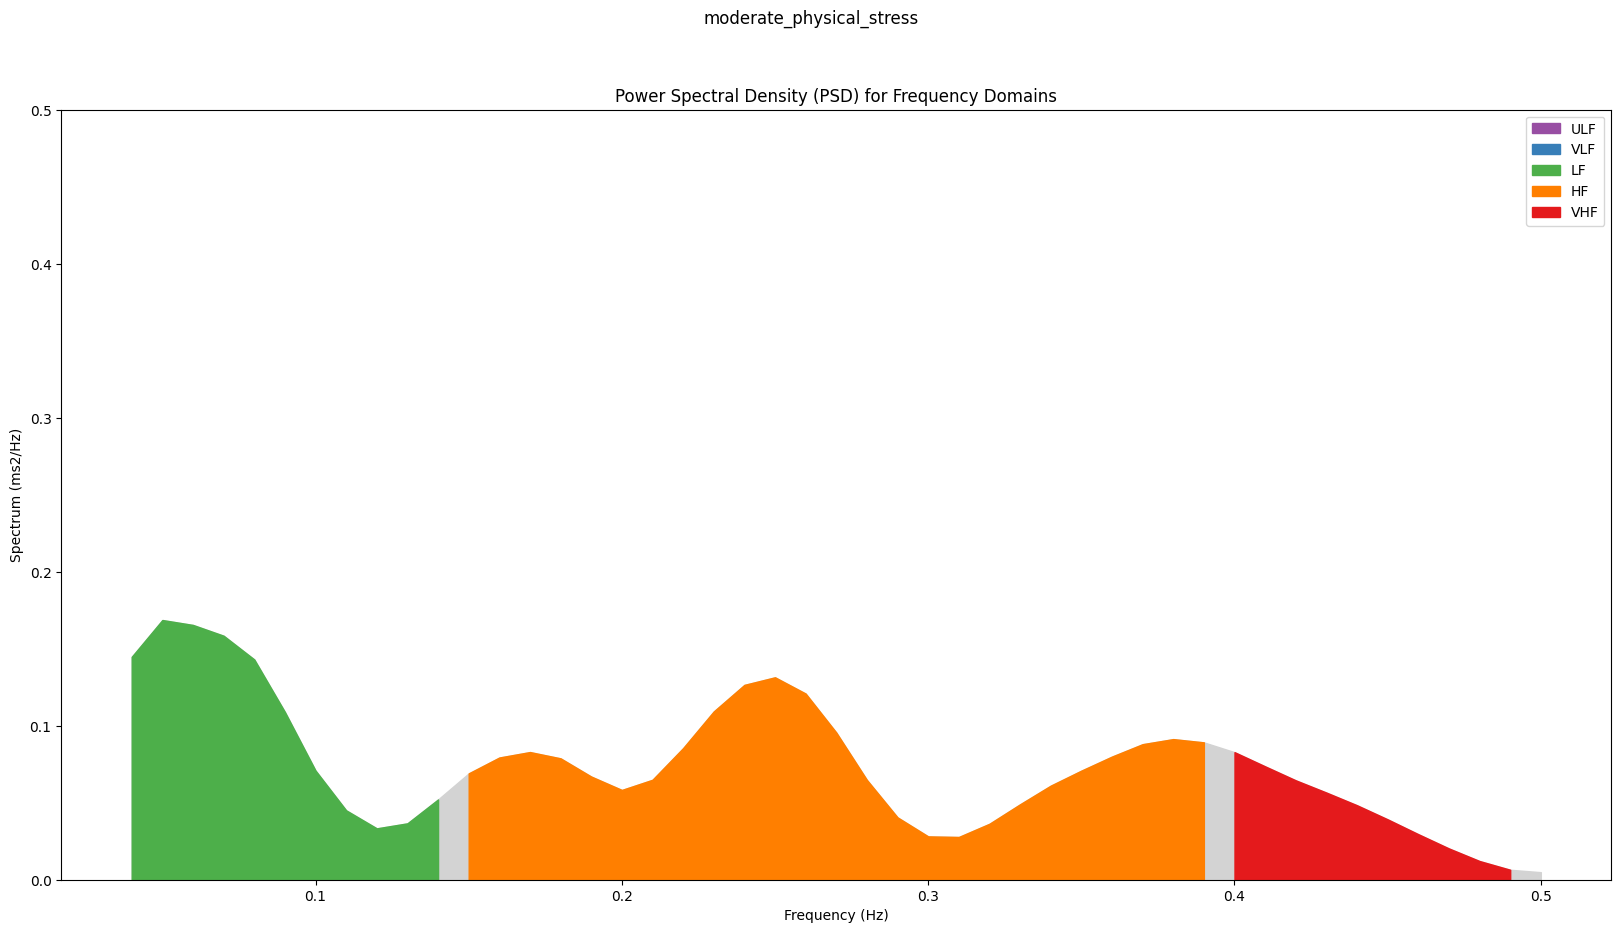

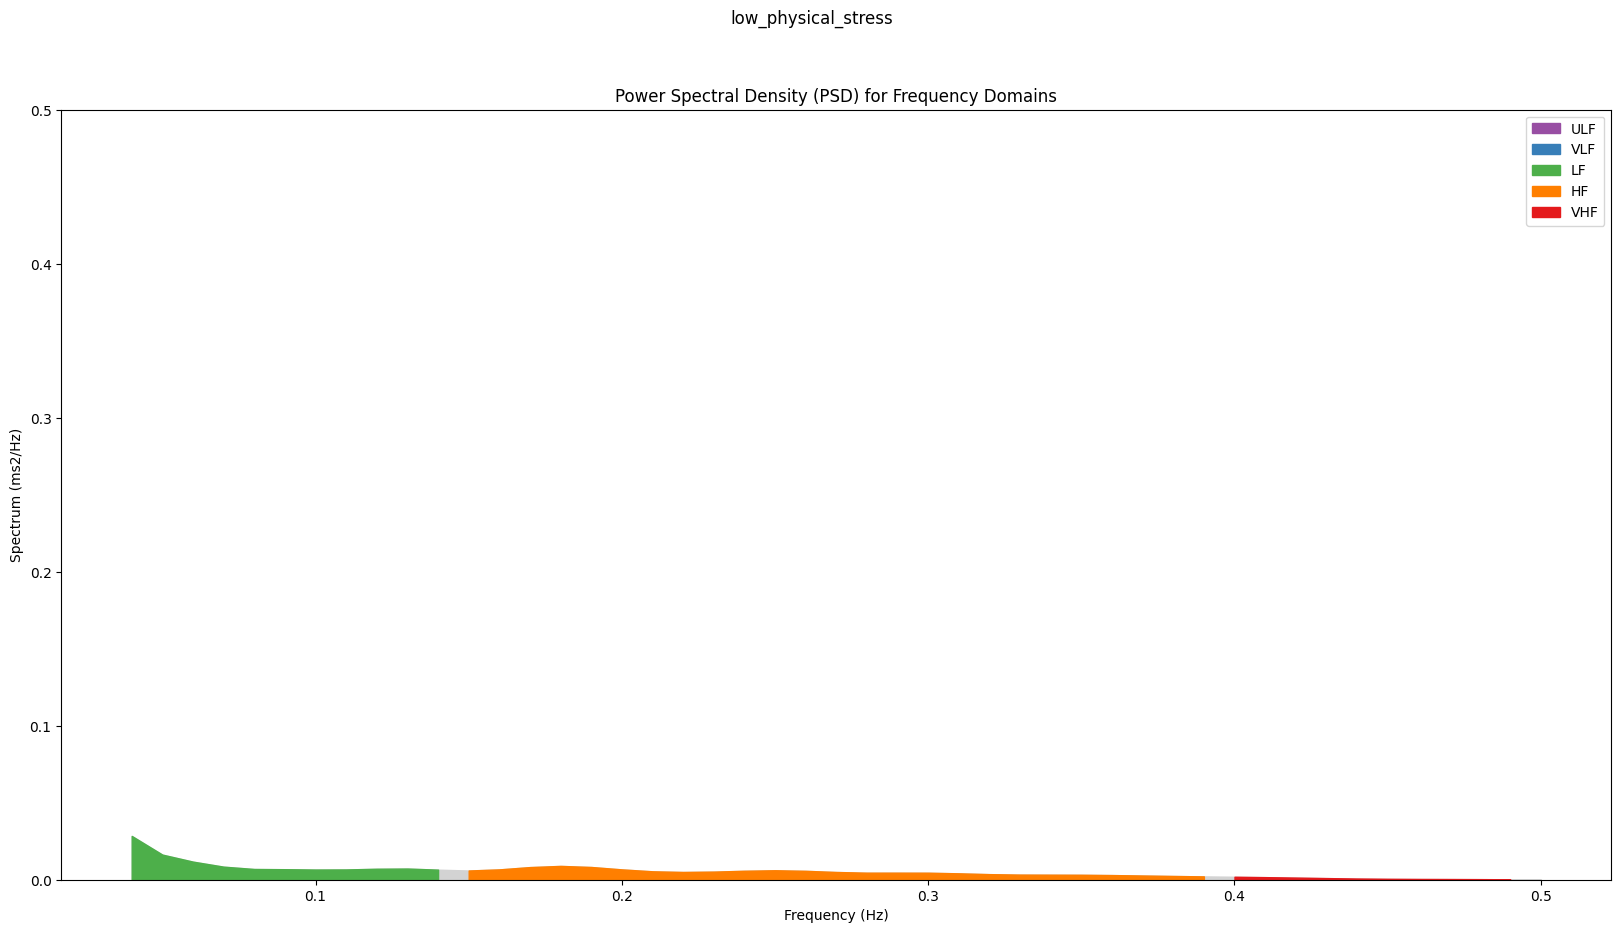

In [46]:
for idx, category in enumerate(['baseline', 'mental_stress', 'high_physical_stress', 'moderate_physical_stress', 'low_physical_stress']):
    peaks, _ = nk.ecg_peaks(df[df['label'] == idx]['ECG_Clean'], sampling_rate=sampling_rate)
    nk.hrv_frequency(peaks, sampling_rate=1000, show=True, normalize=True)
    plt.suptitle(category)
    plt.ylim(0, 0.5)

In [39]:
plt.rcParams["figure.figsize"] = (20, 10)

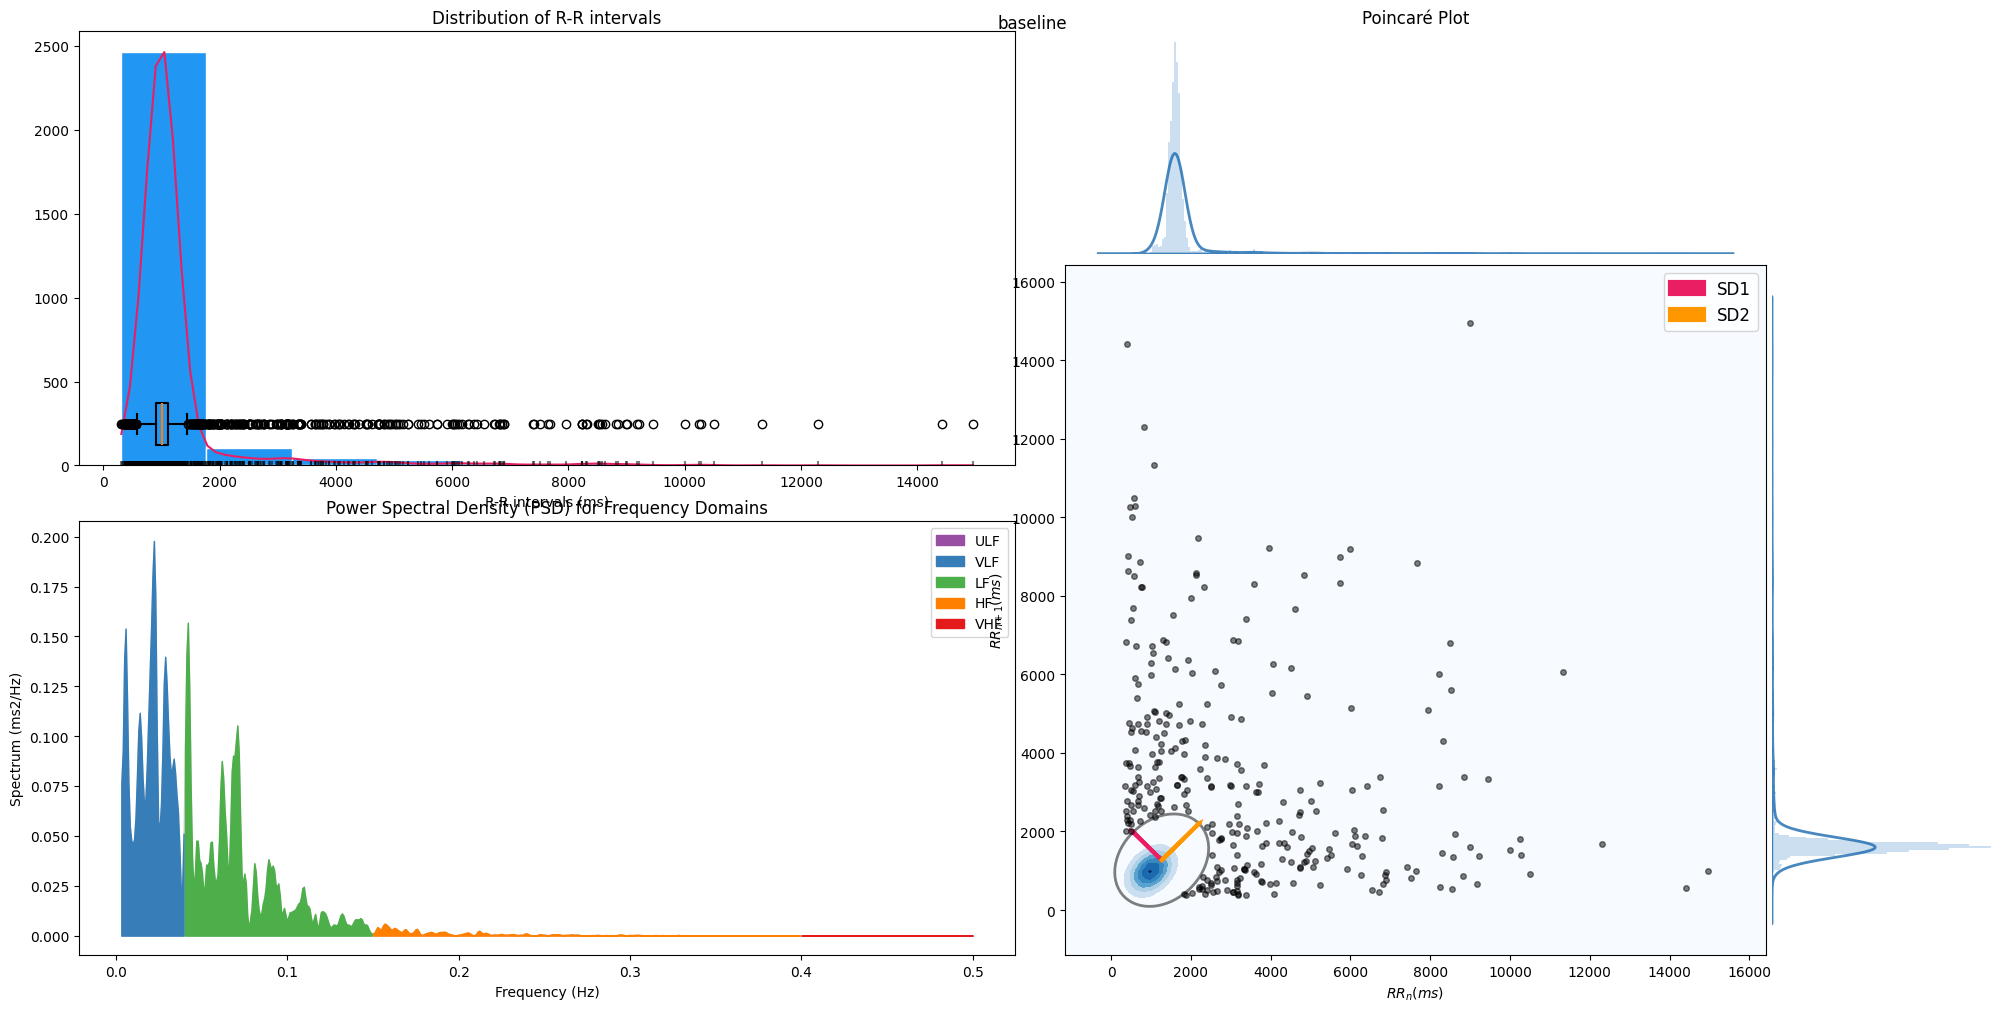

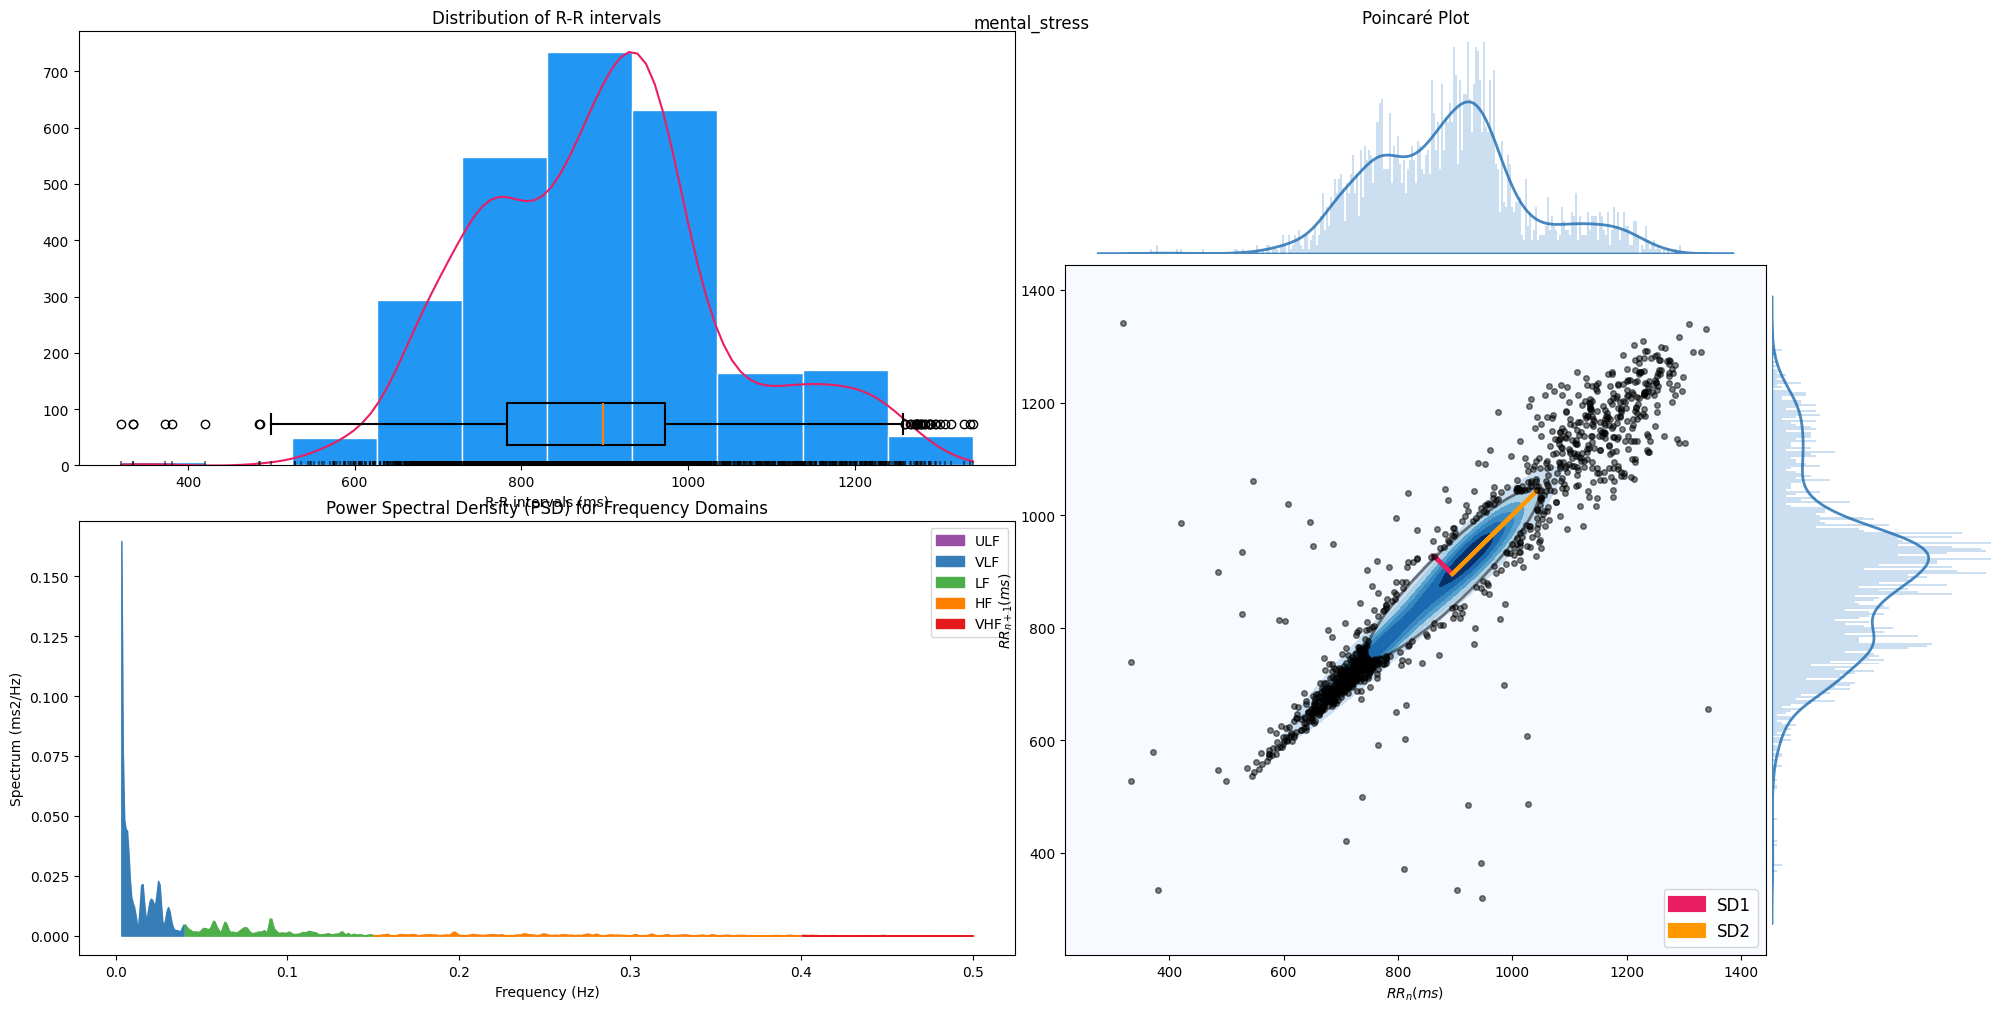

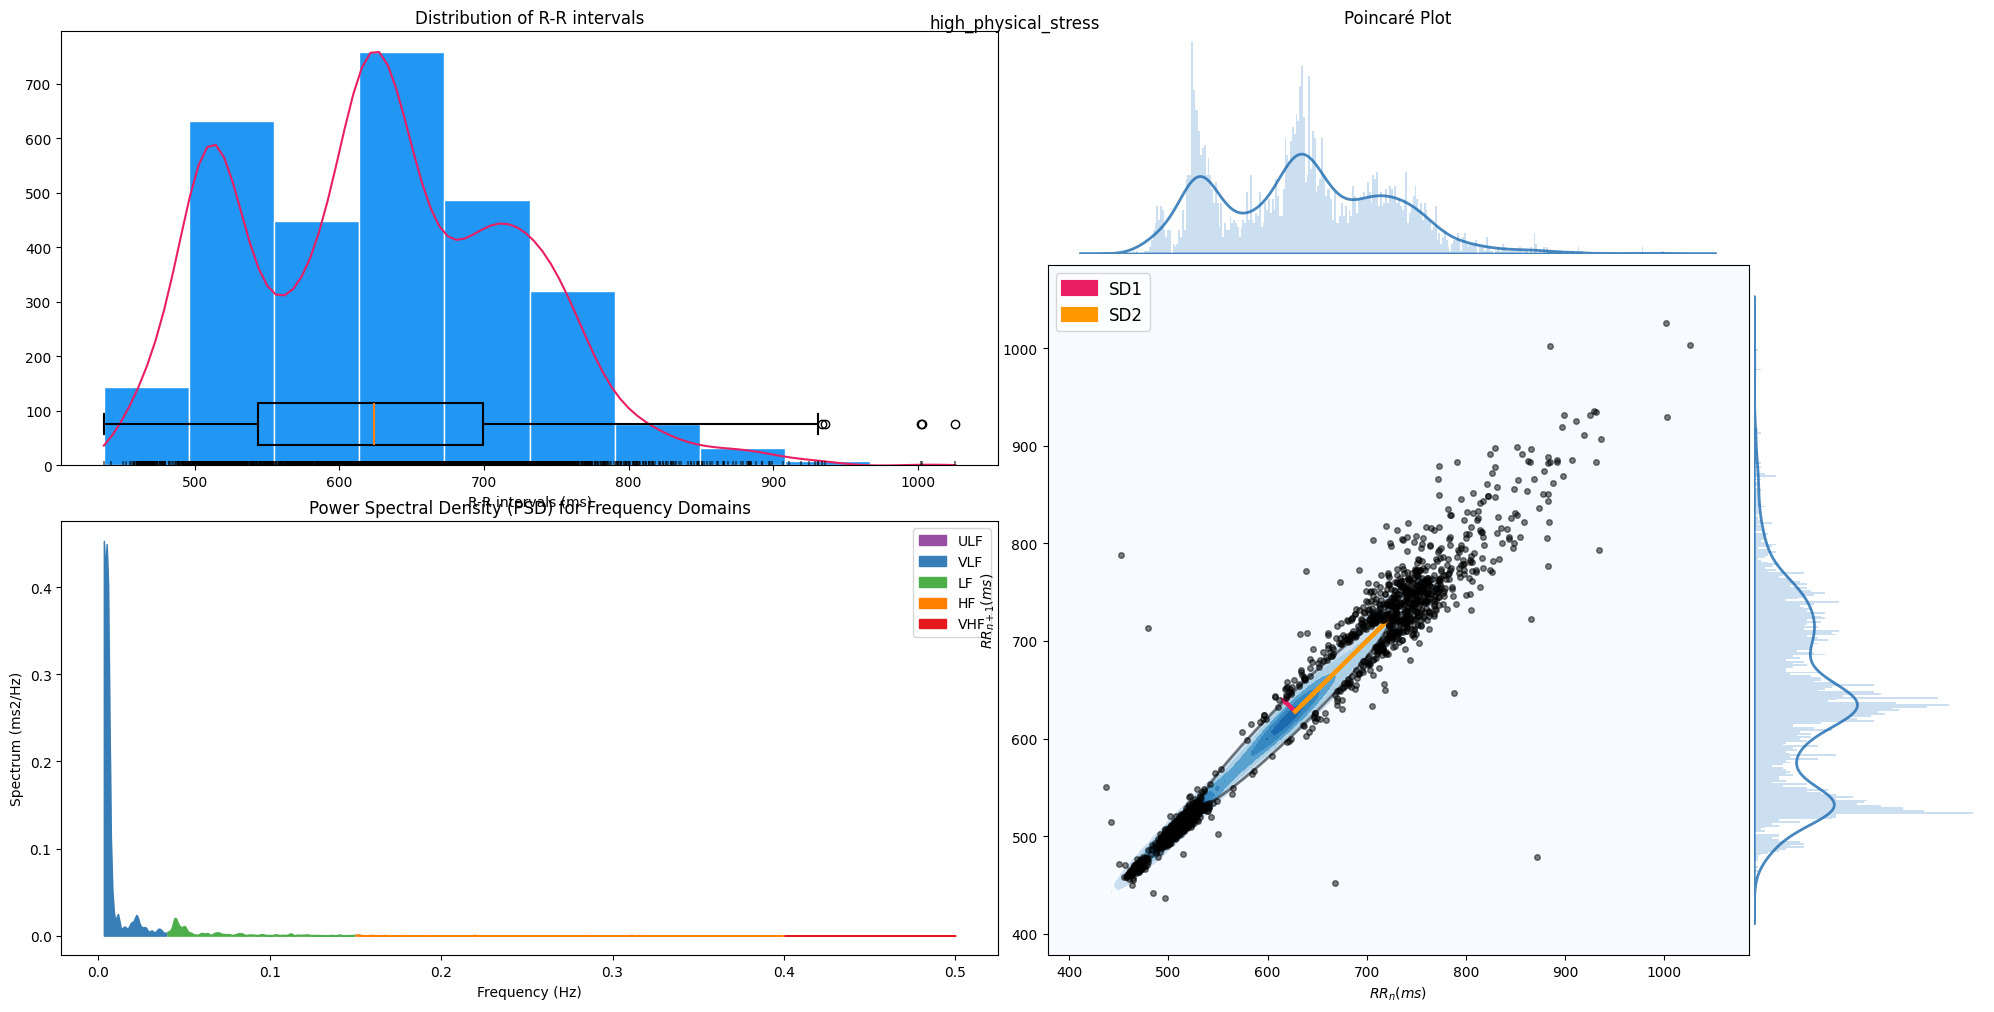

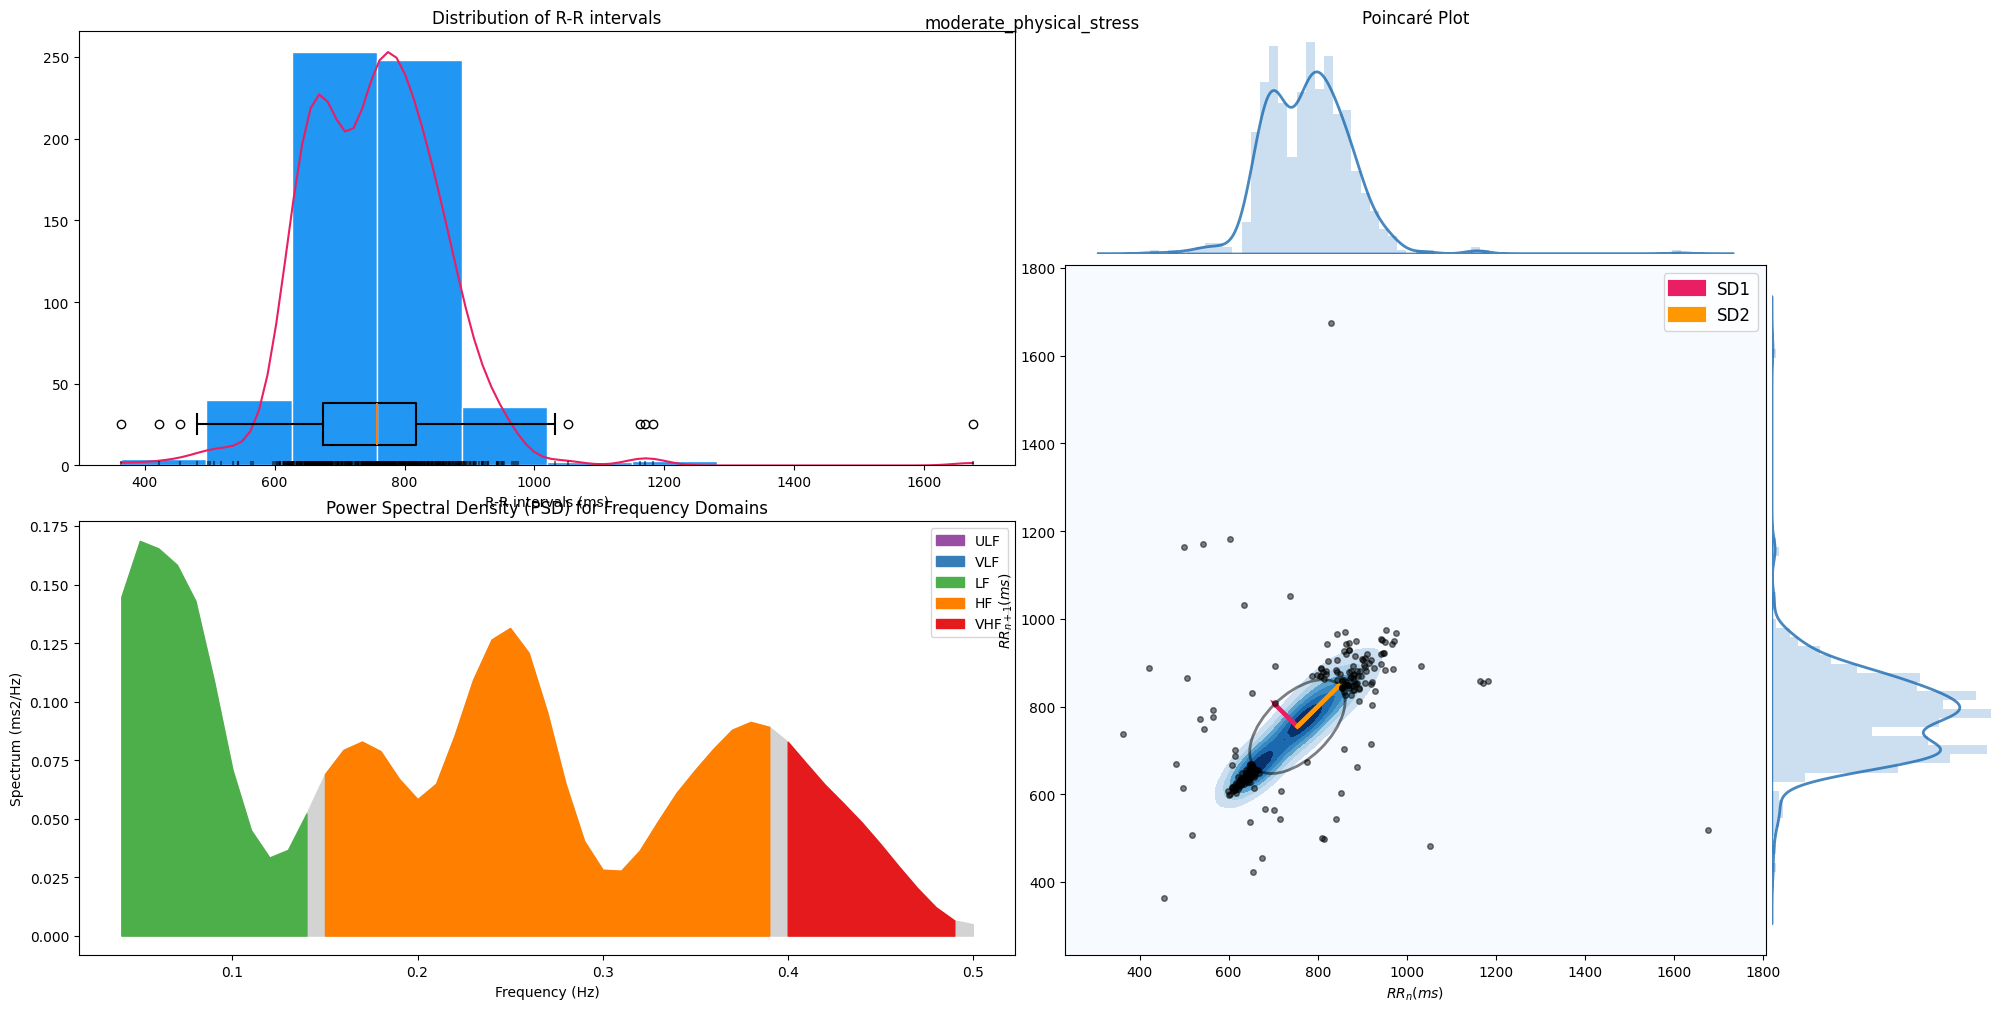

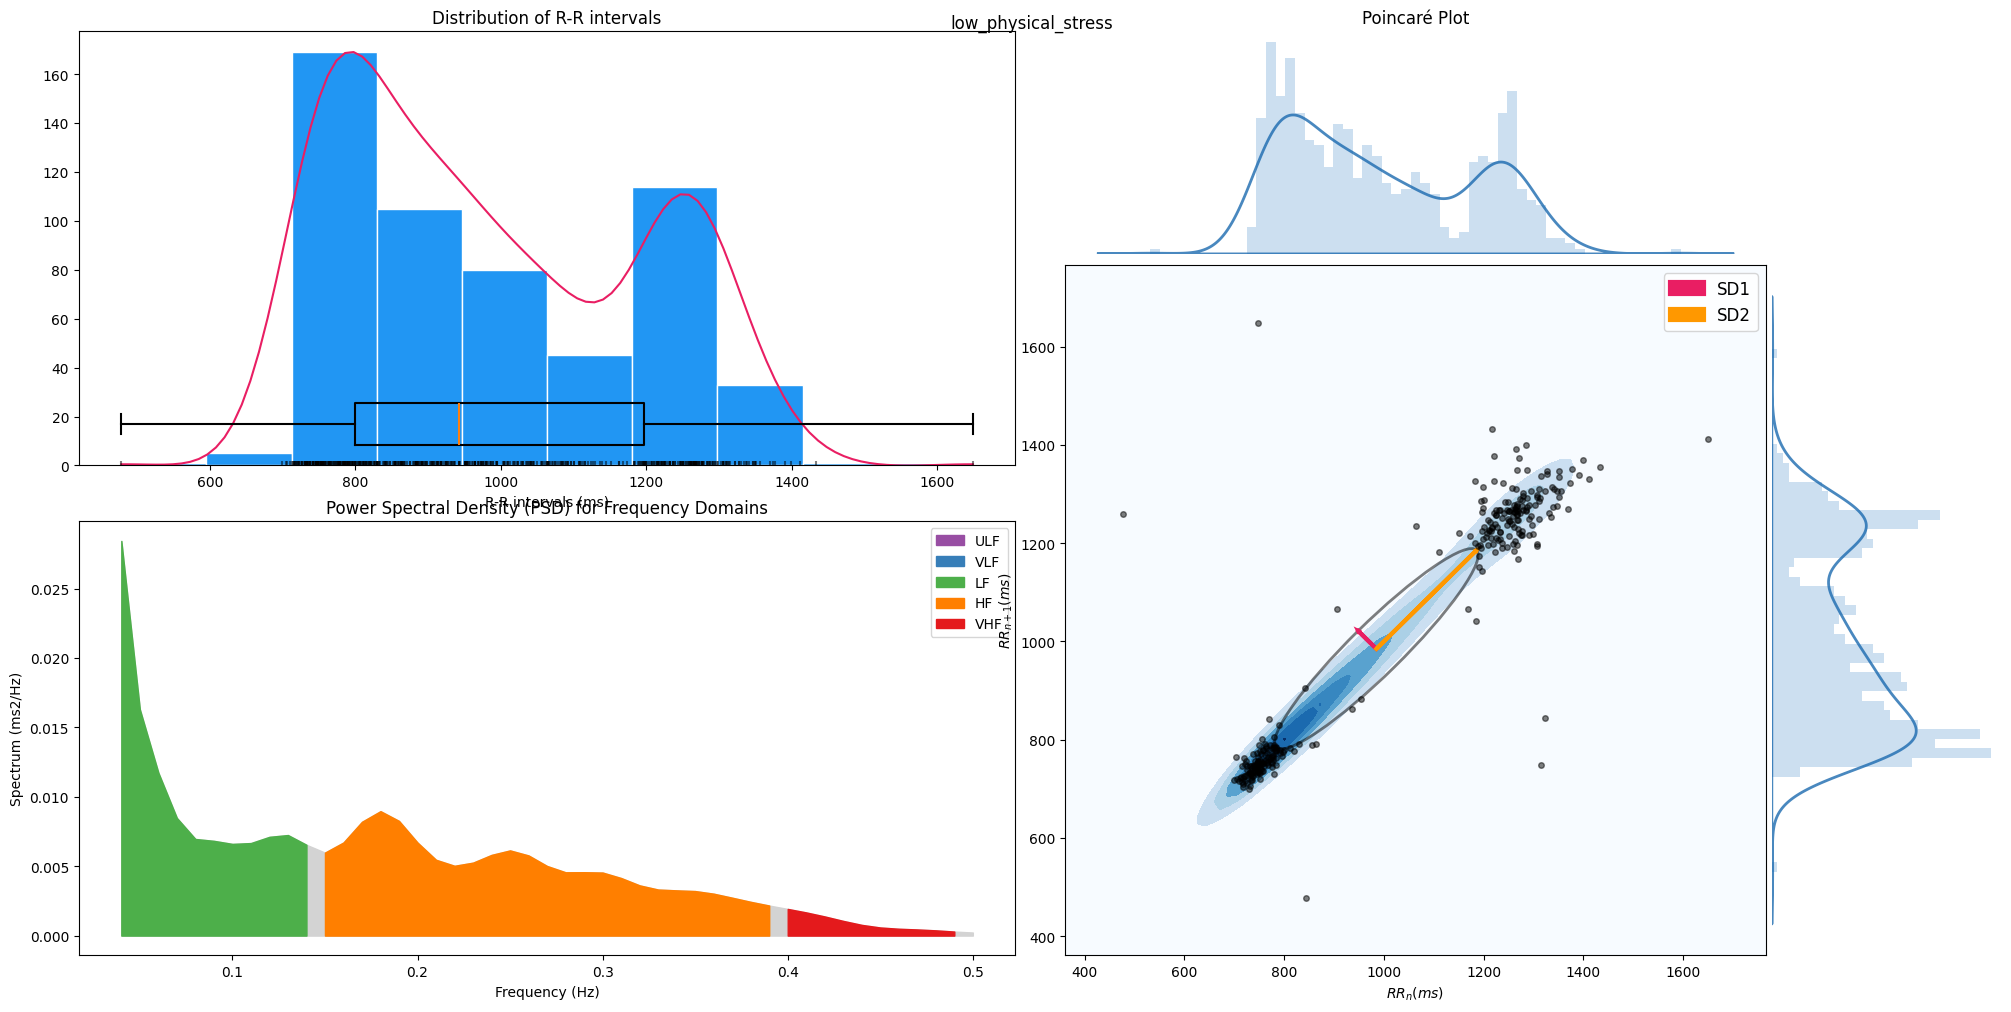

In [45]:
for idx, category in enumerate(['baseline', 'mental_stress', 'high_physical_stress', 'moderate_physical_stress', 'low_physical_stress']):
    peaks, _ = nk.ecg_peaks(df[df['label'] == idx]['ECG_Clean'], sampling_rate=sampling_rate)
    nk.hrv(peaks, sampling_rate=1000, show=True)
    plt.suptitle(category)

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\neurokit2\hrv\hrv_frequency.py:267: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  __, ax = plt.subplots()


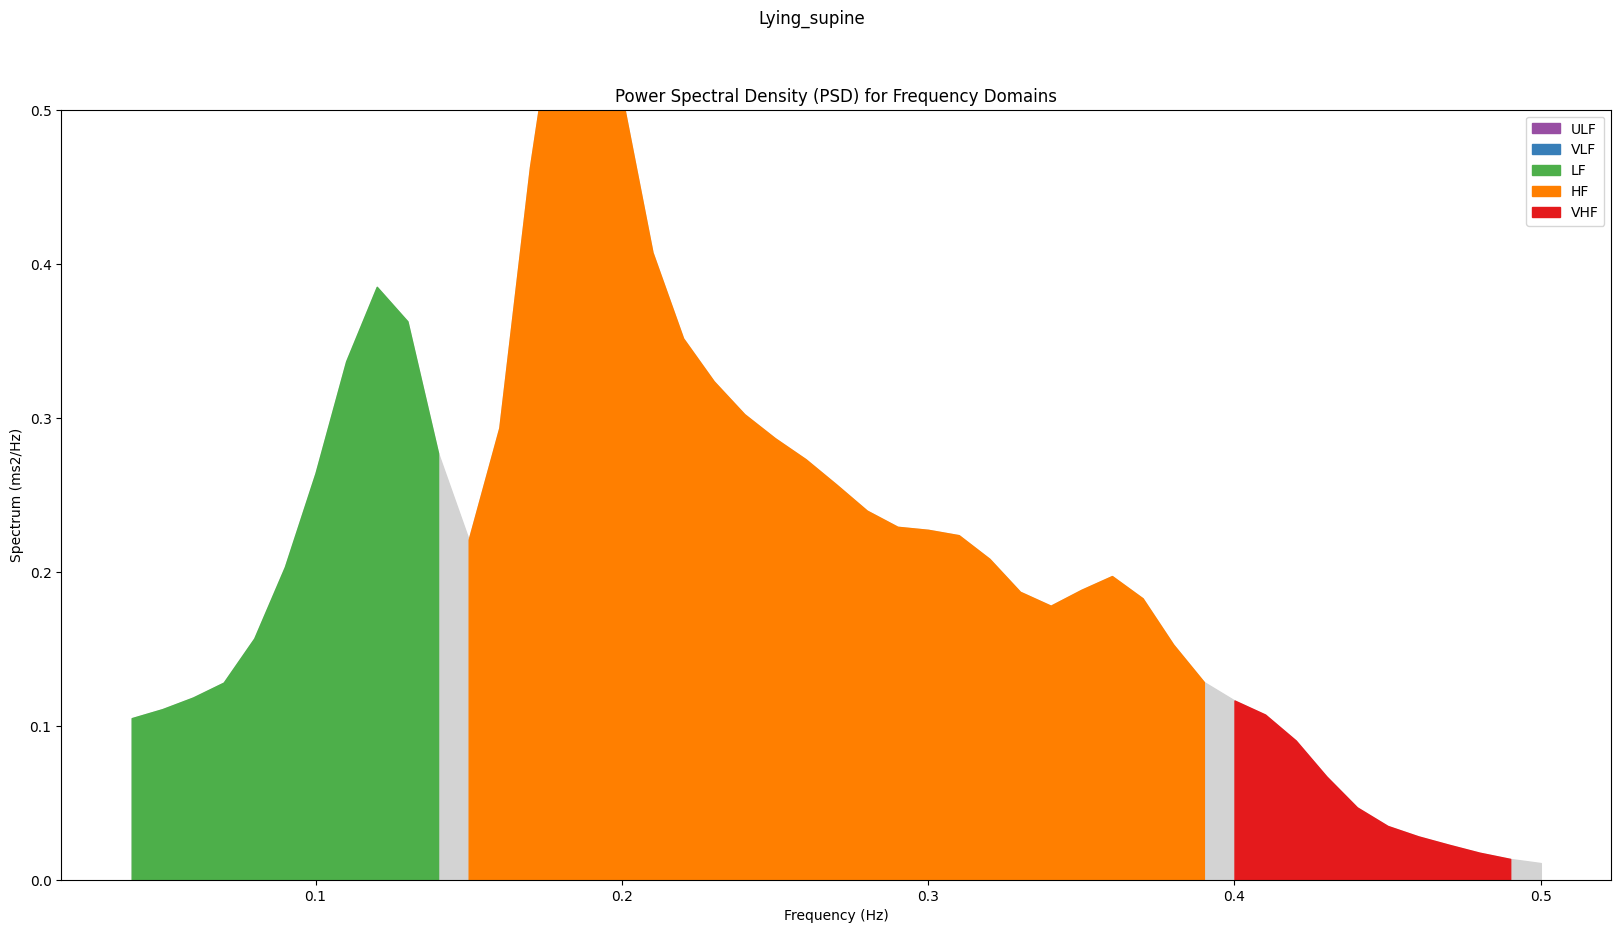

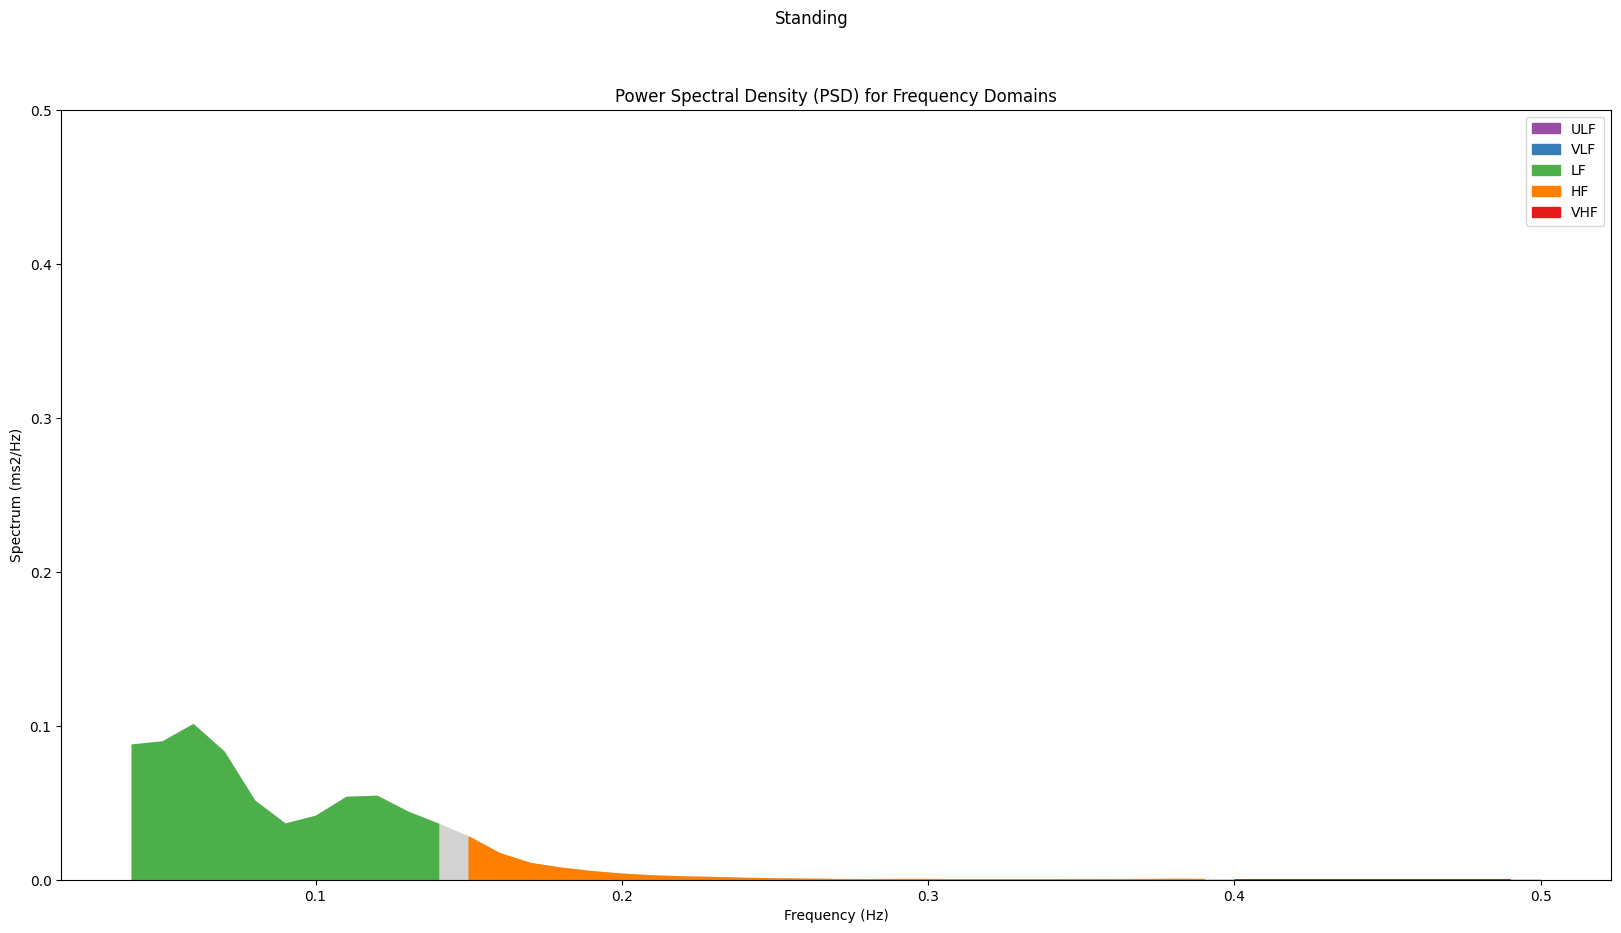

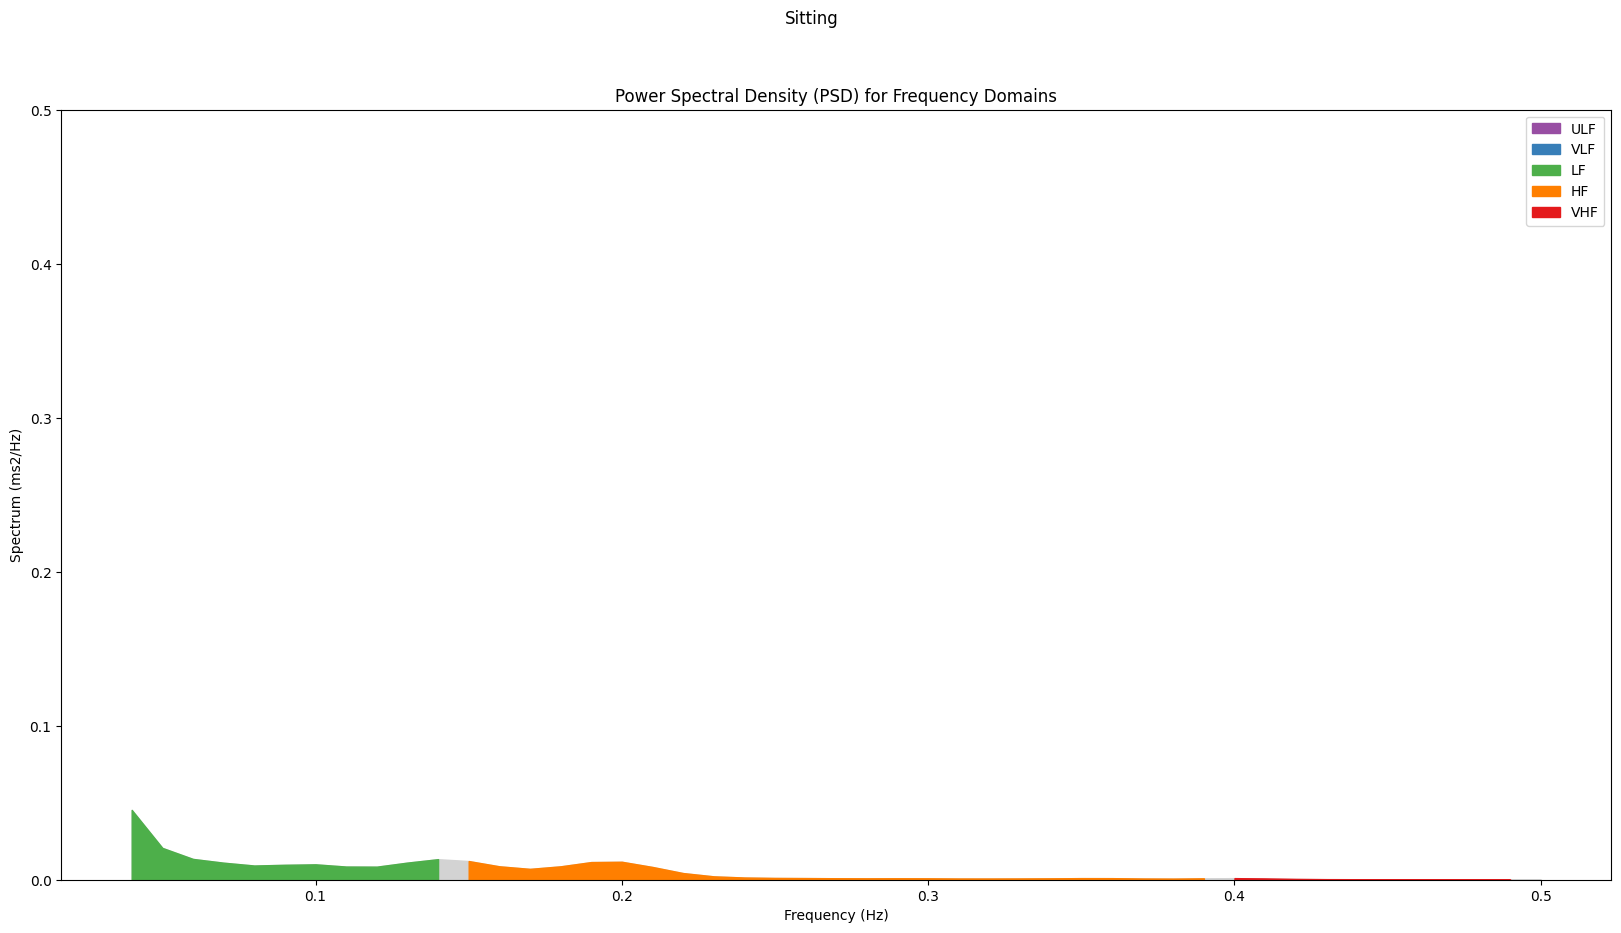

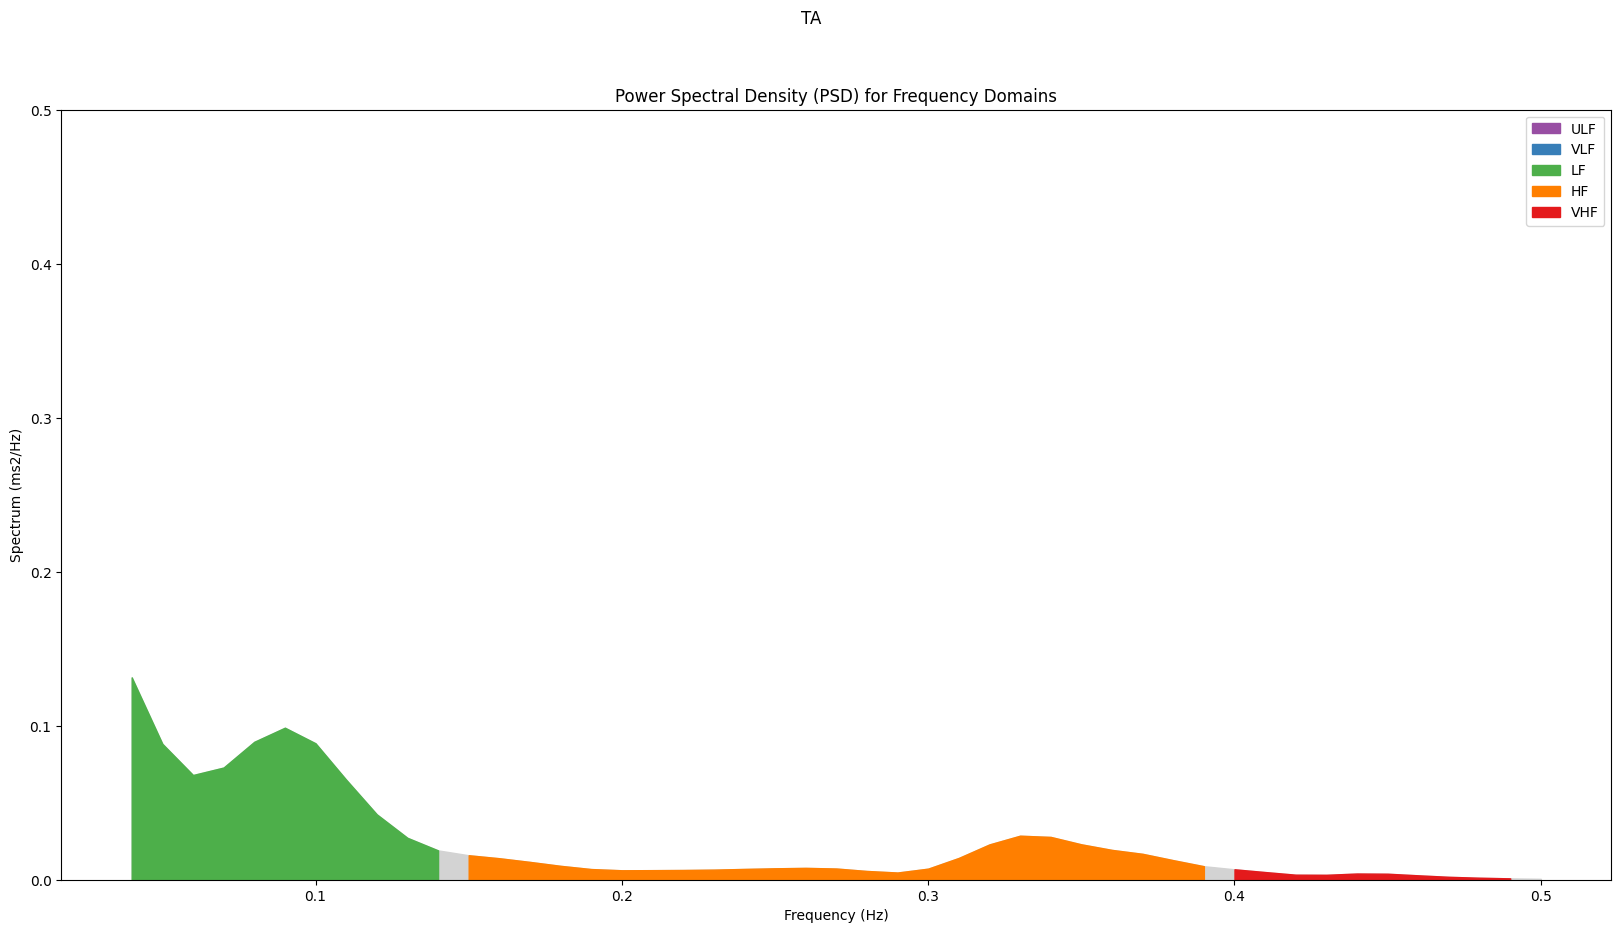

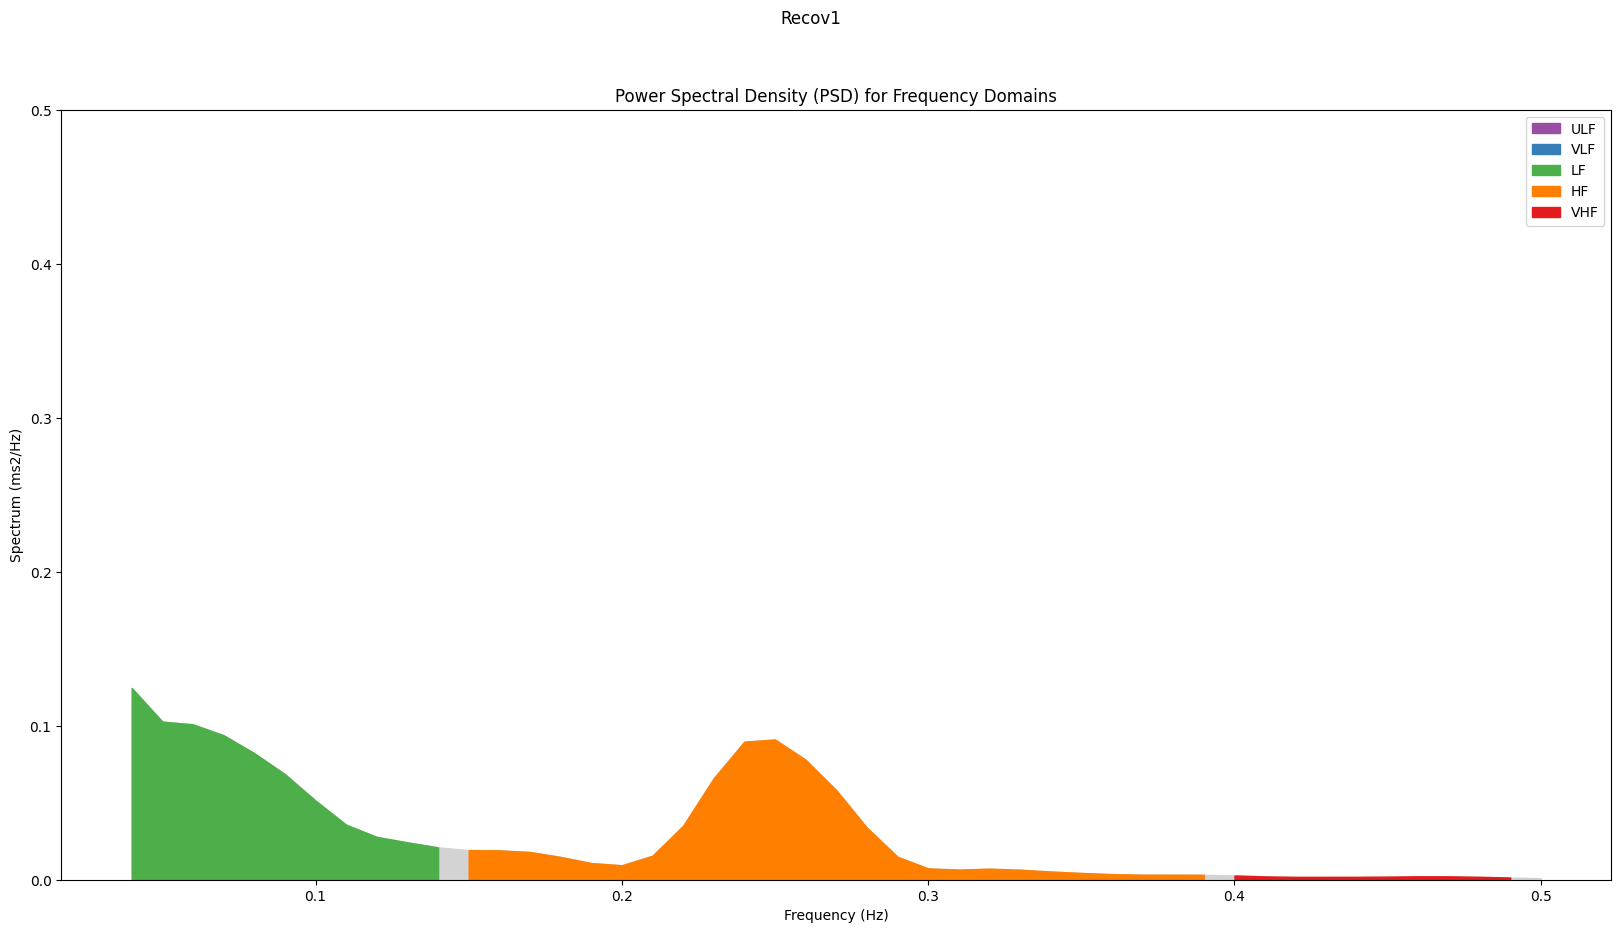

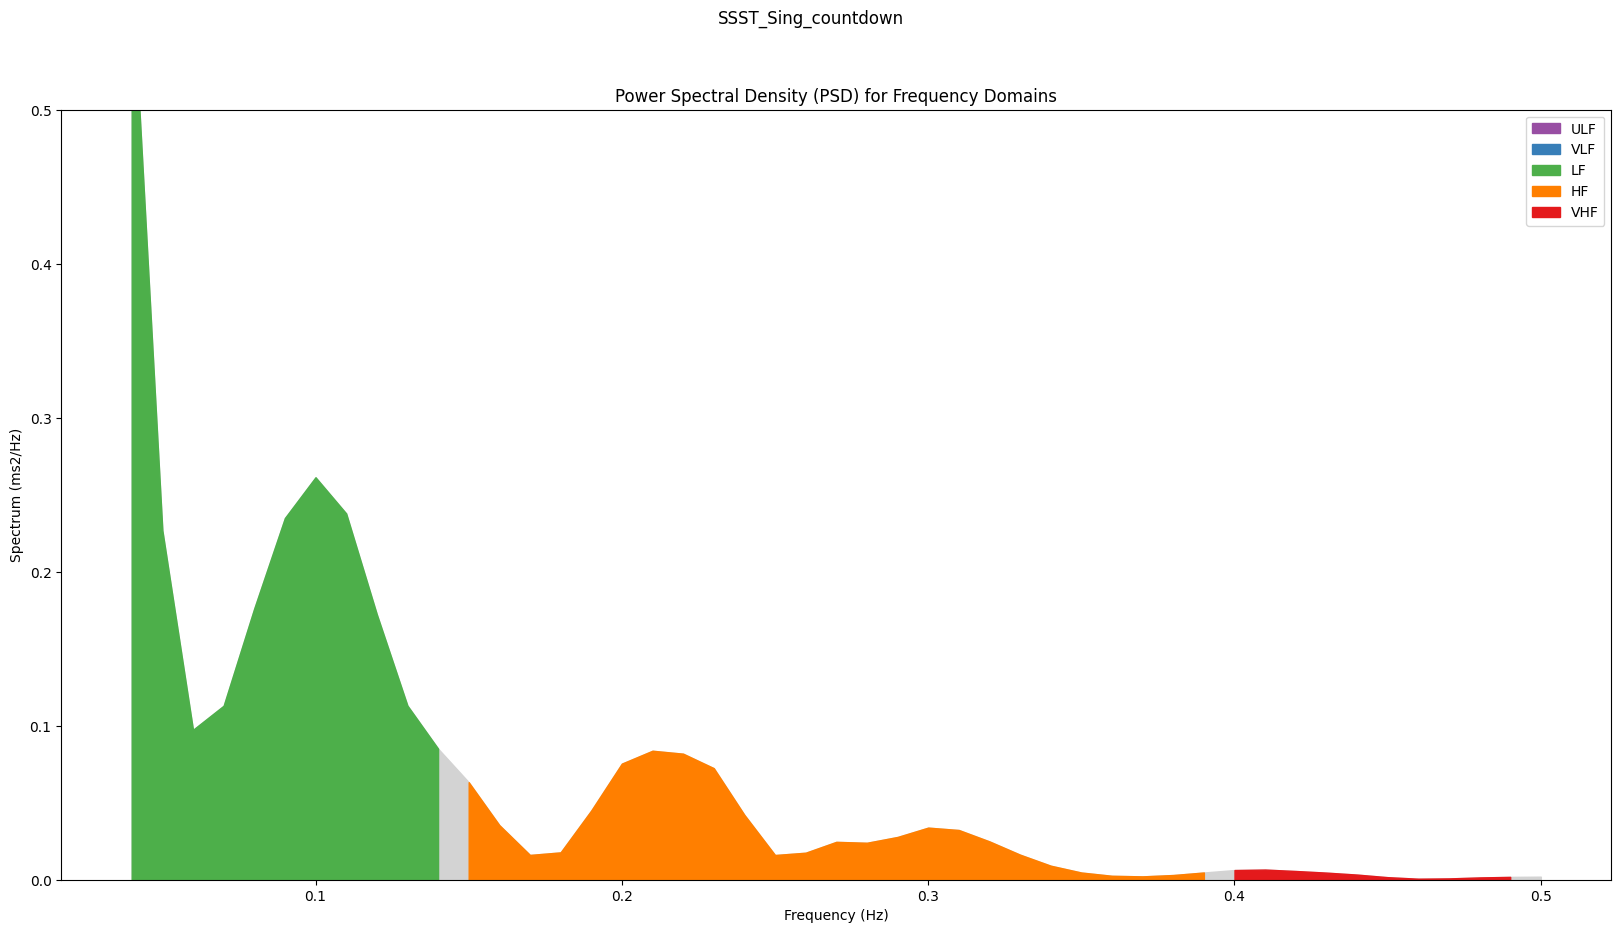

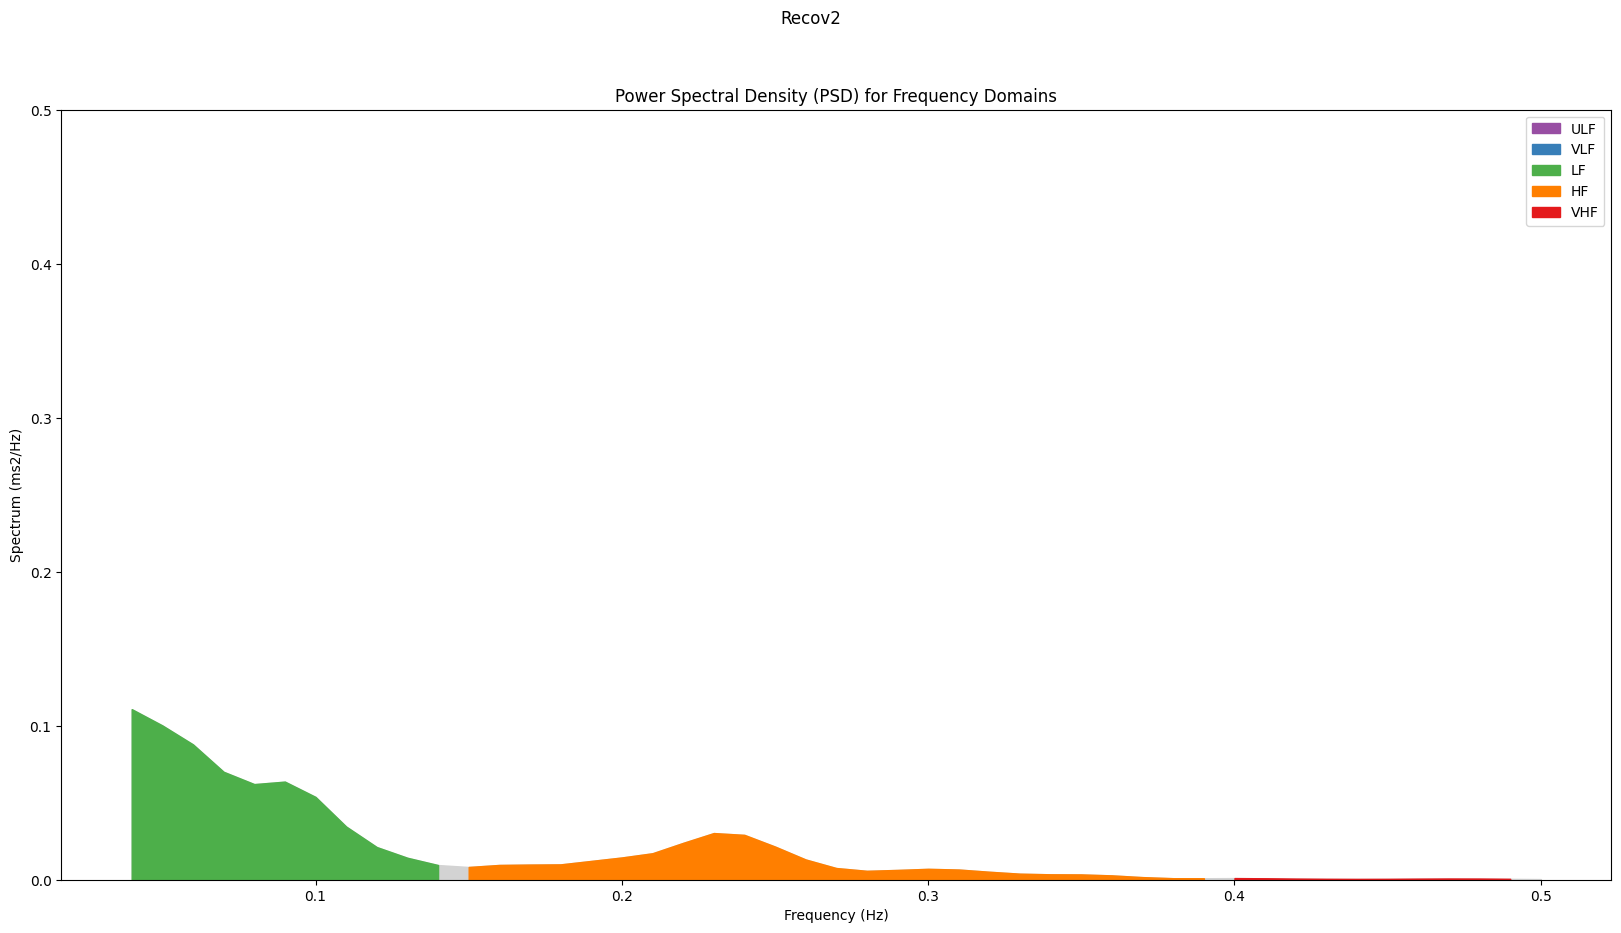

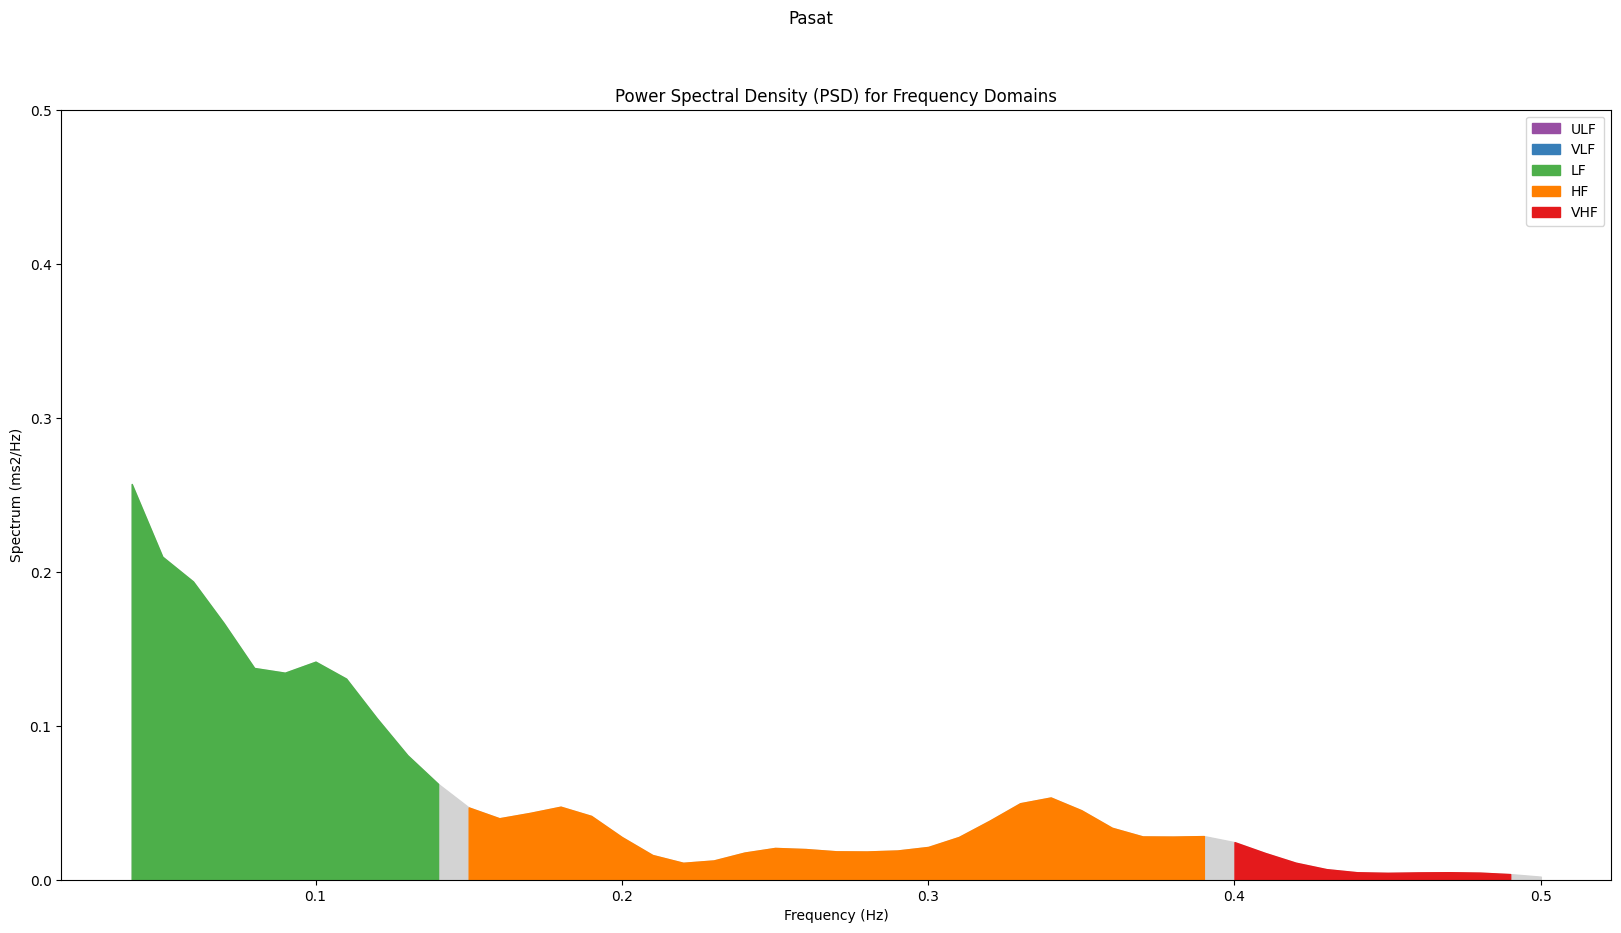

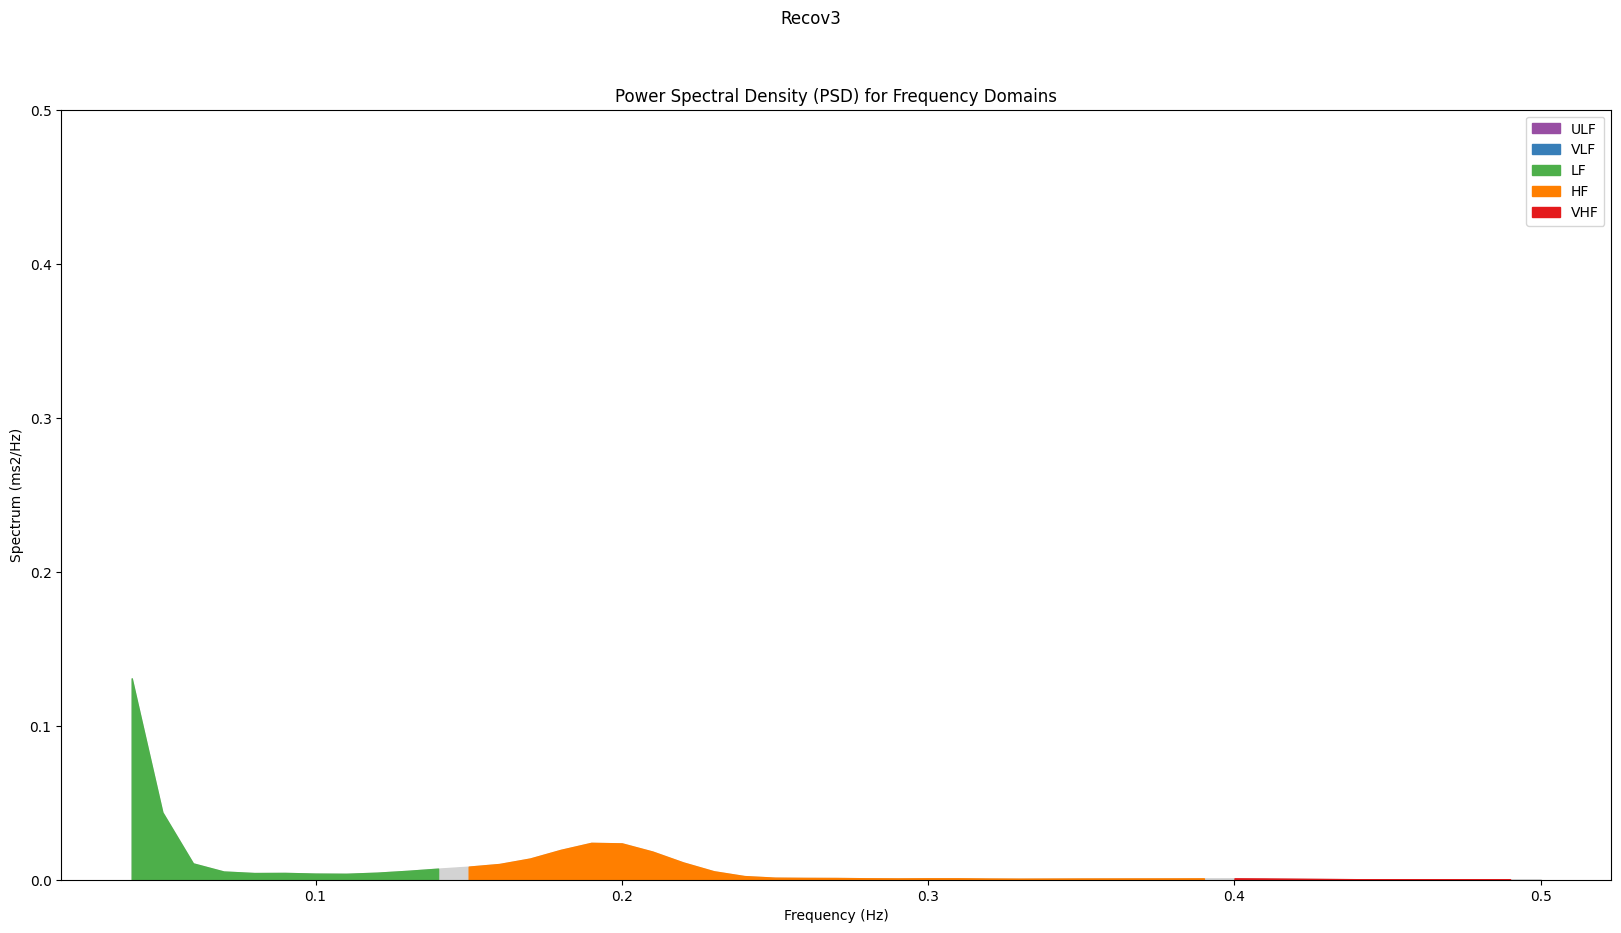

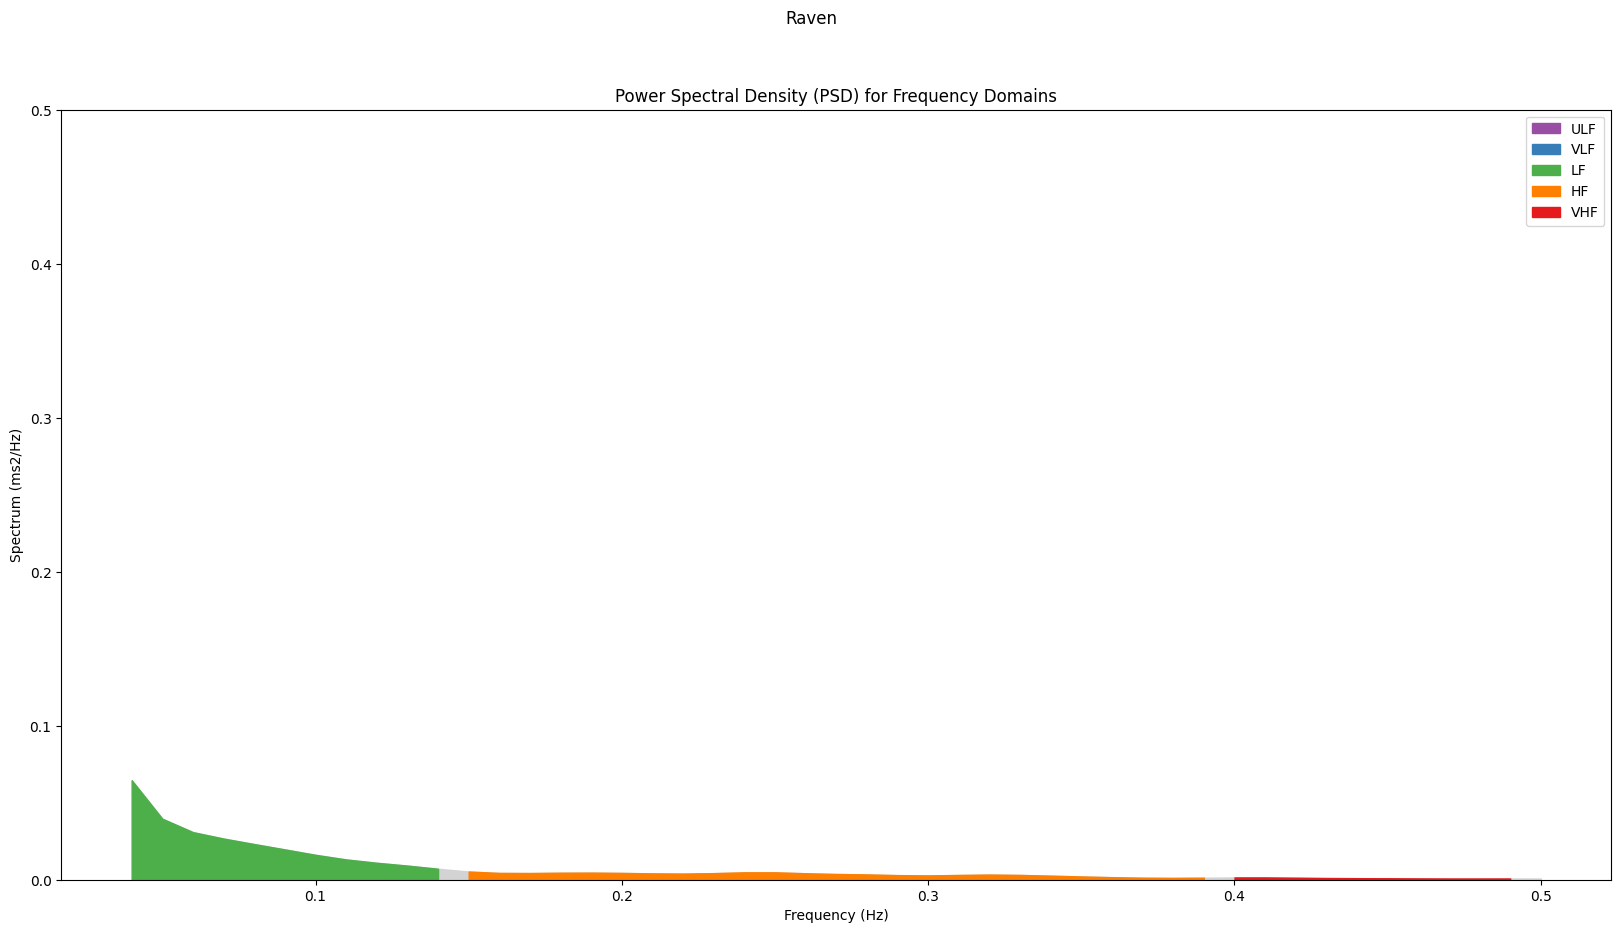

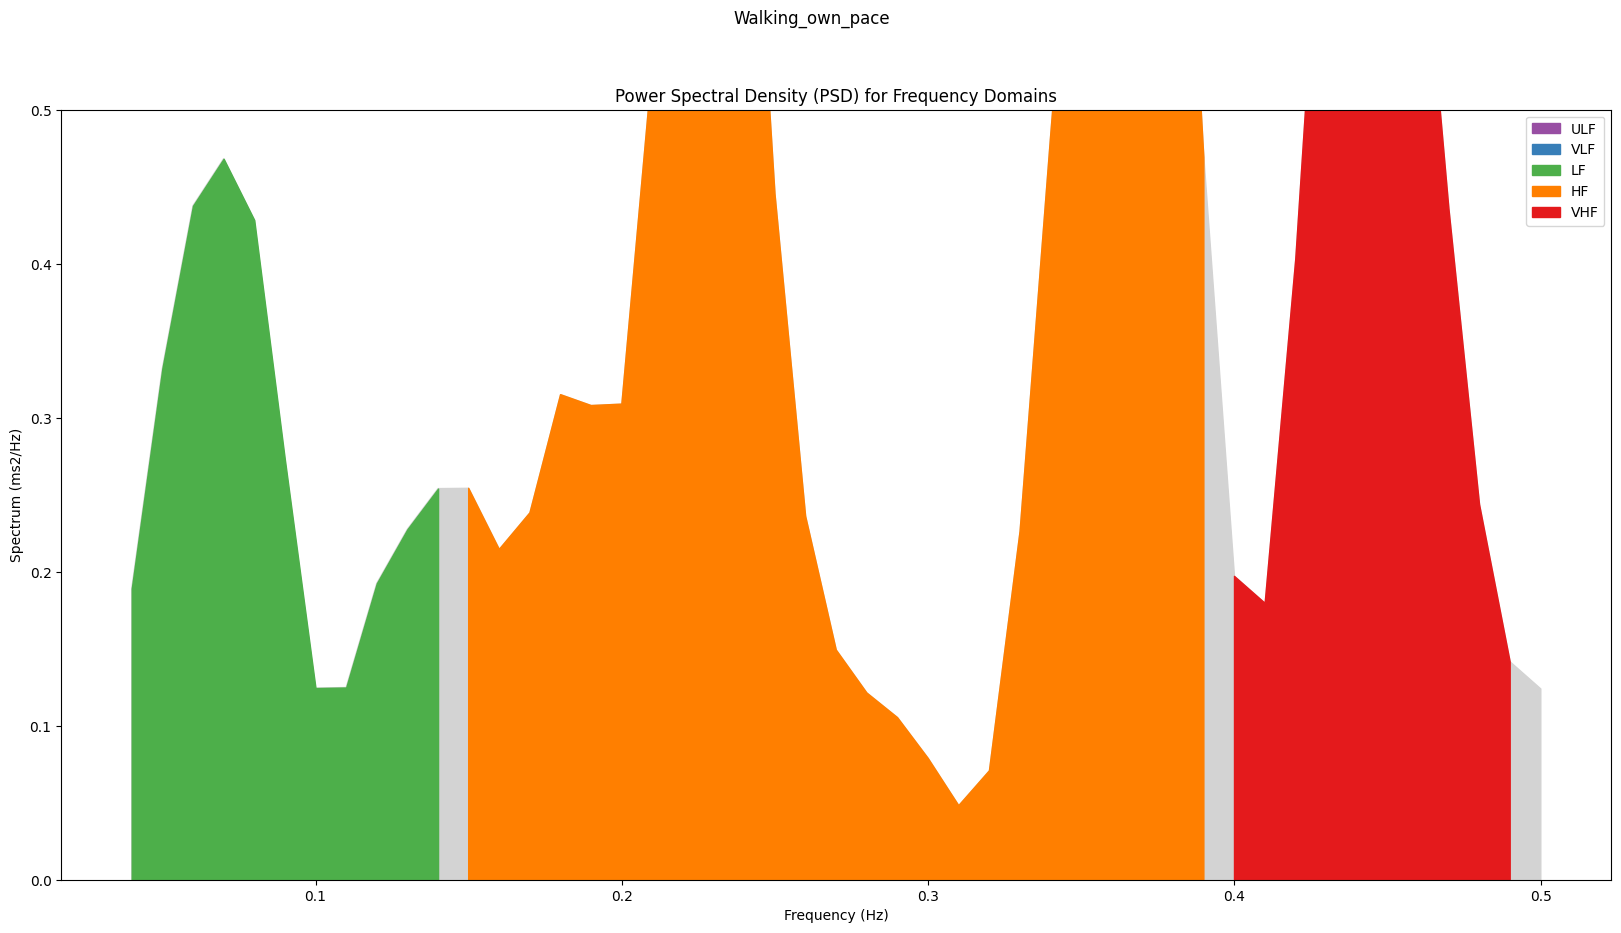

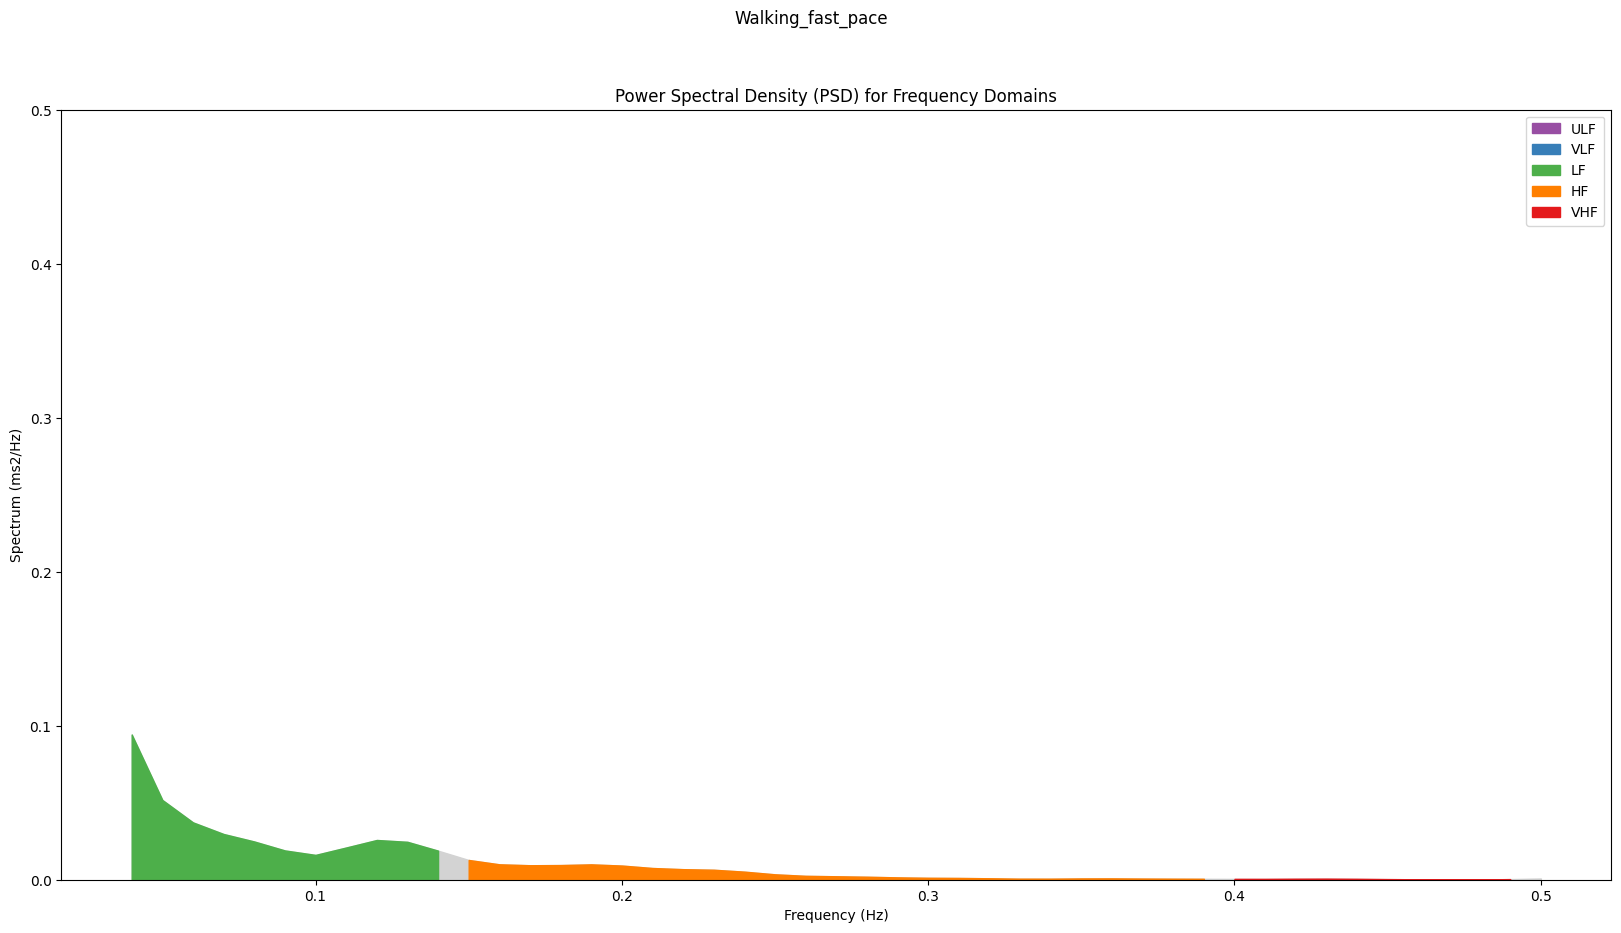

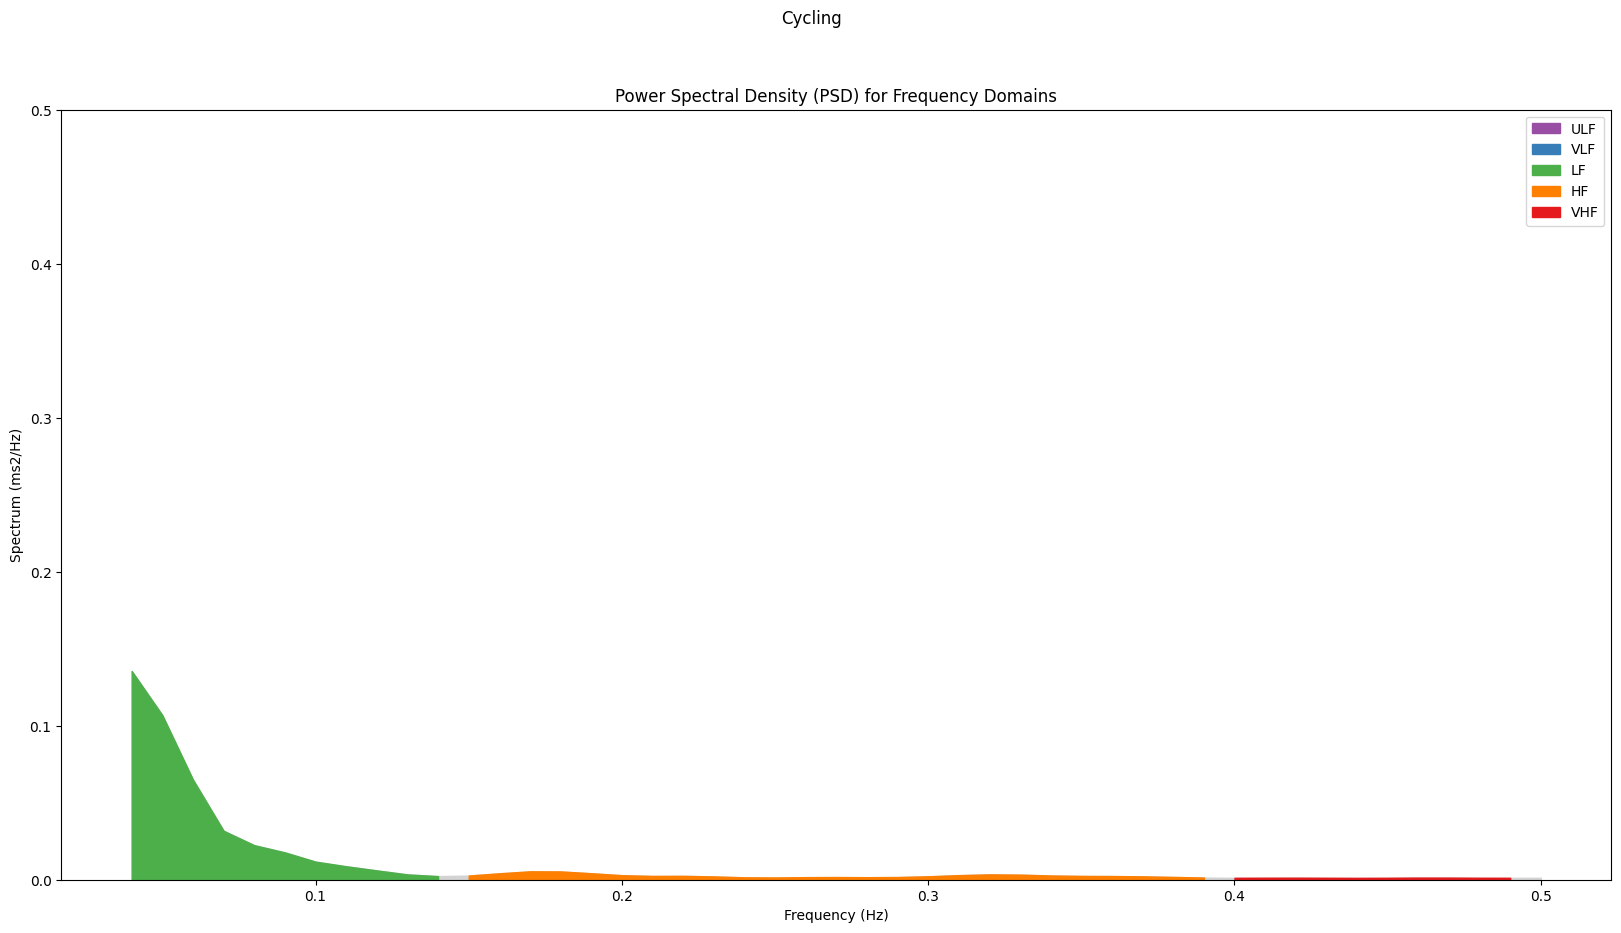

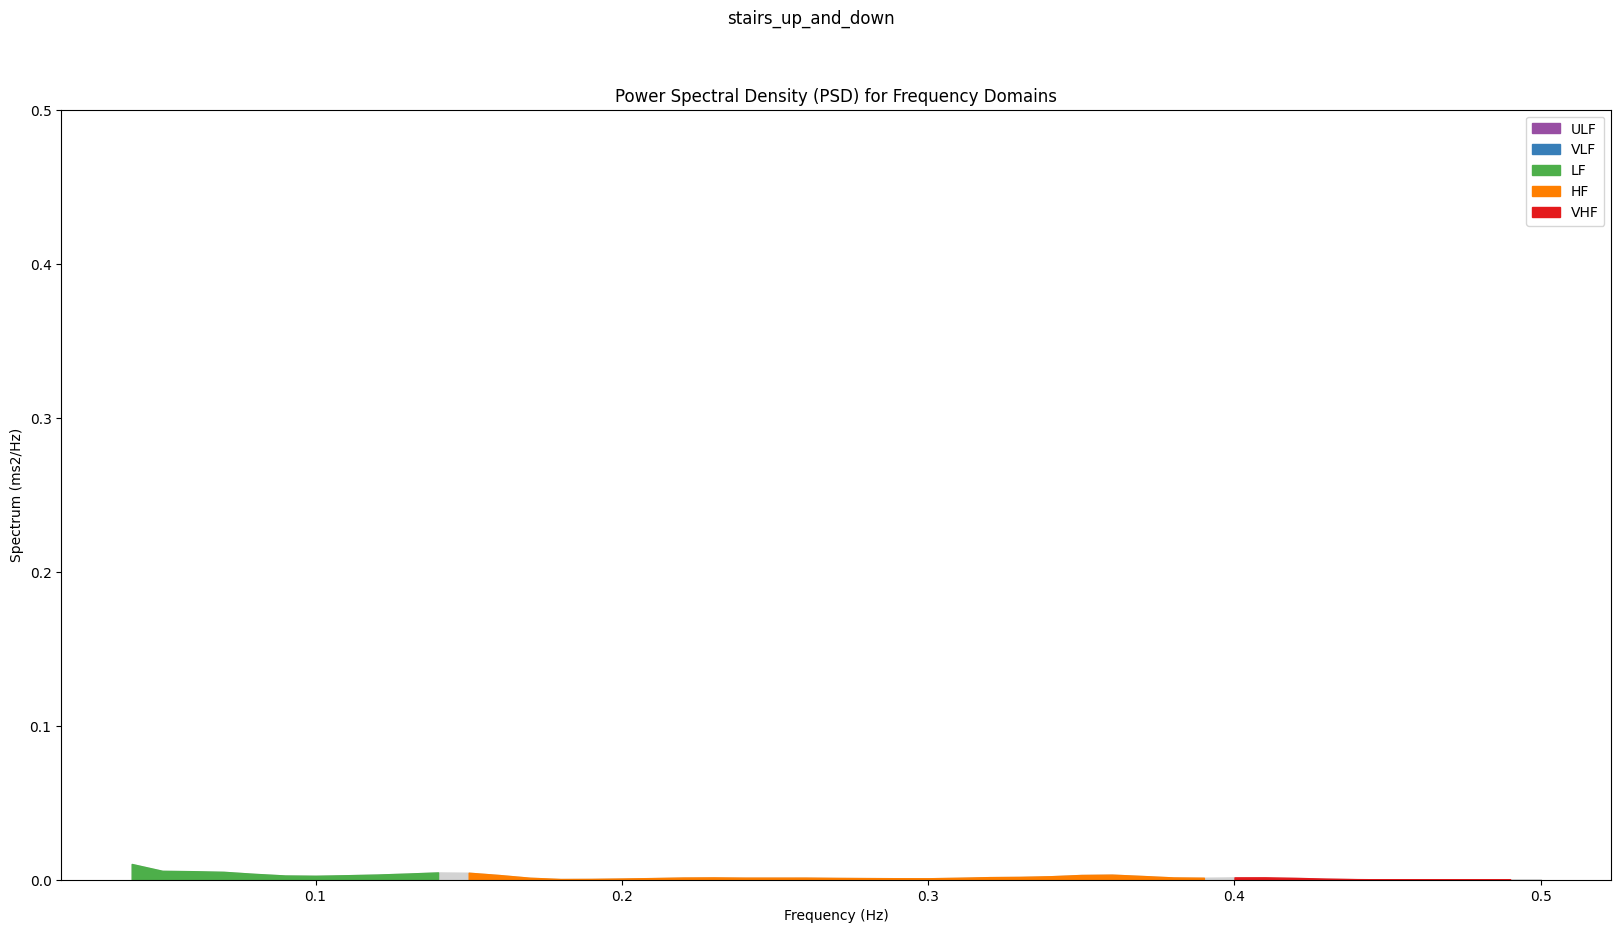

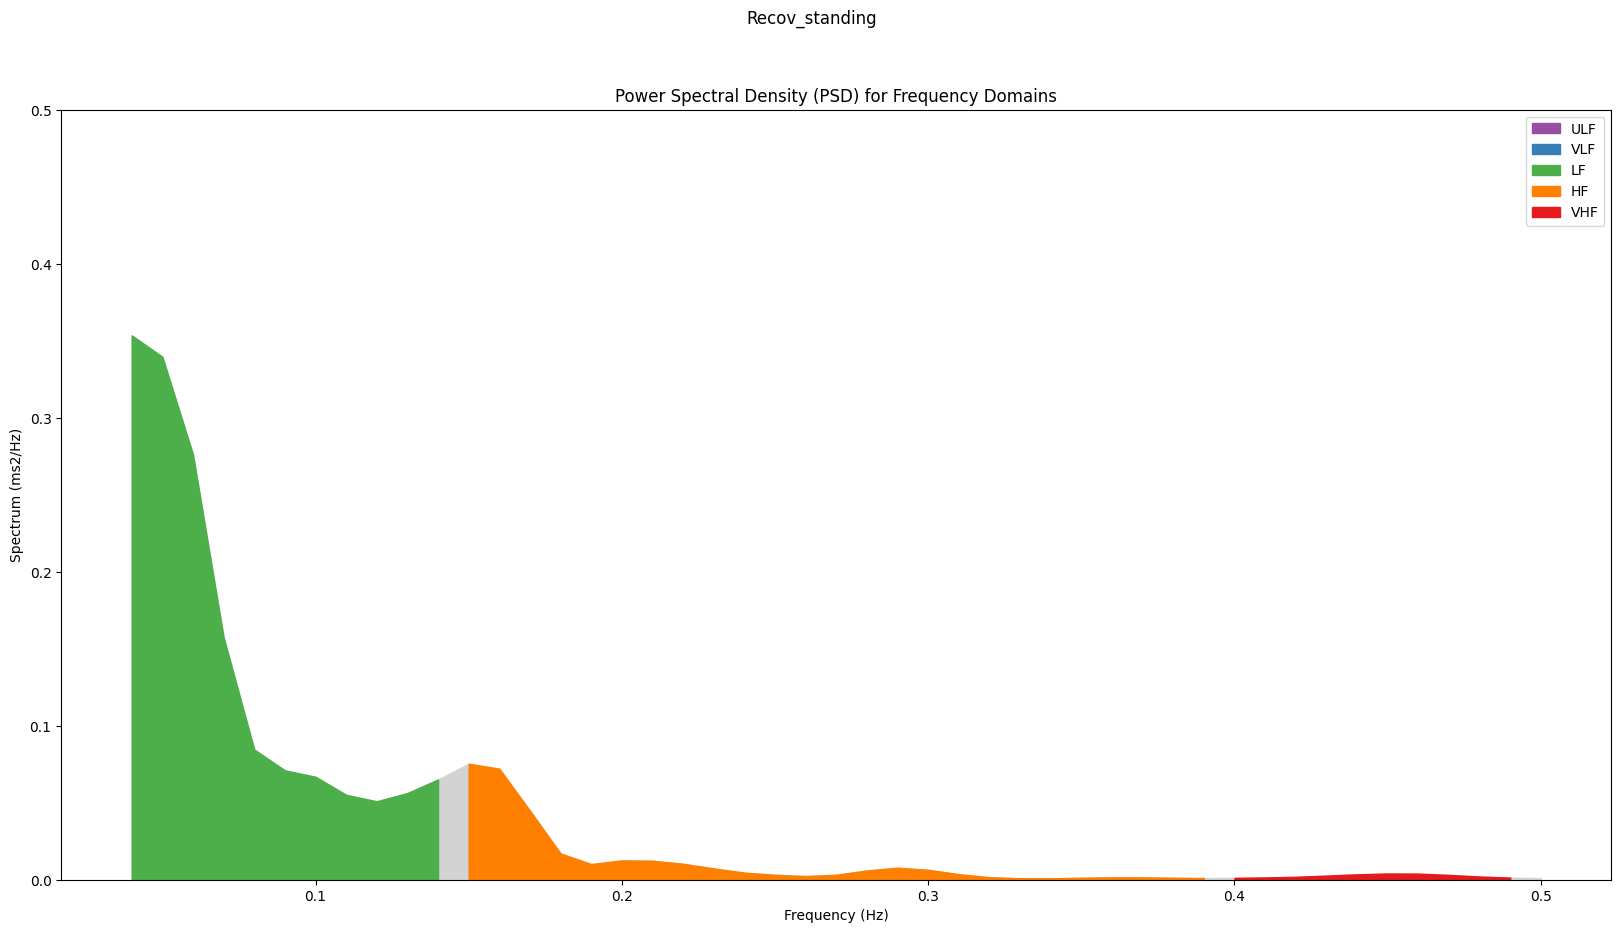

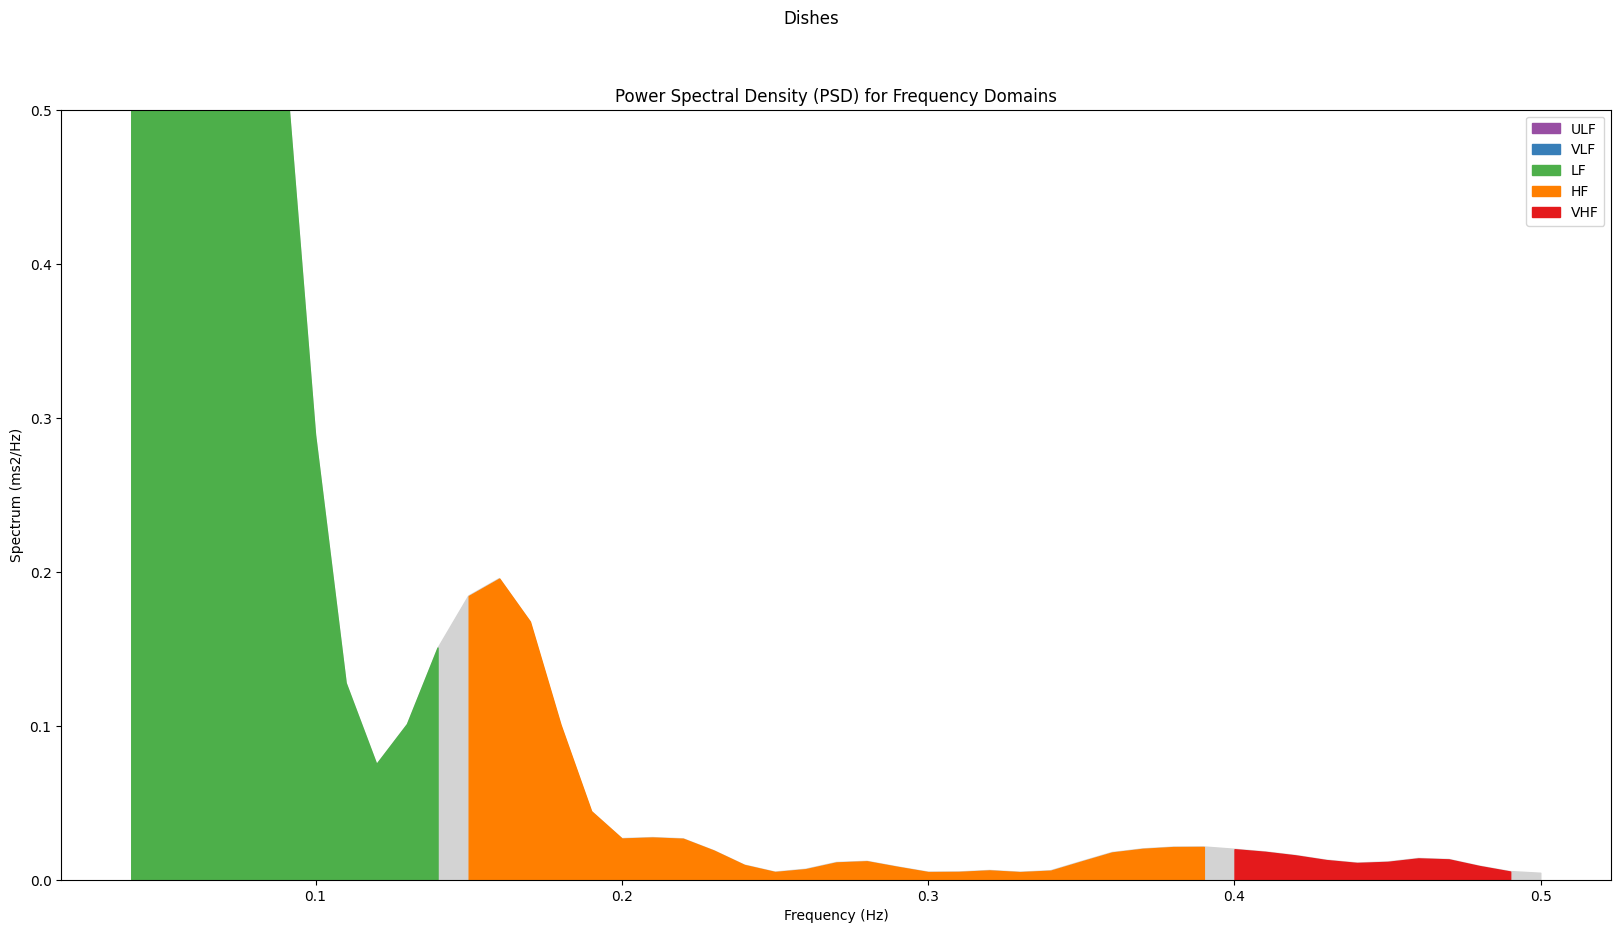

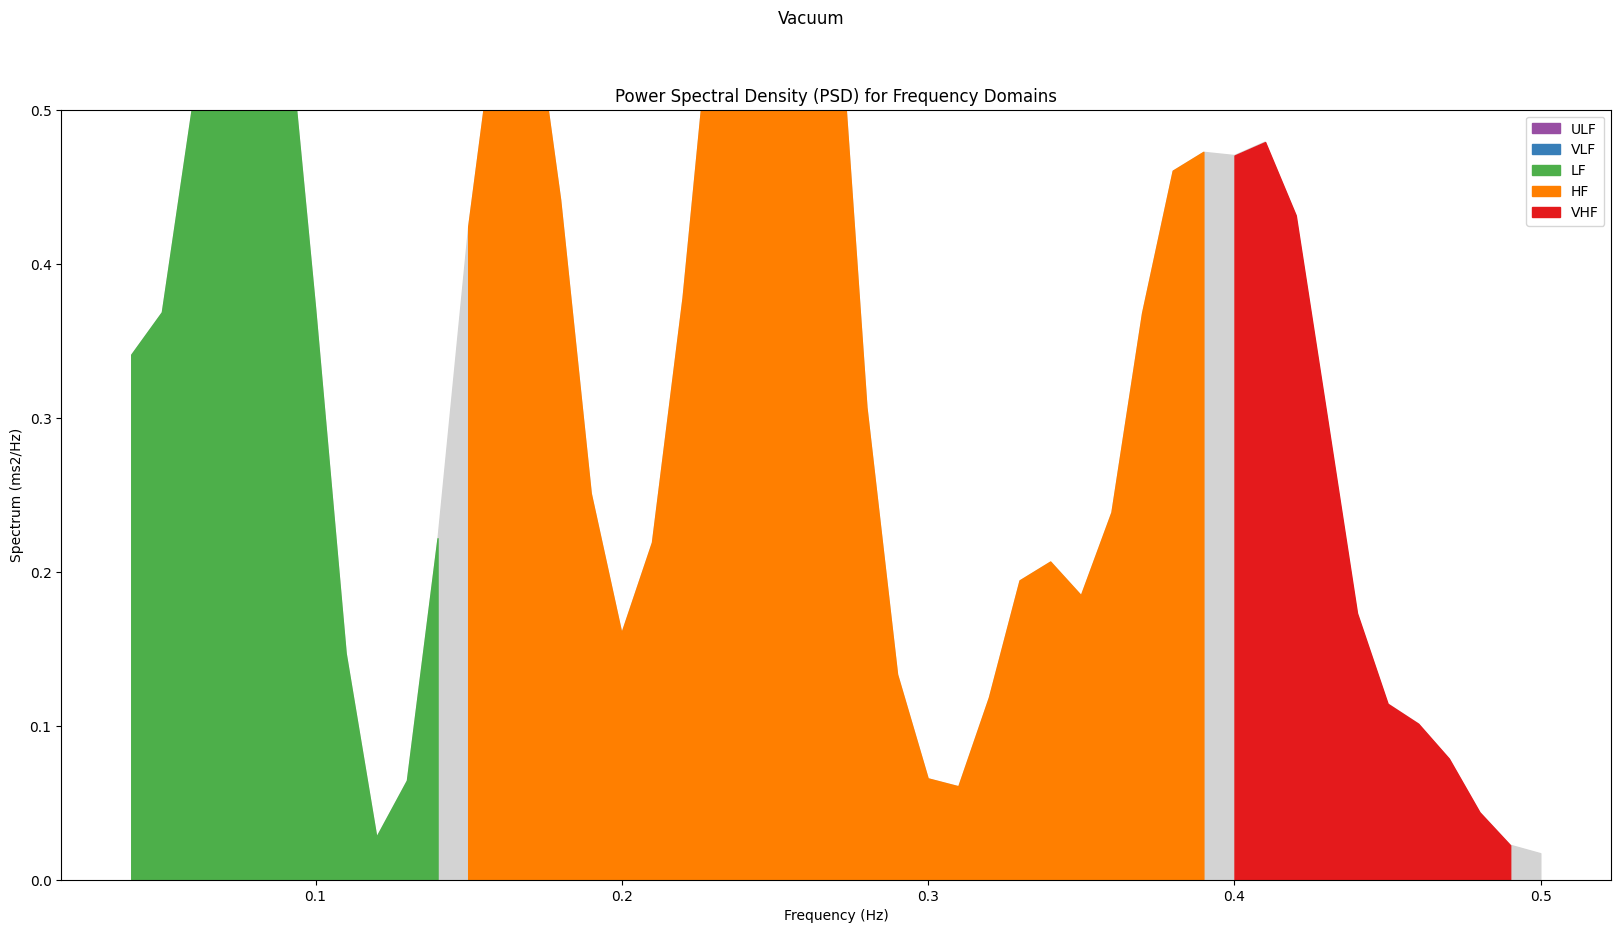

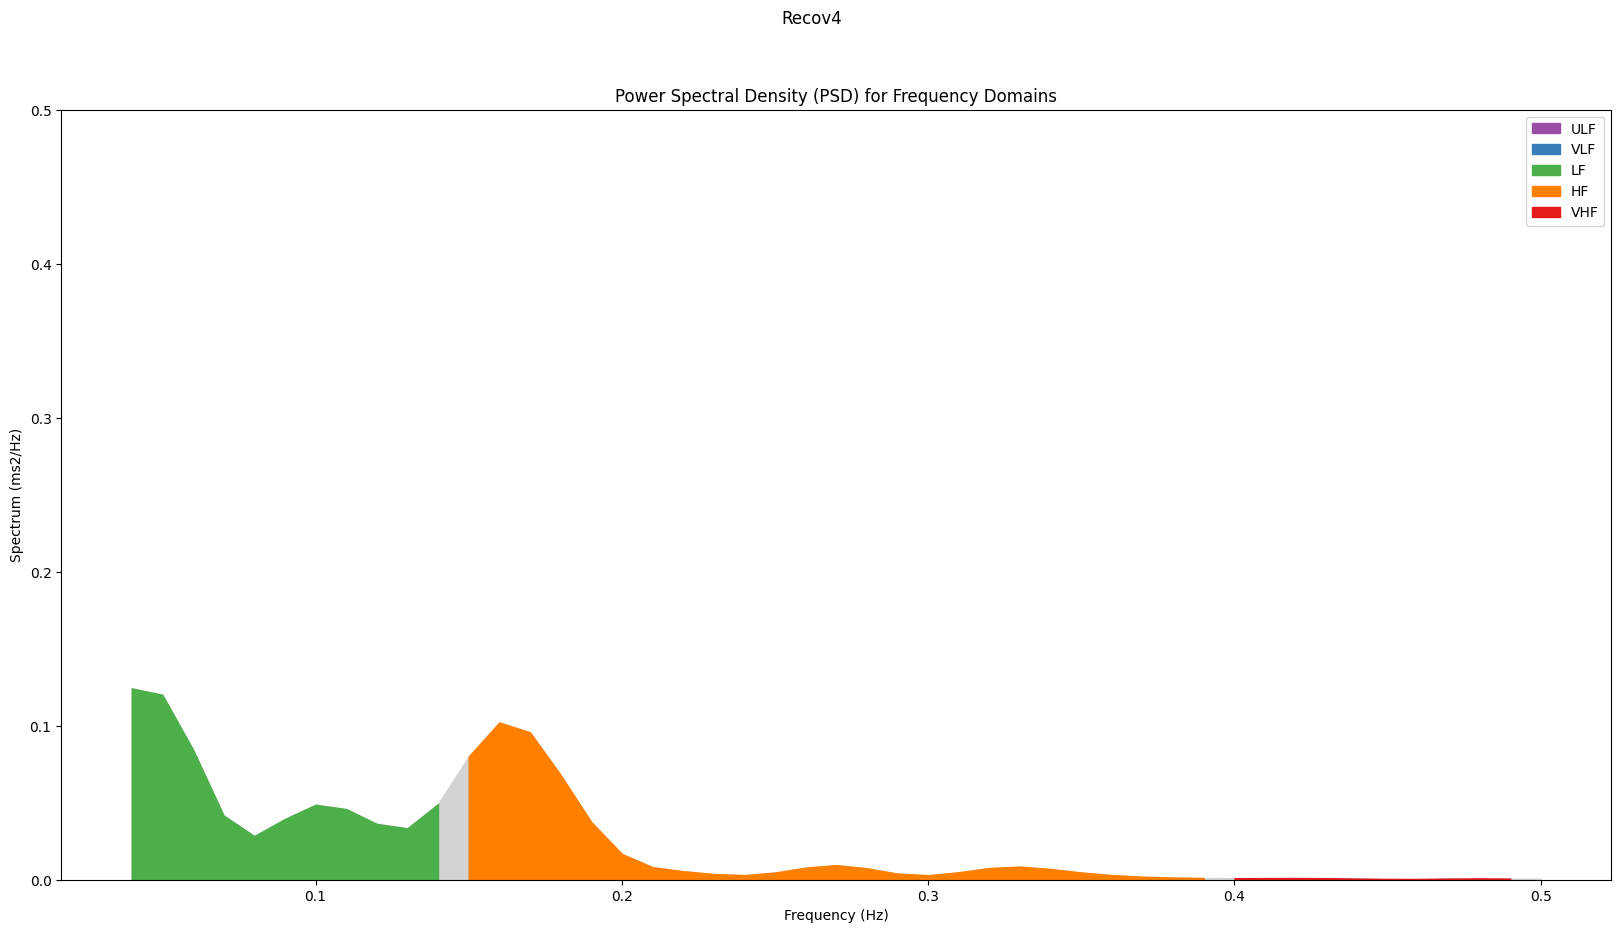

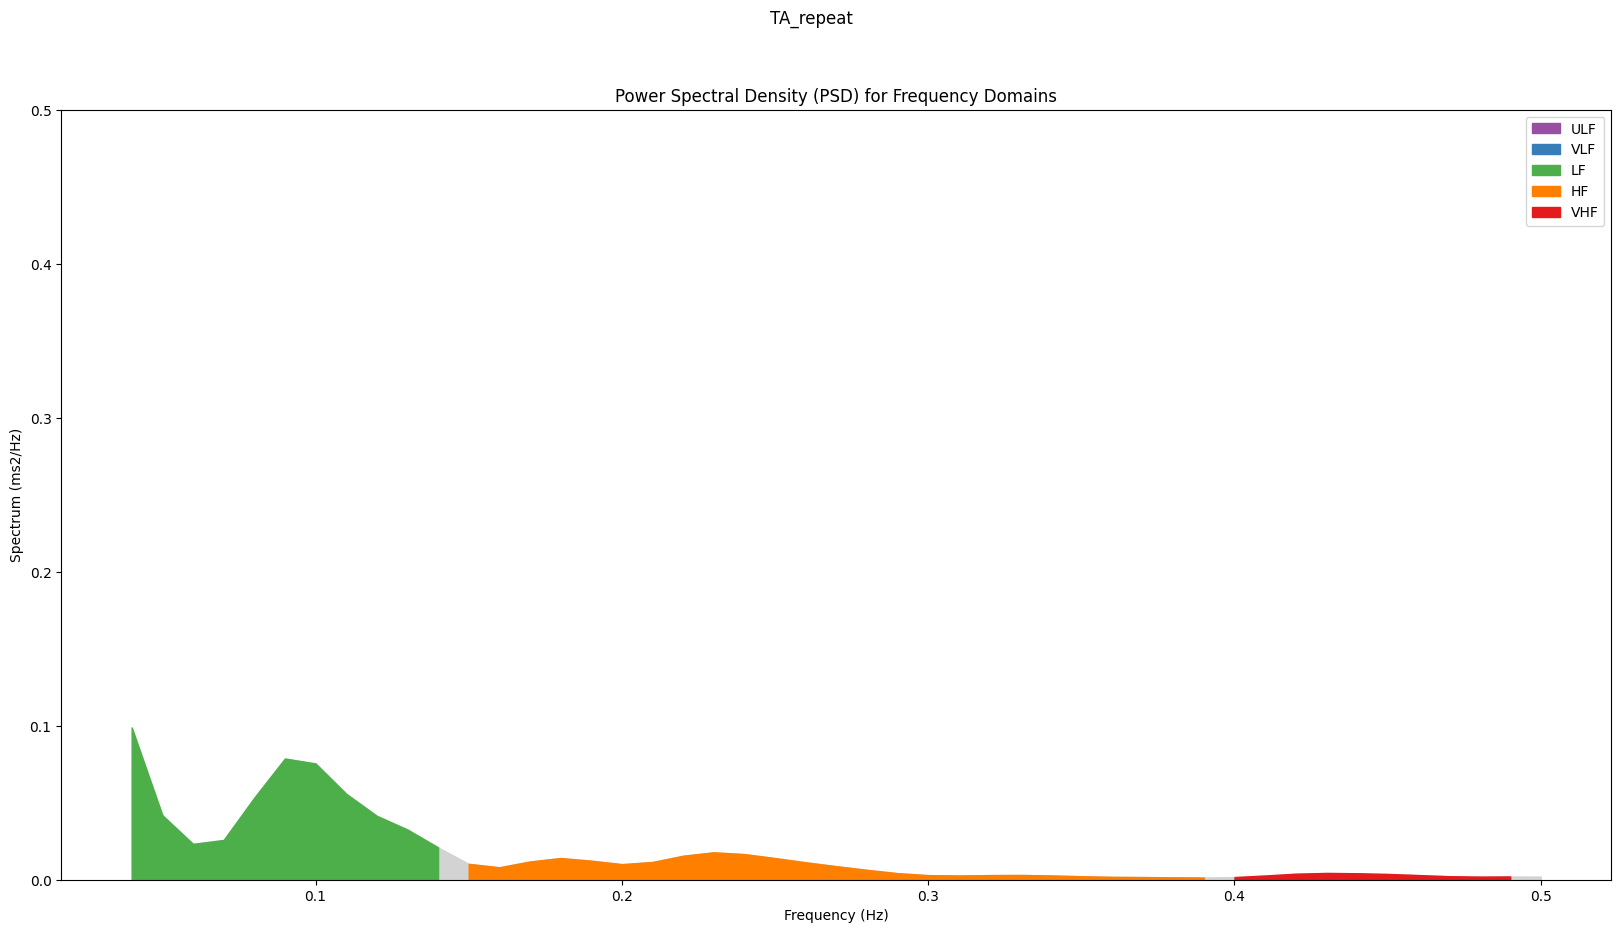

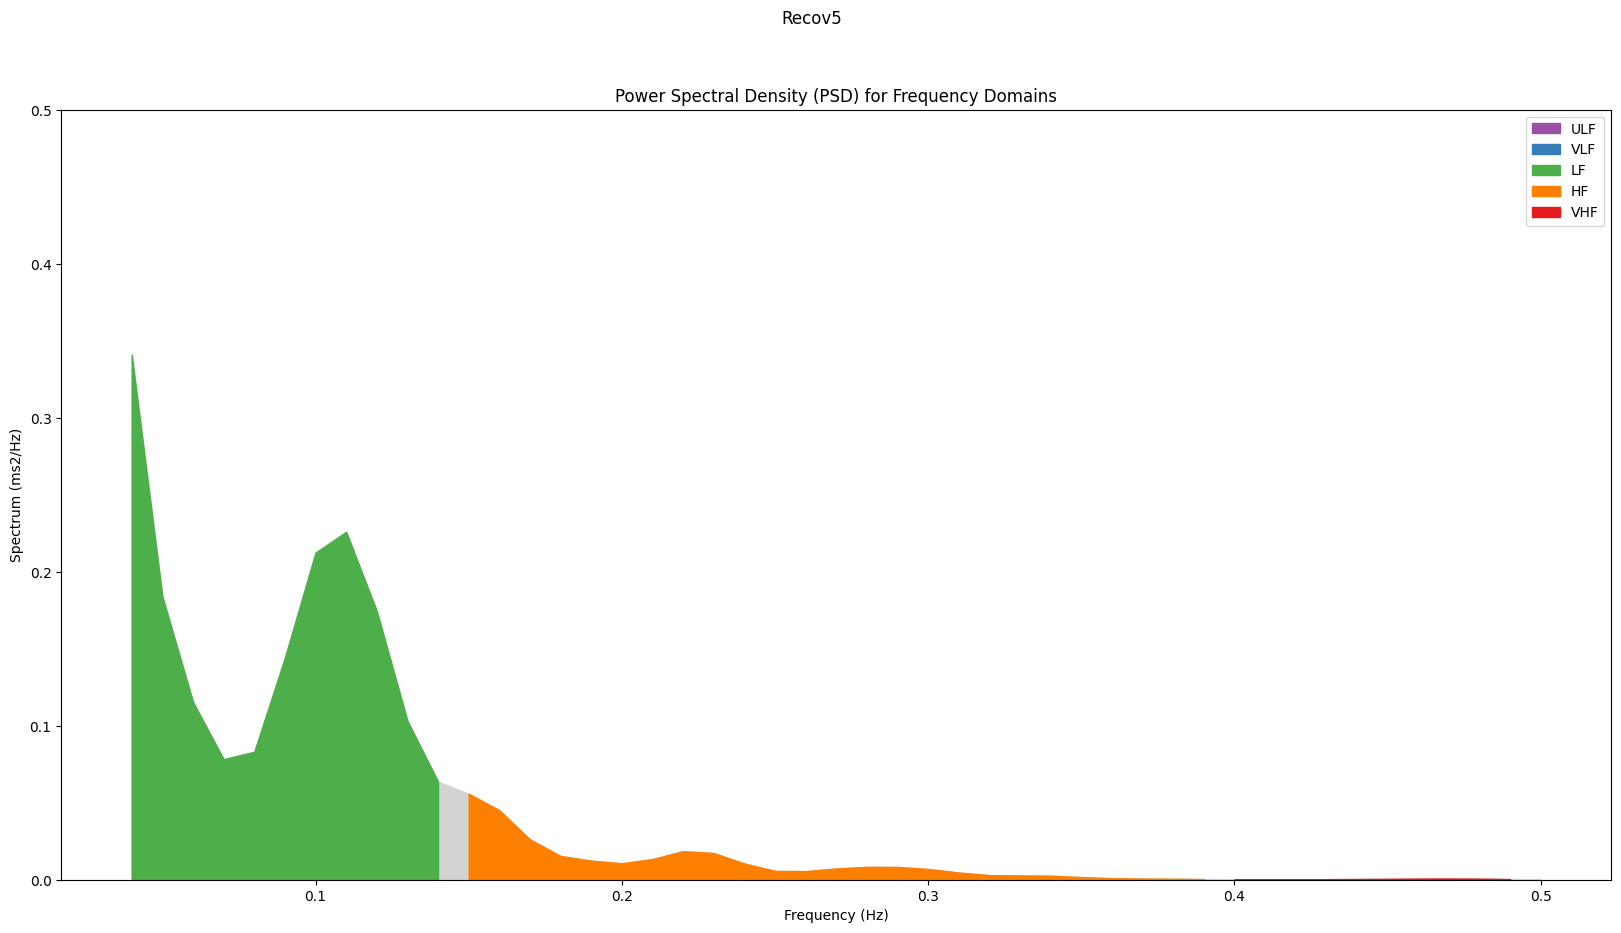

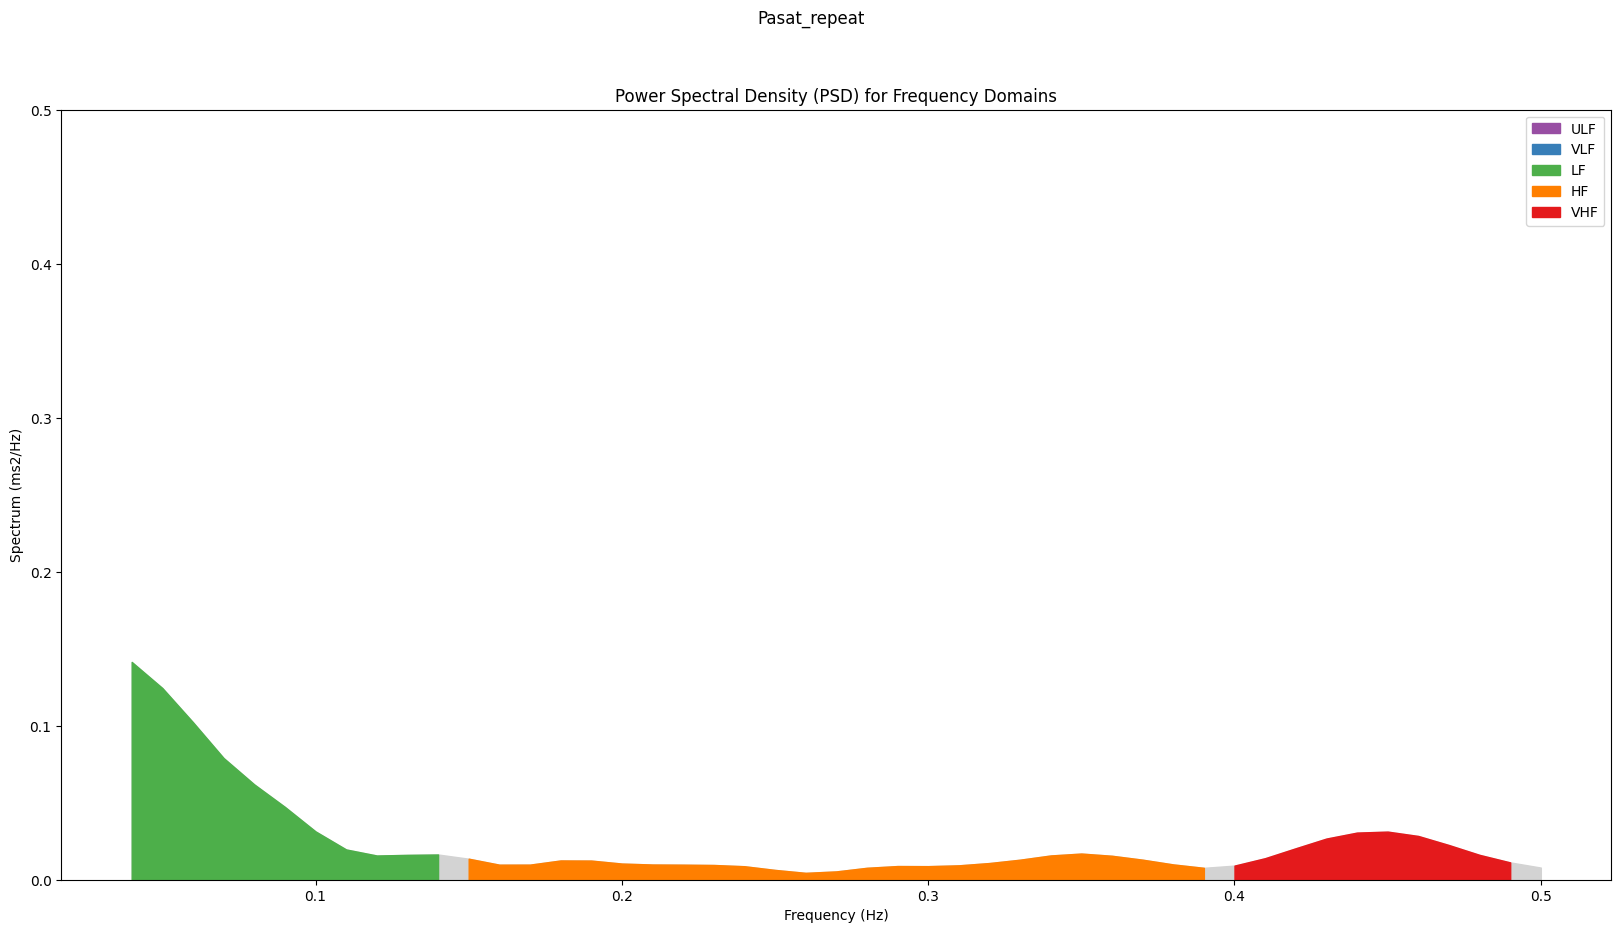

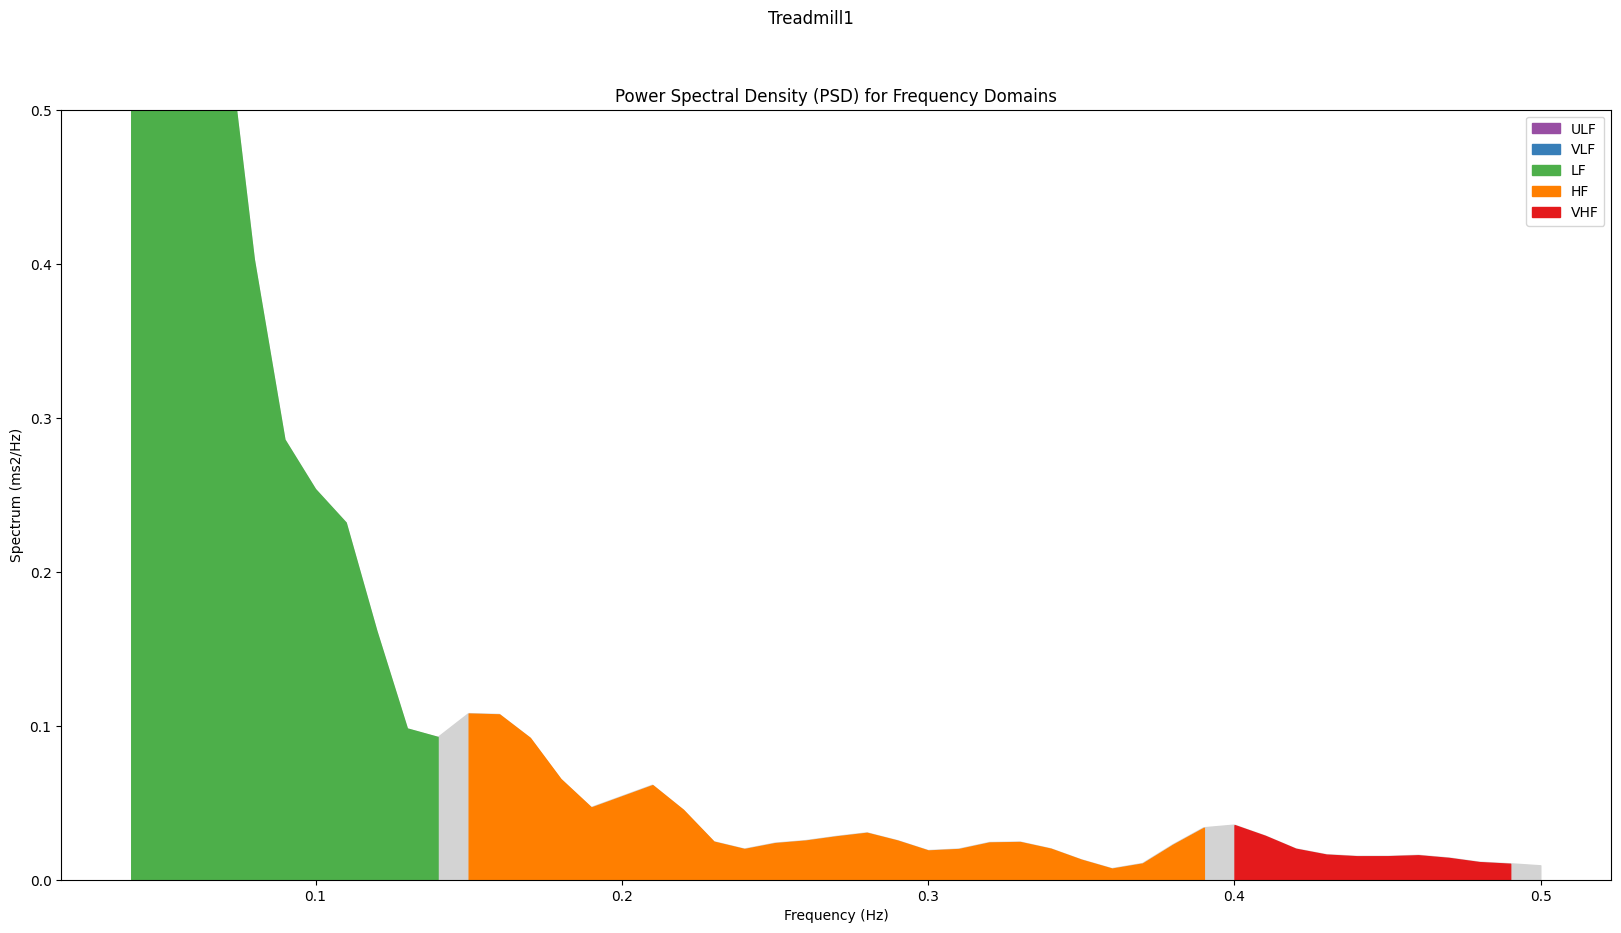

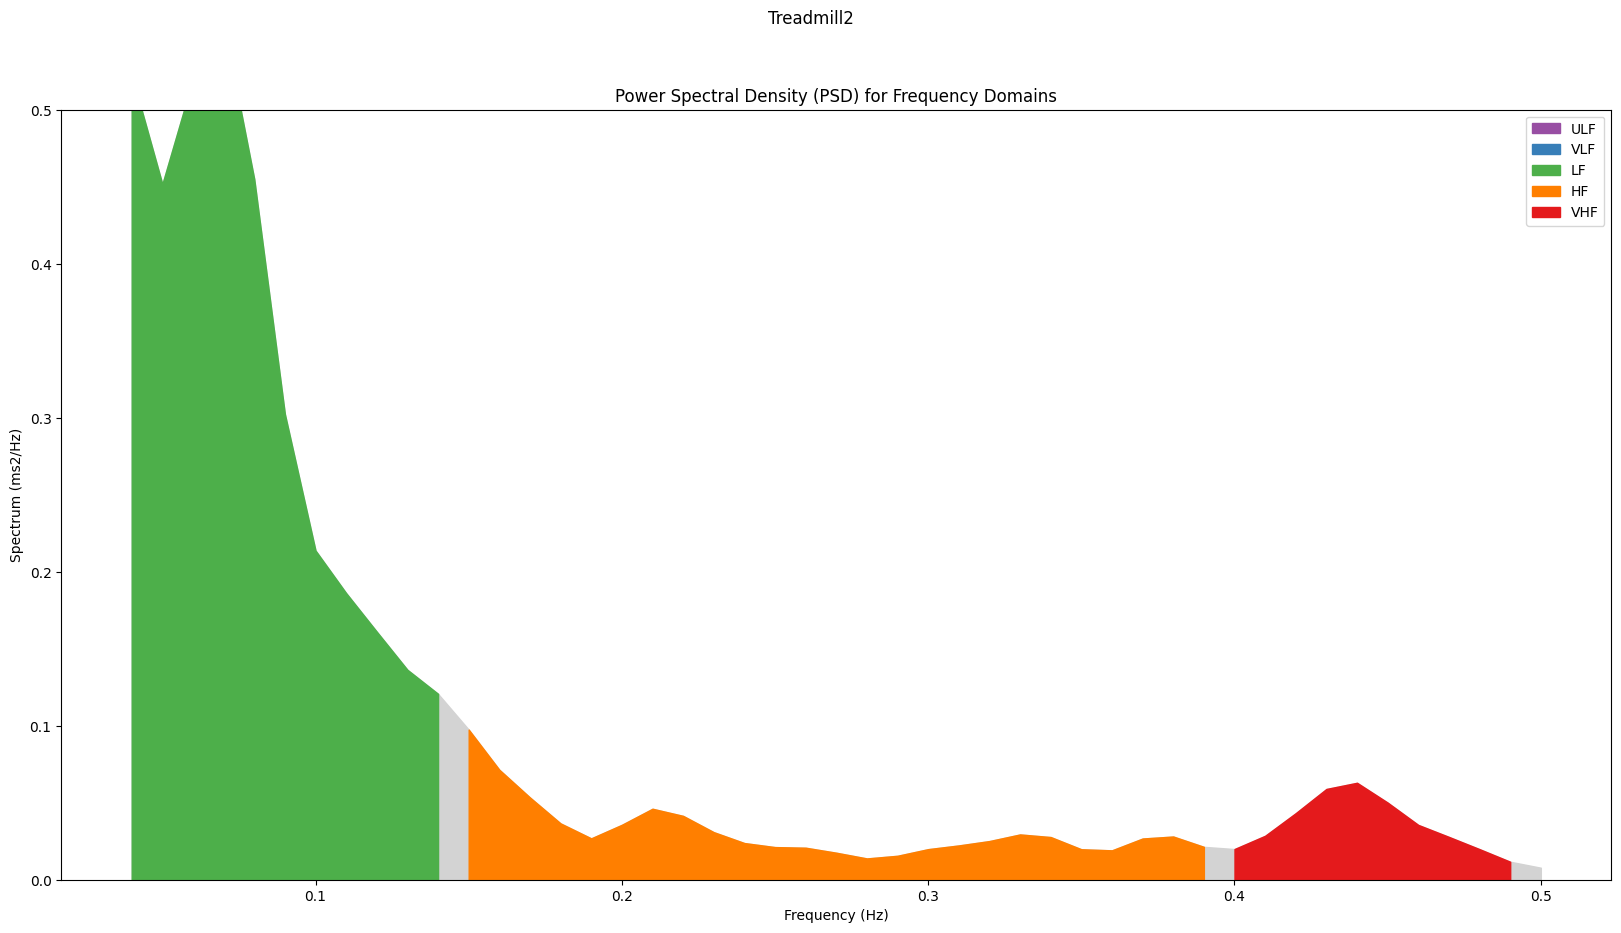

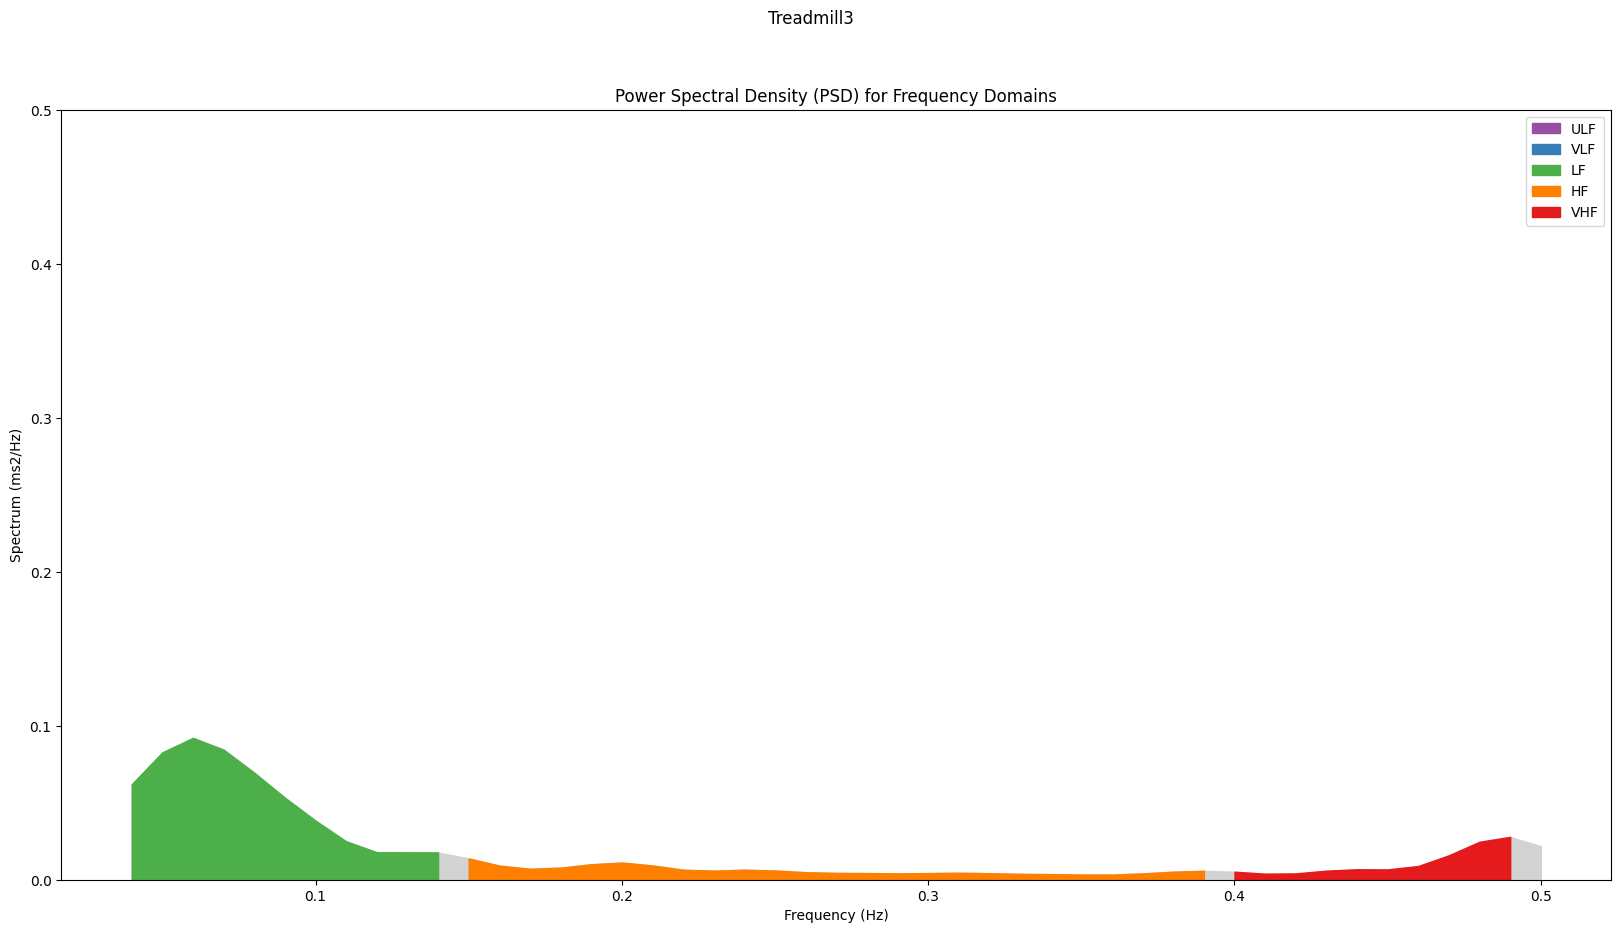

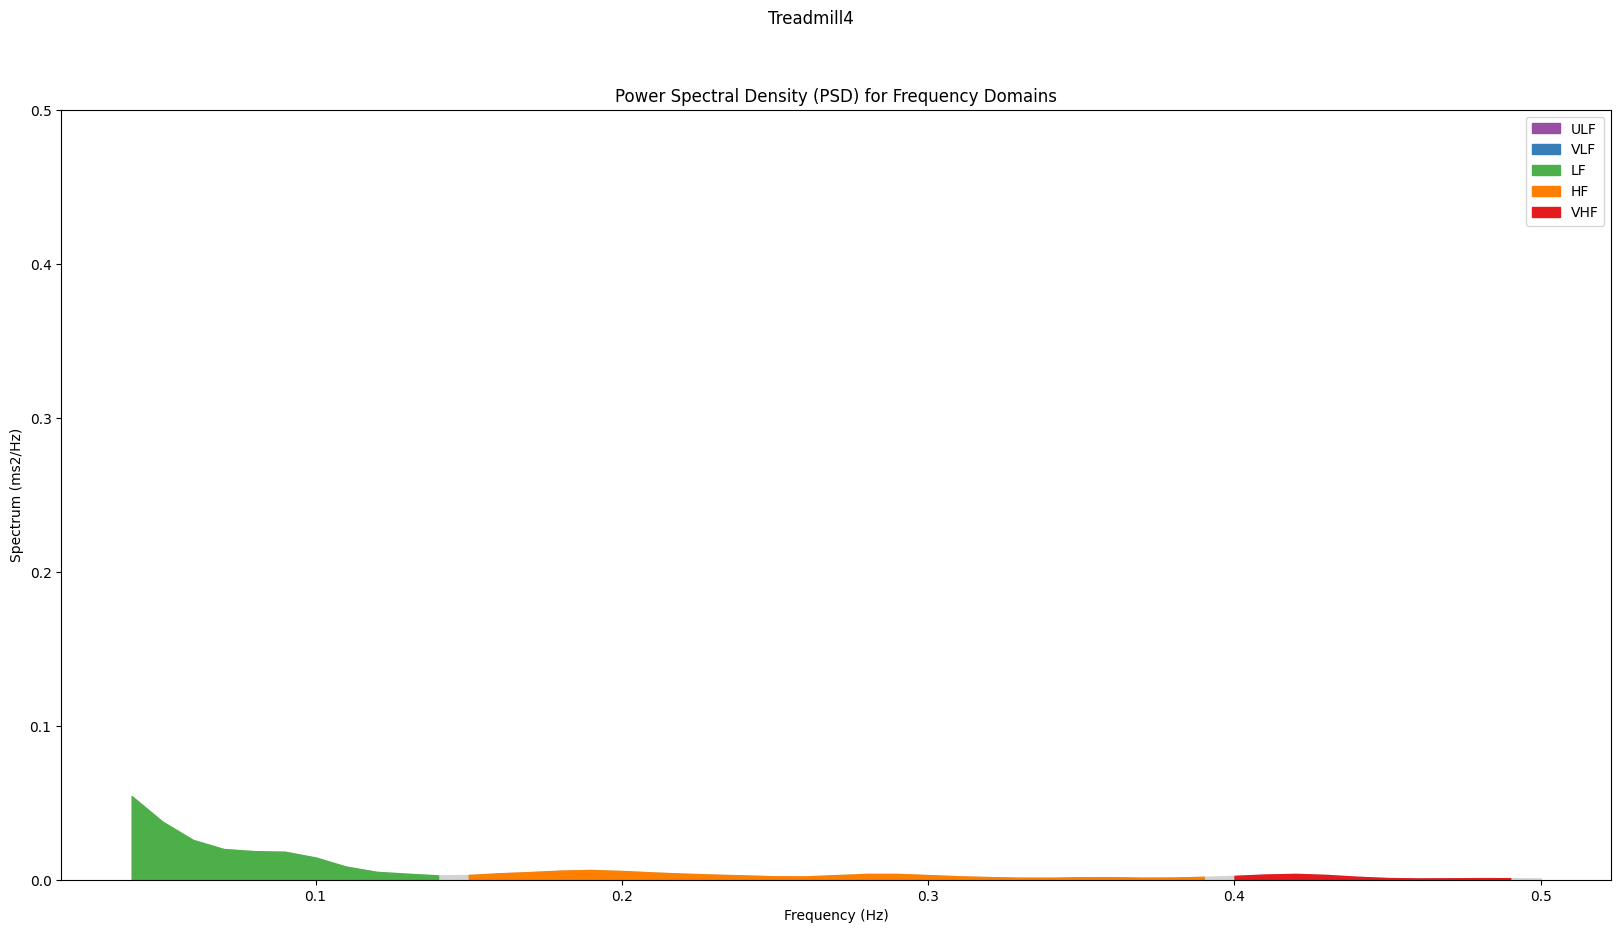

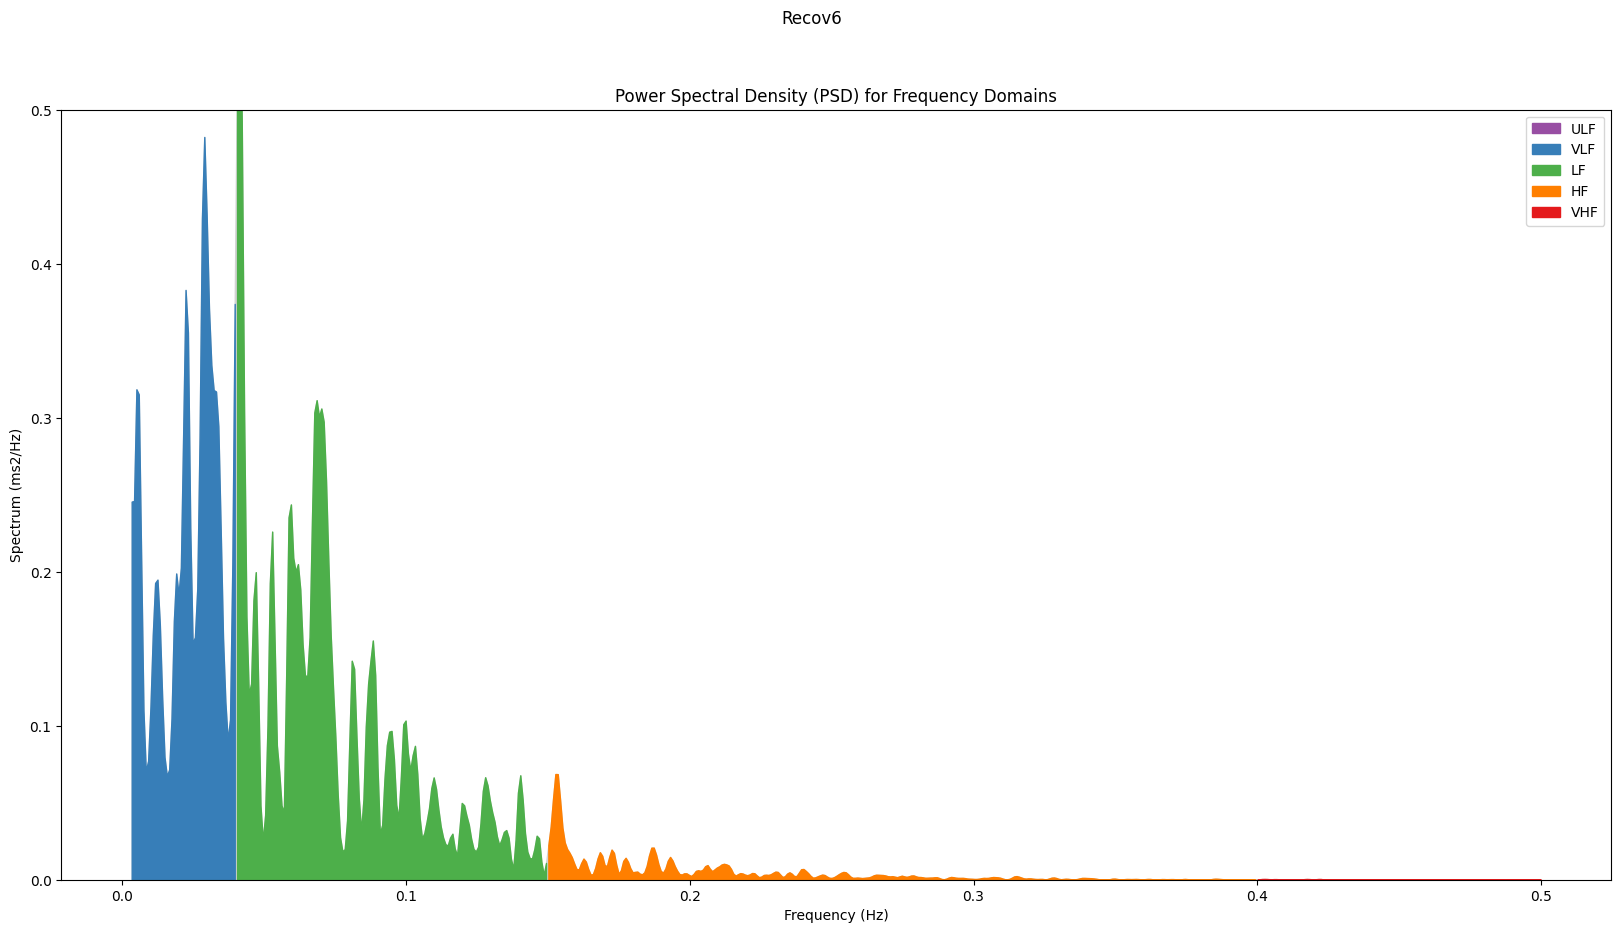

In [54]:
for category in df['category'].unique()[1:]:
    peaks, _ = nk.ecg_peaks(df[df['category'] == category]['ECG_Clean'], sampling_rate=sampling_rate)
    nk.hrv_frequency(peaks, sampling_rate=1000, show=True, normalize=True)
    plt.suptitle(category)
    plt.ylim(0, 0.5)

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\neurokit2\hrv\hrv.py:135: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(constrained_layout=False)


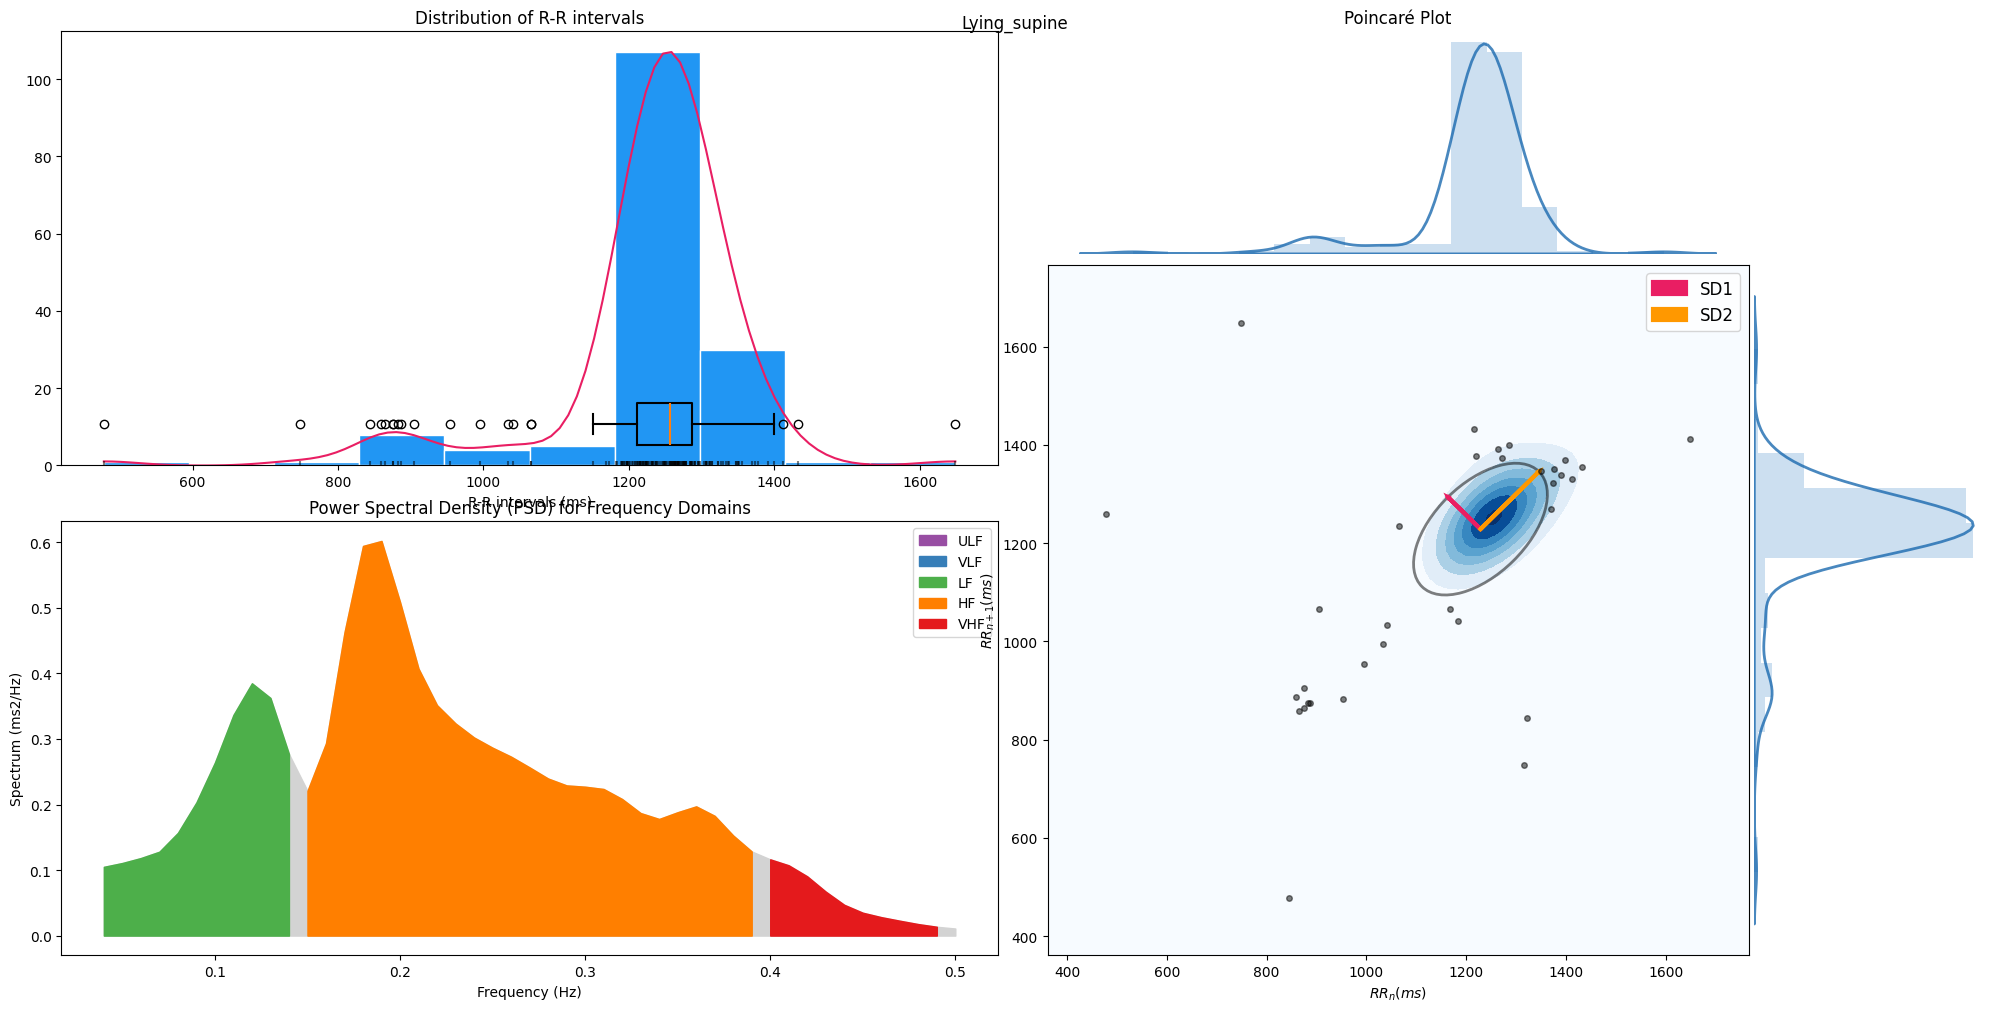

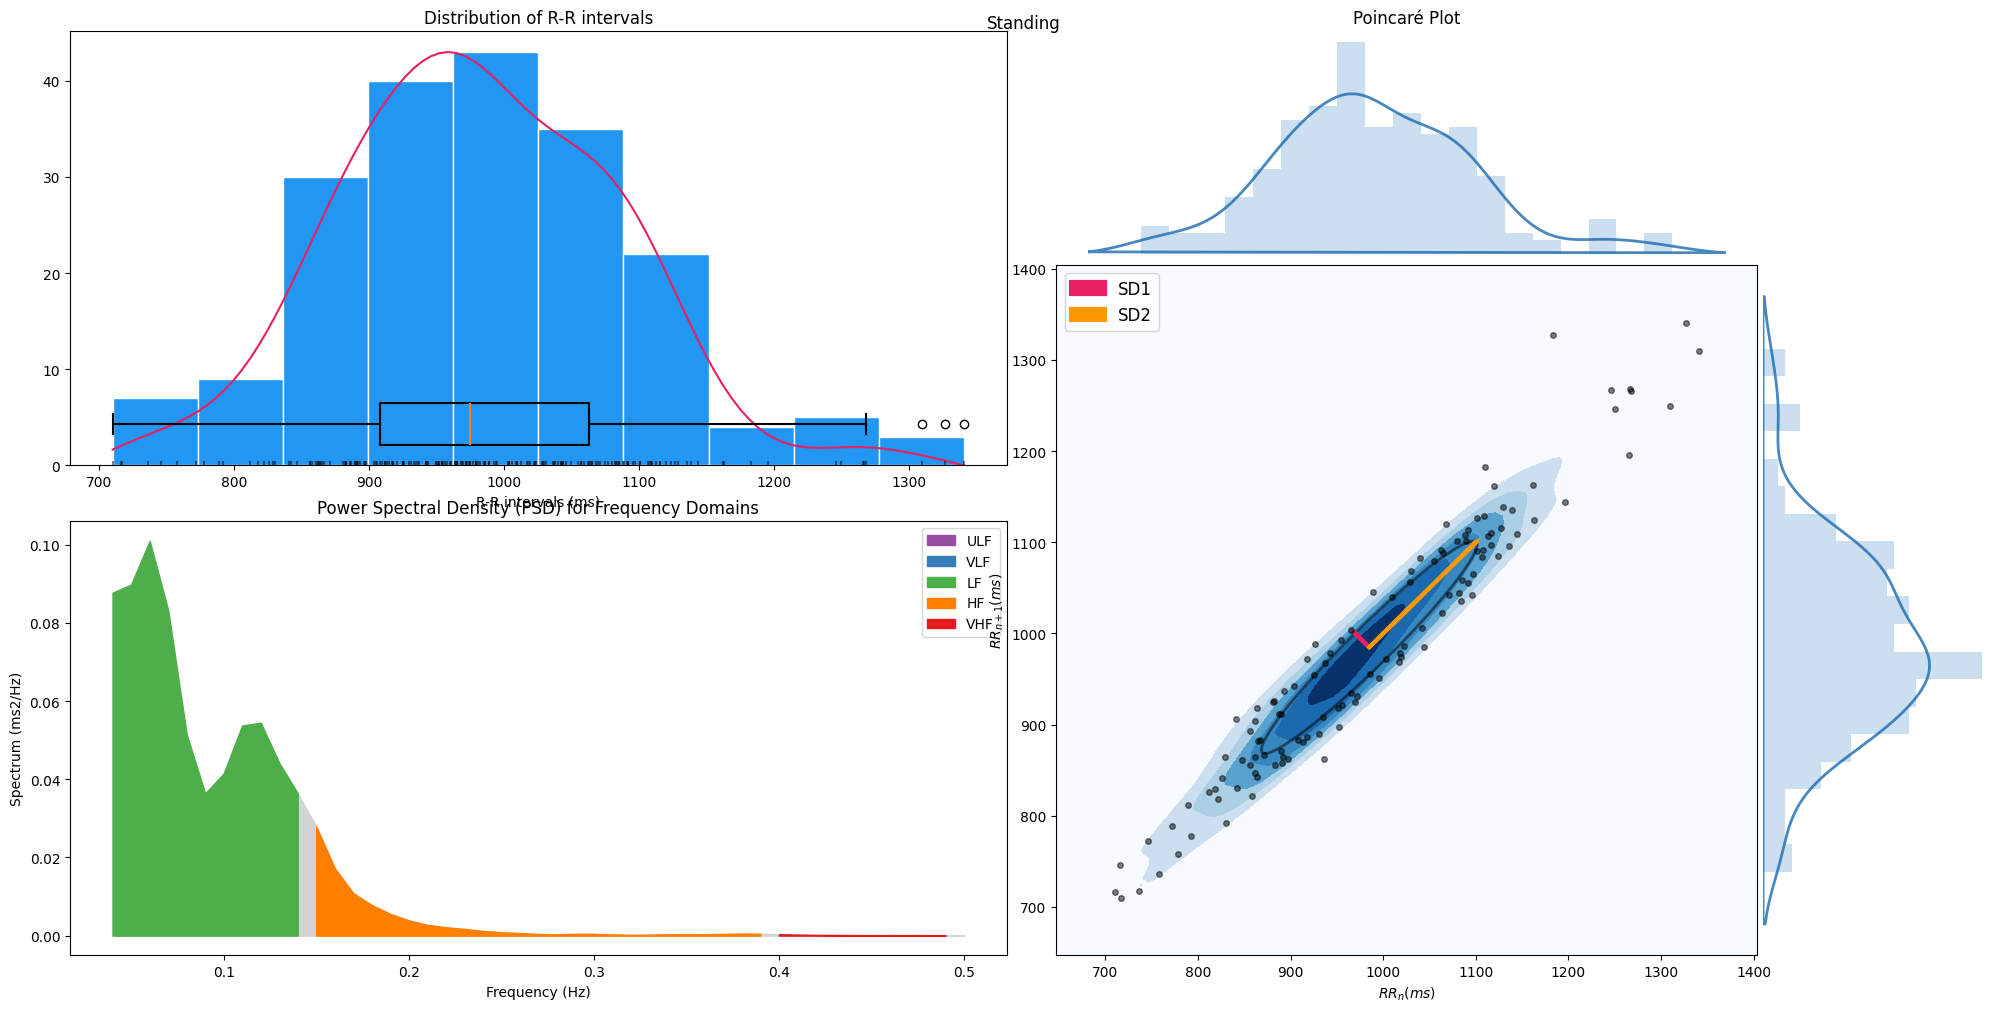

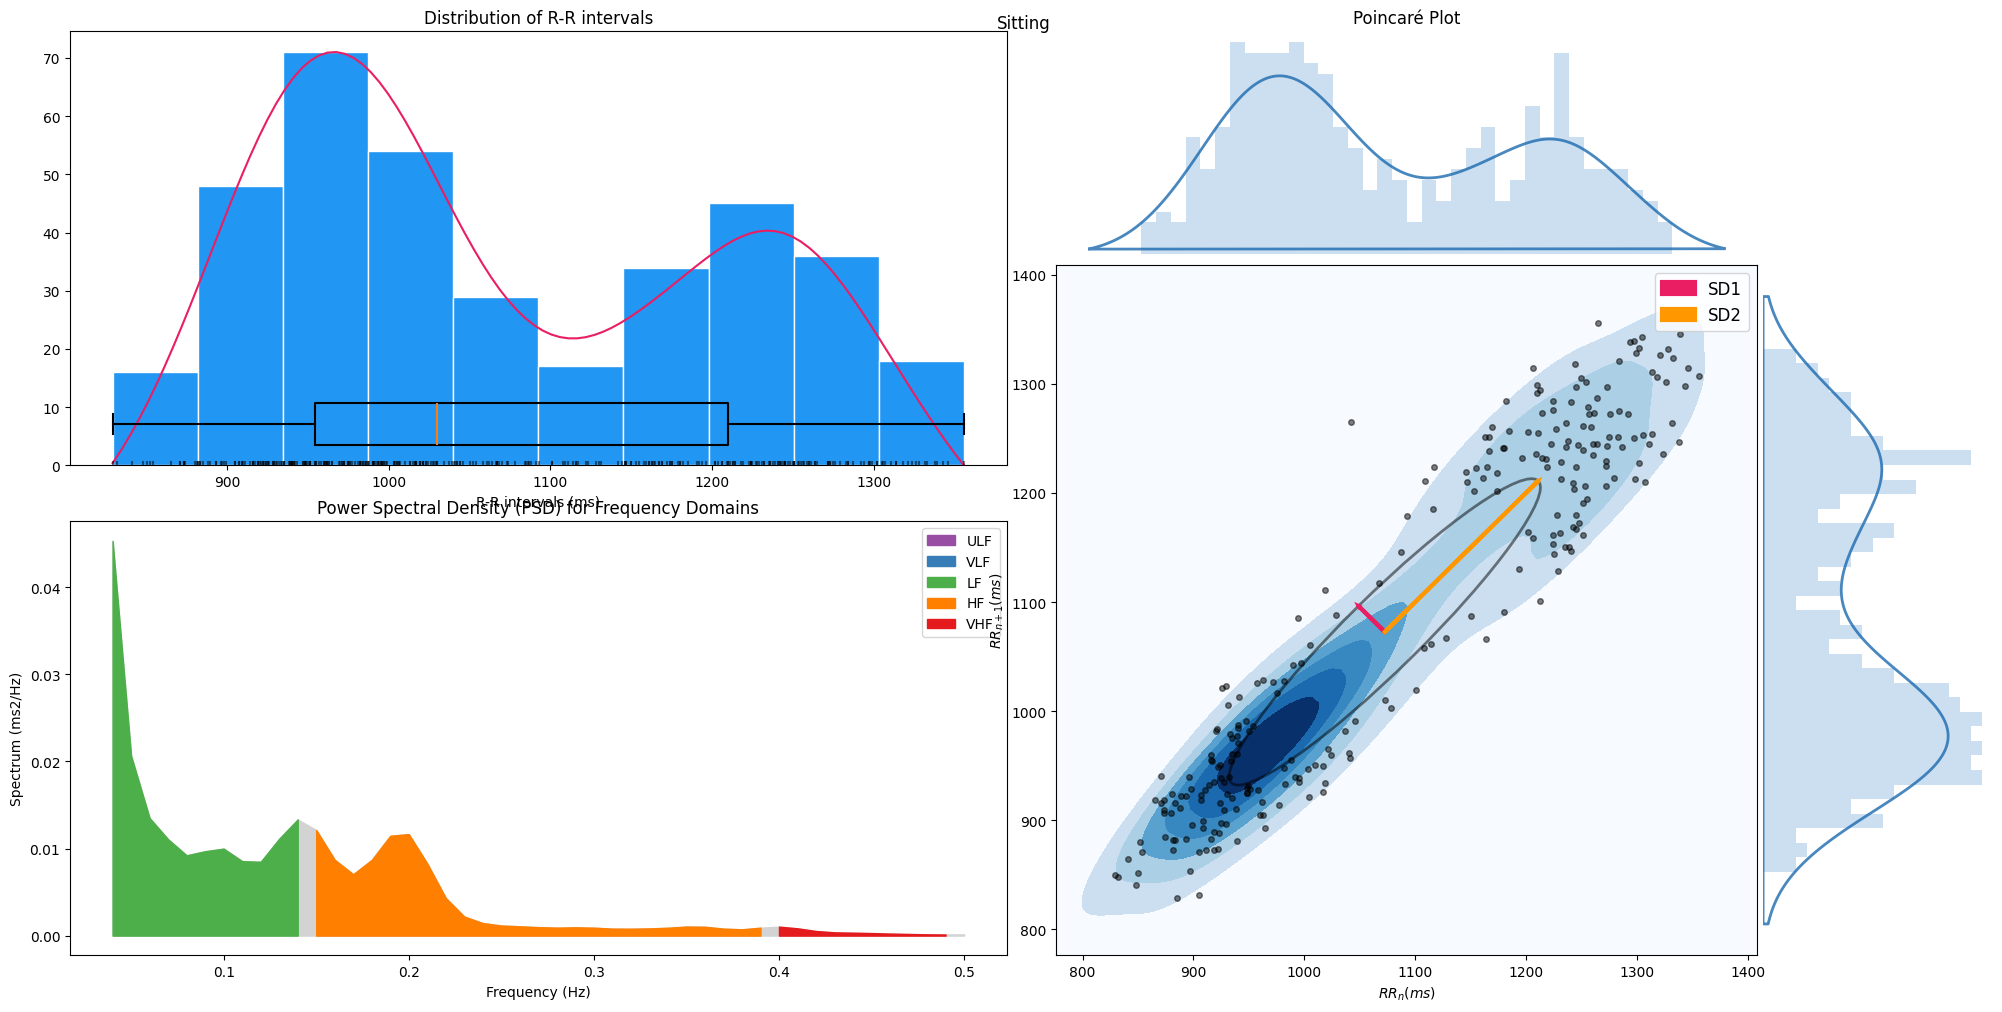

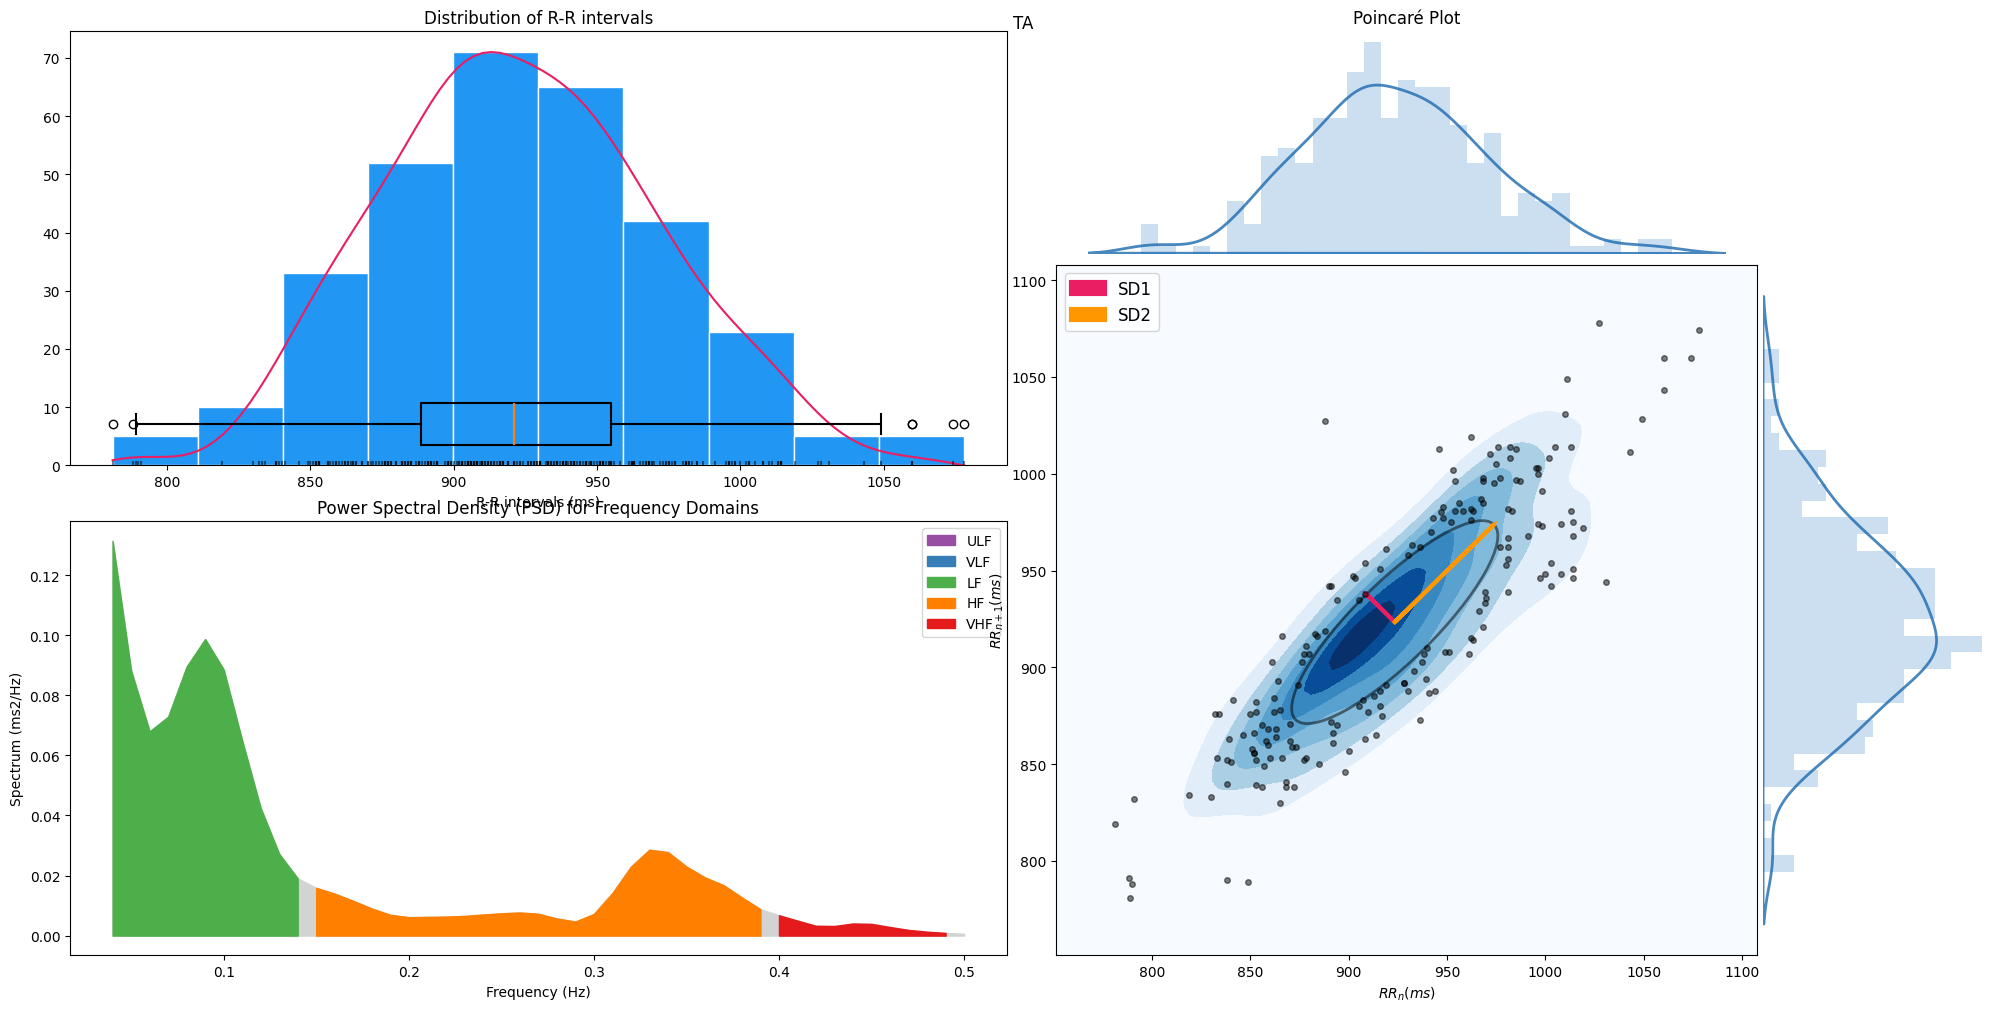

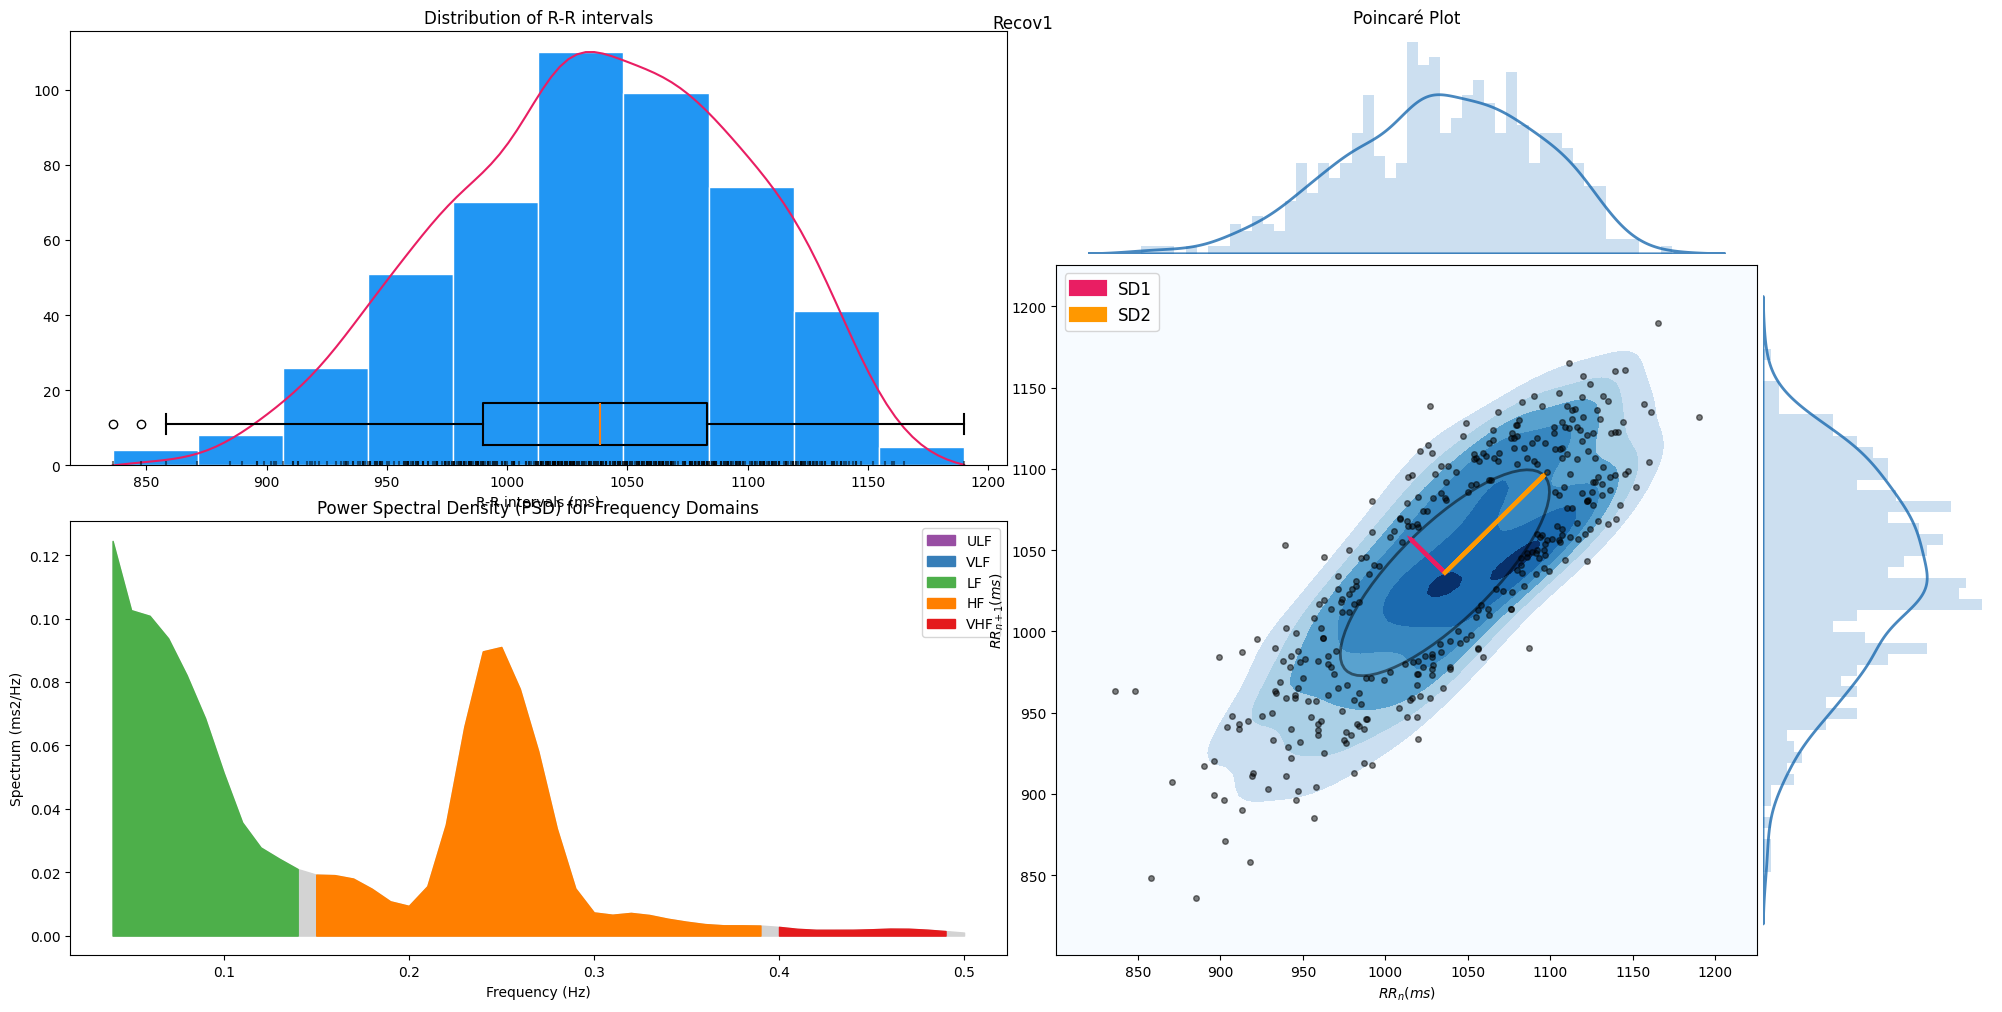

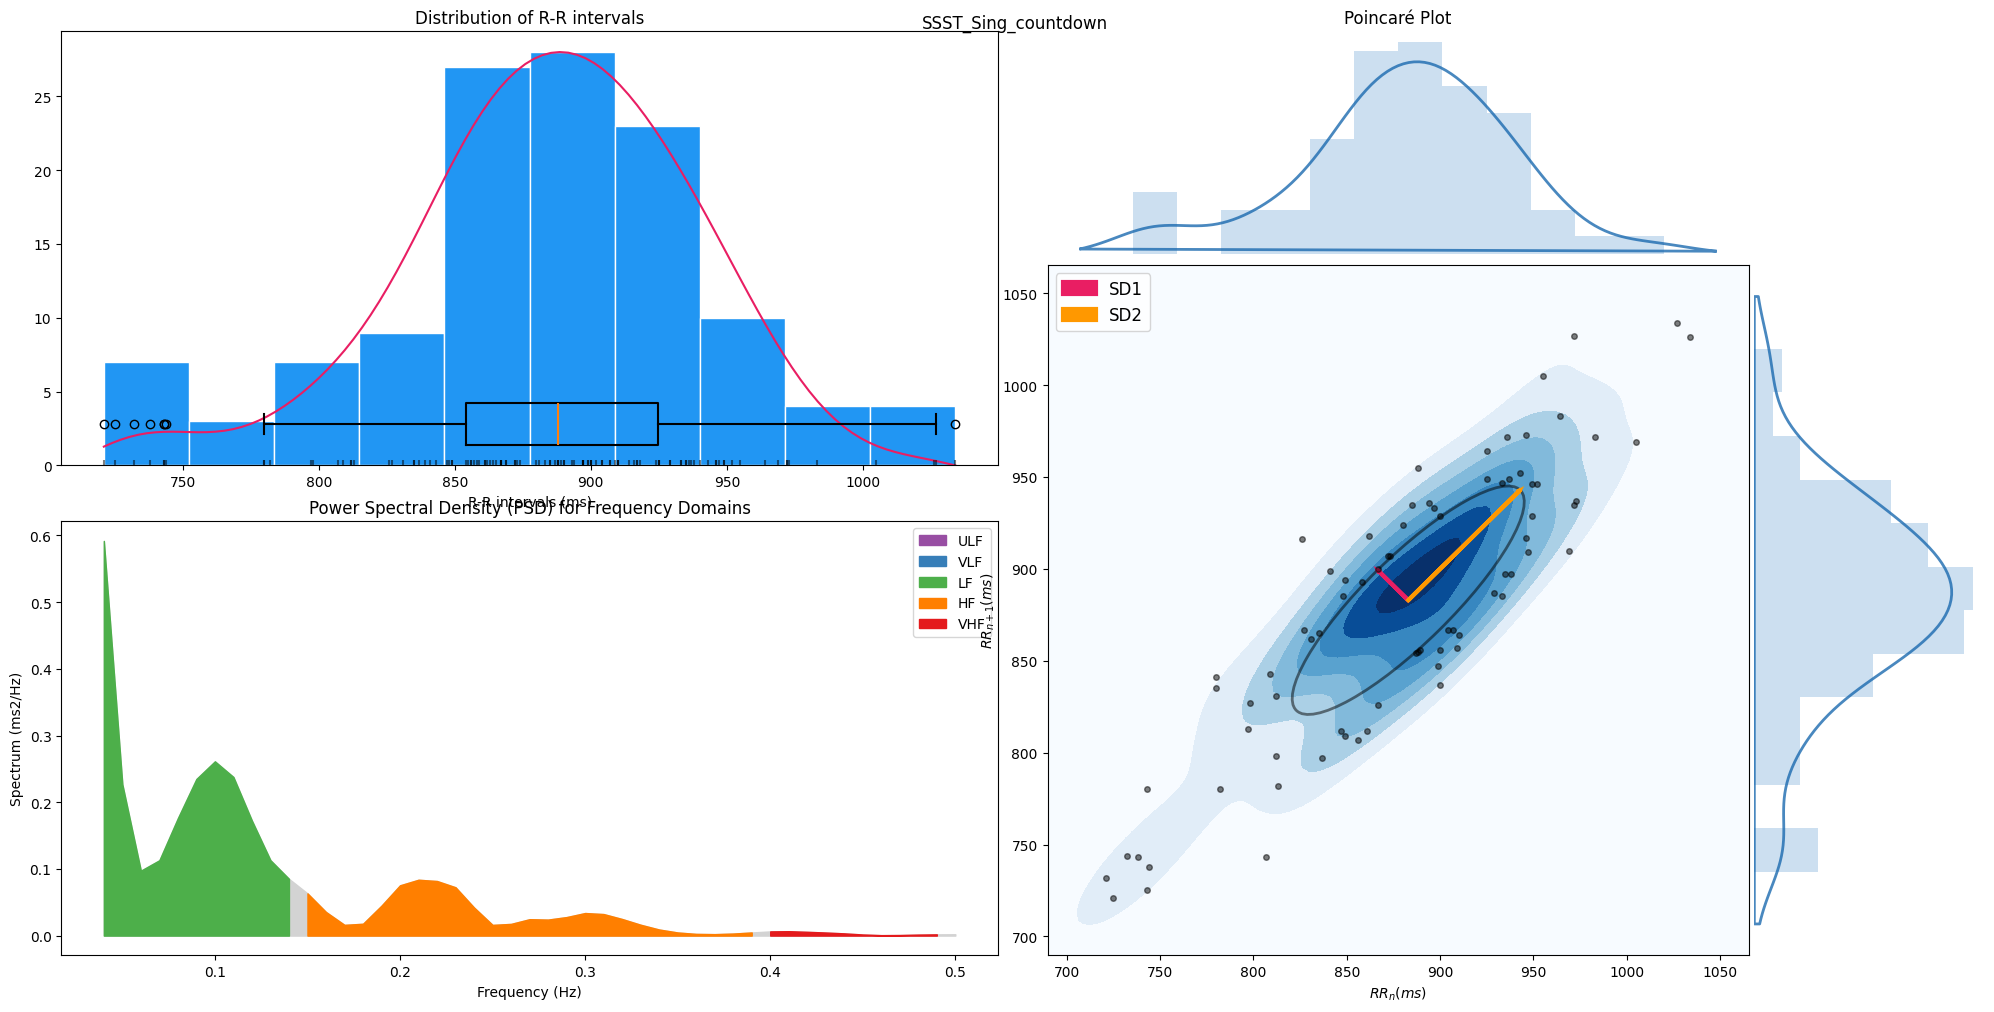

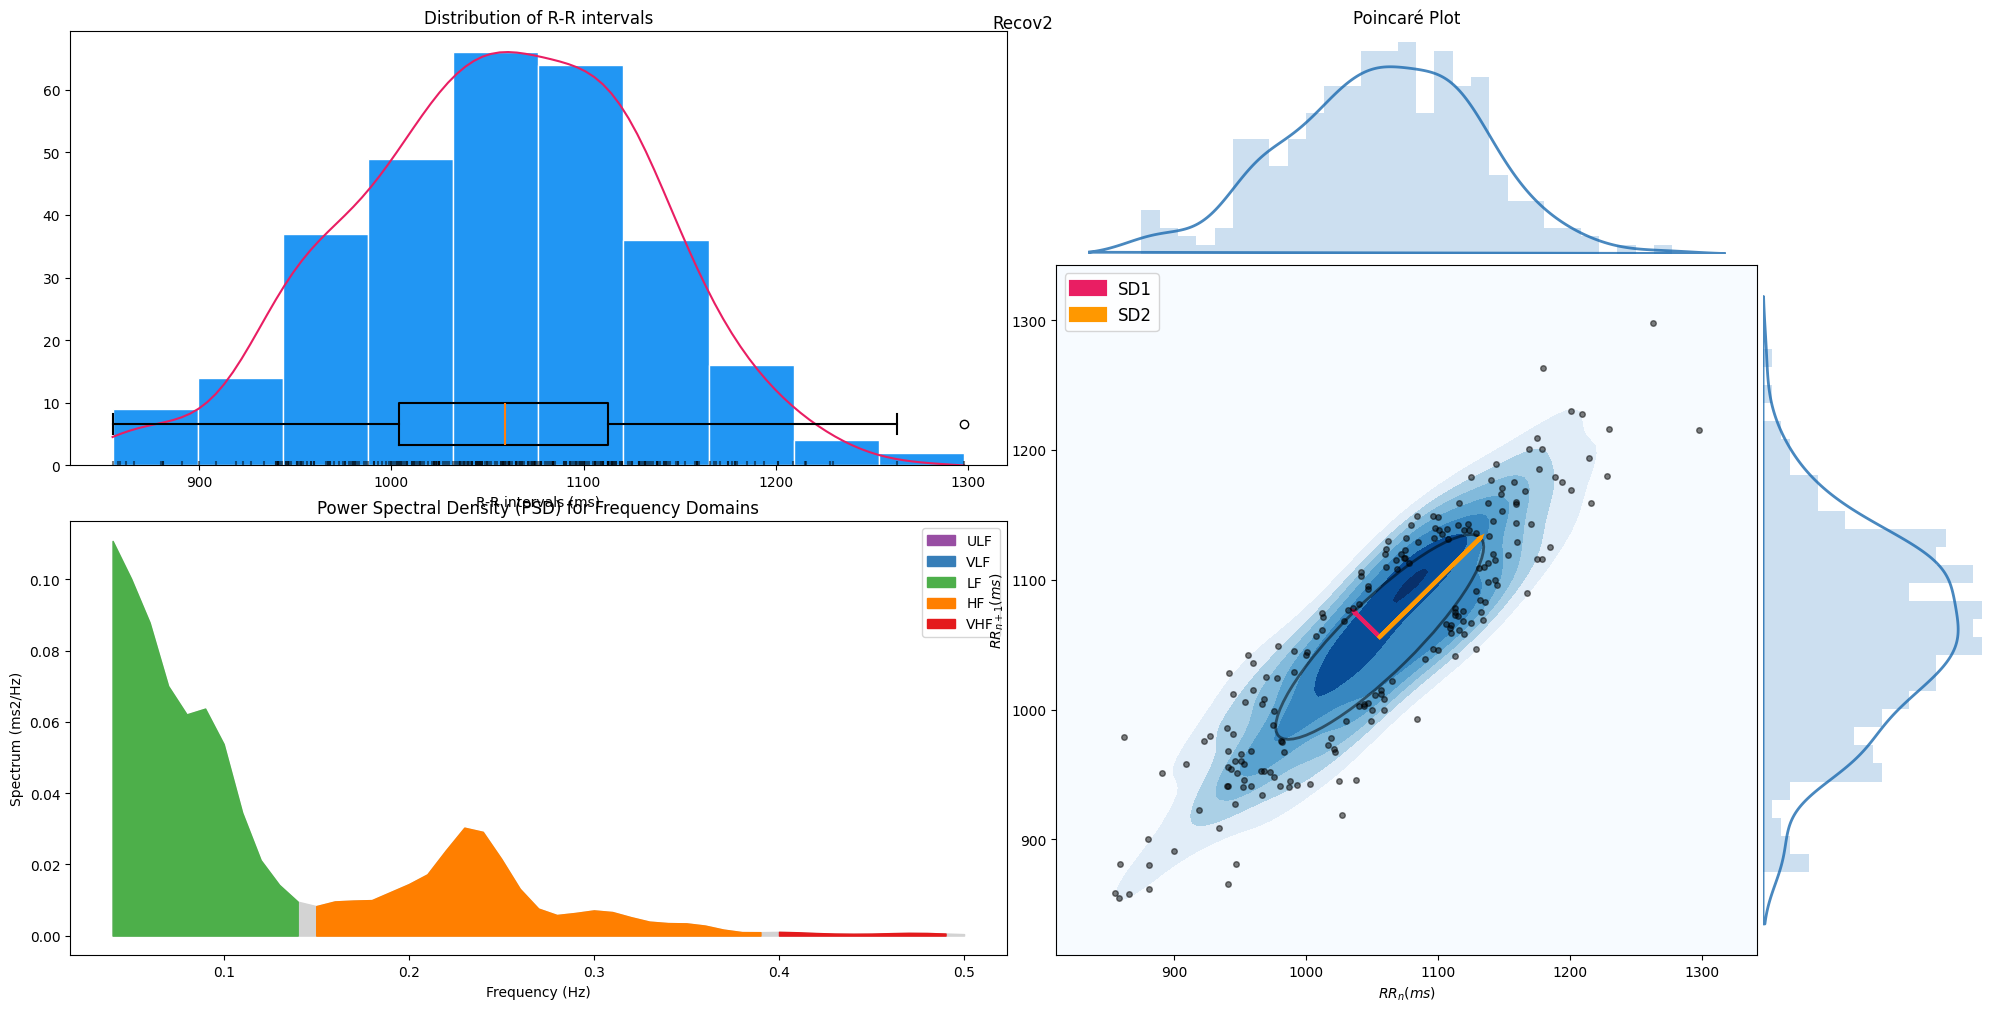

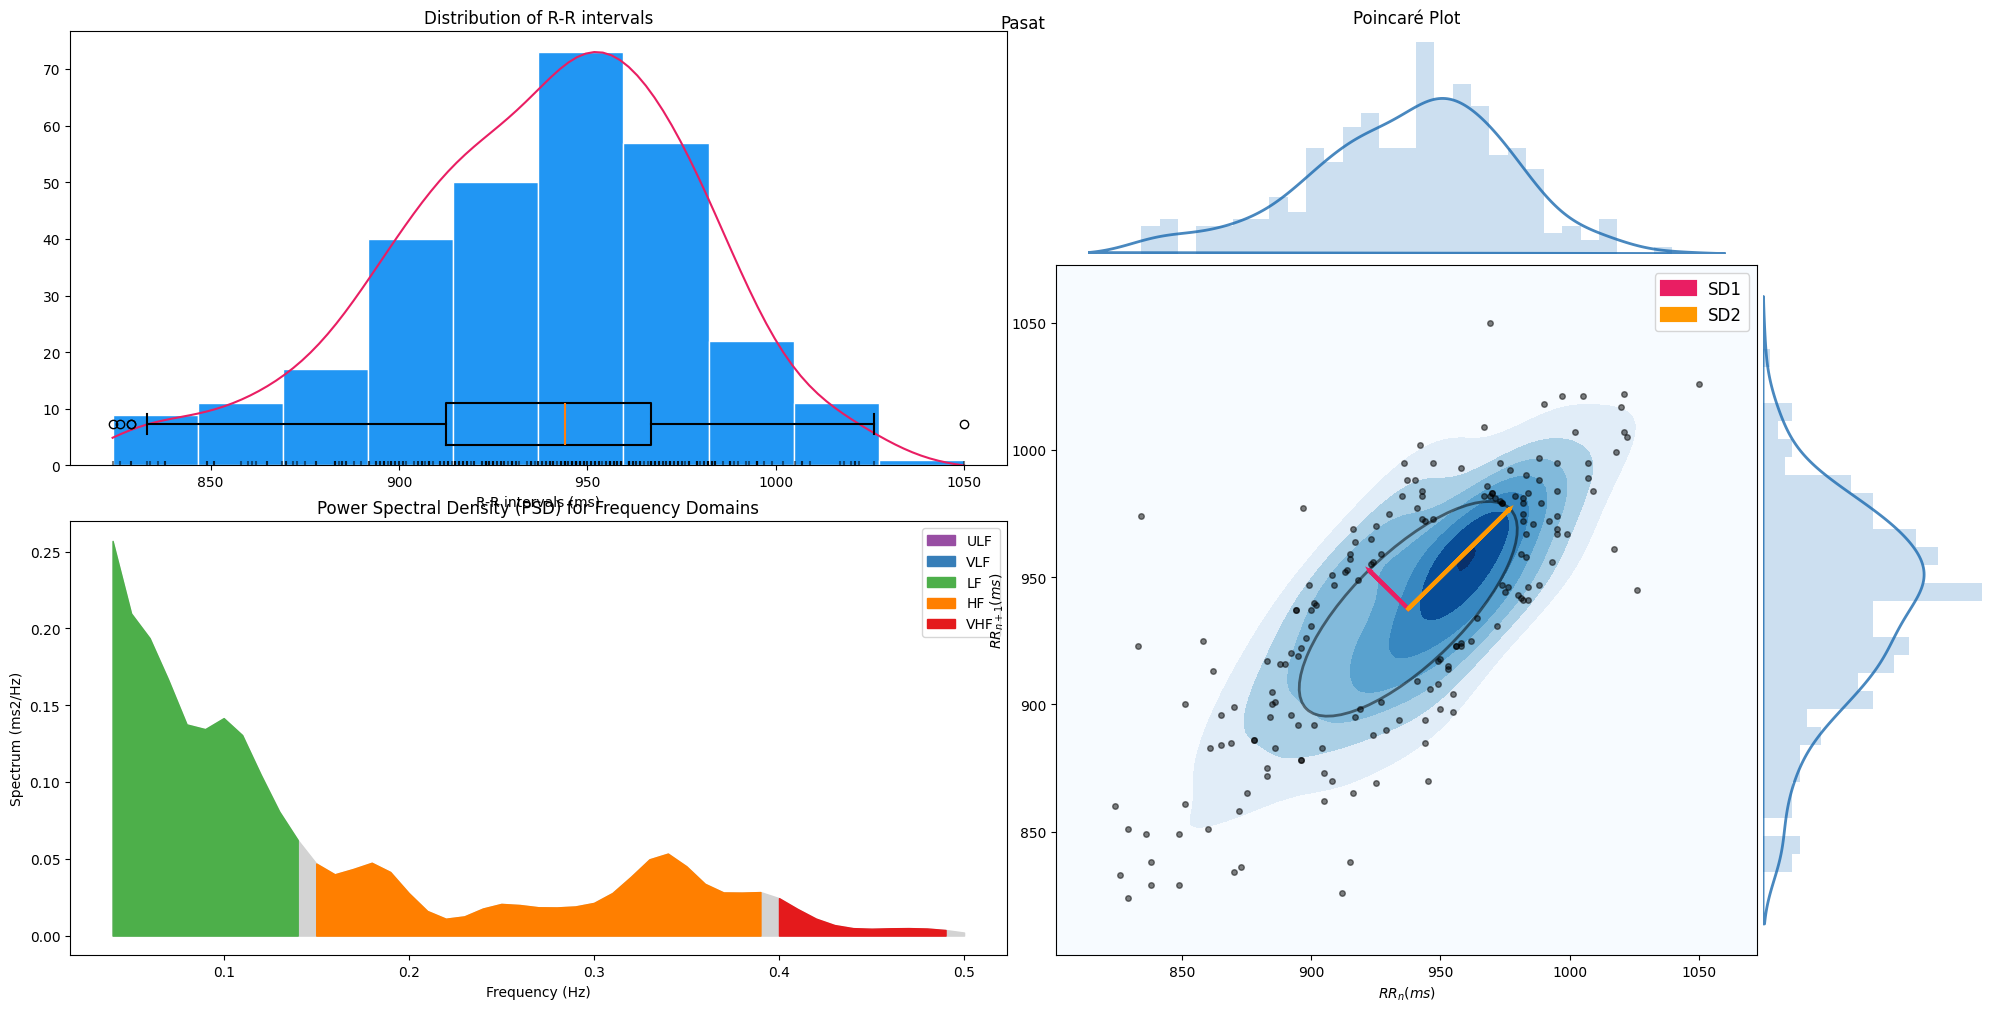

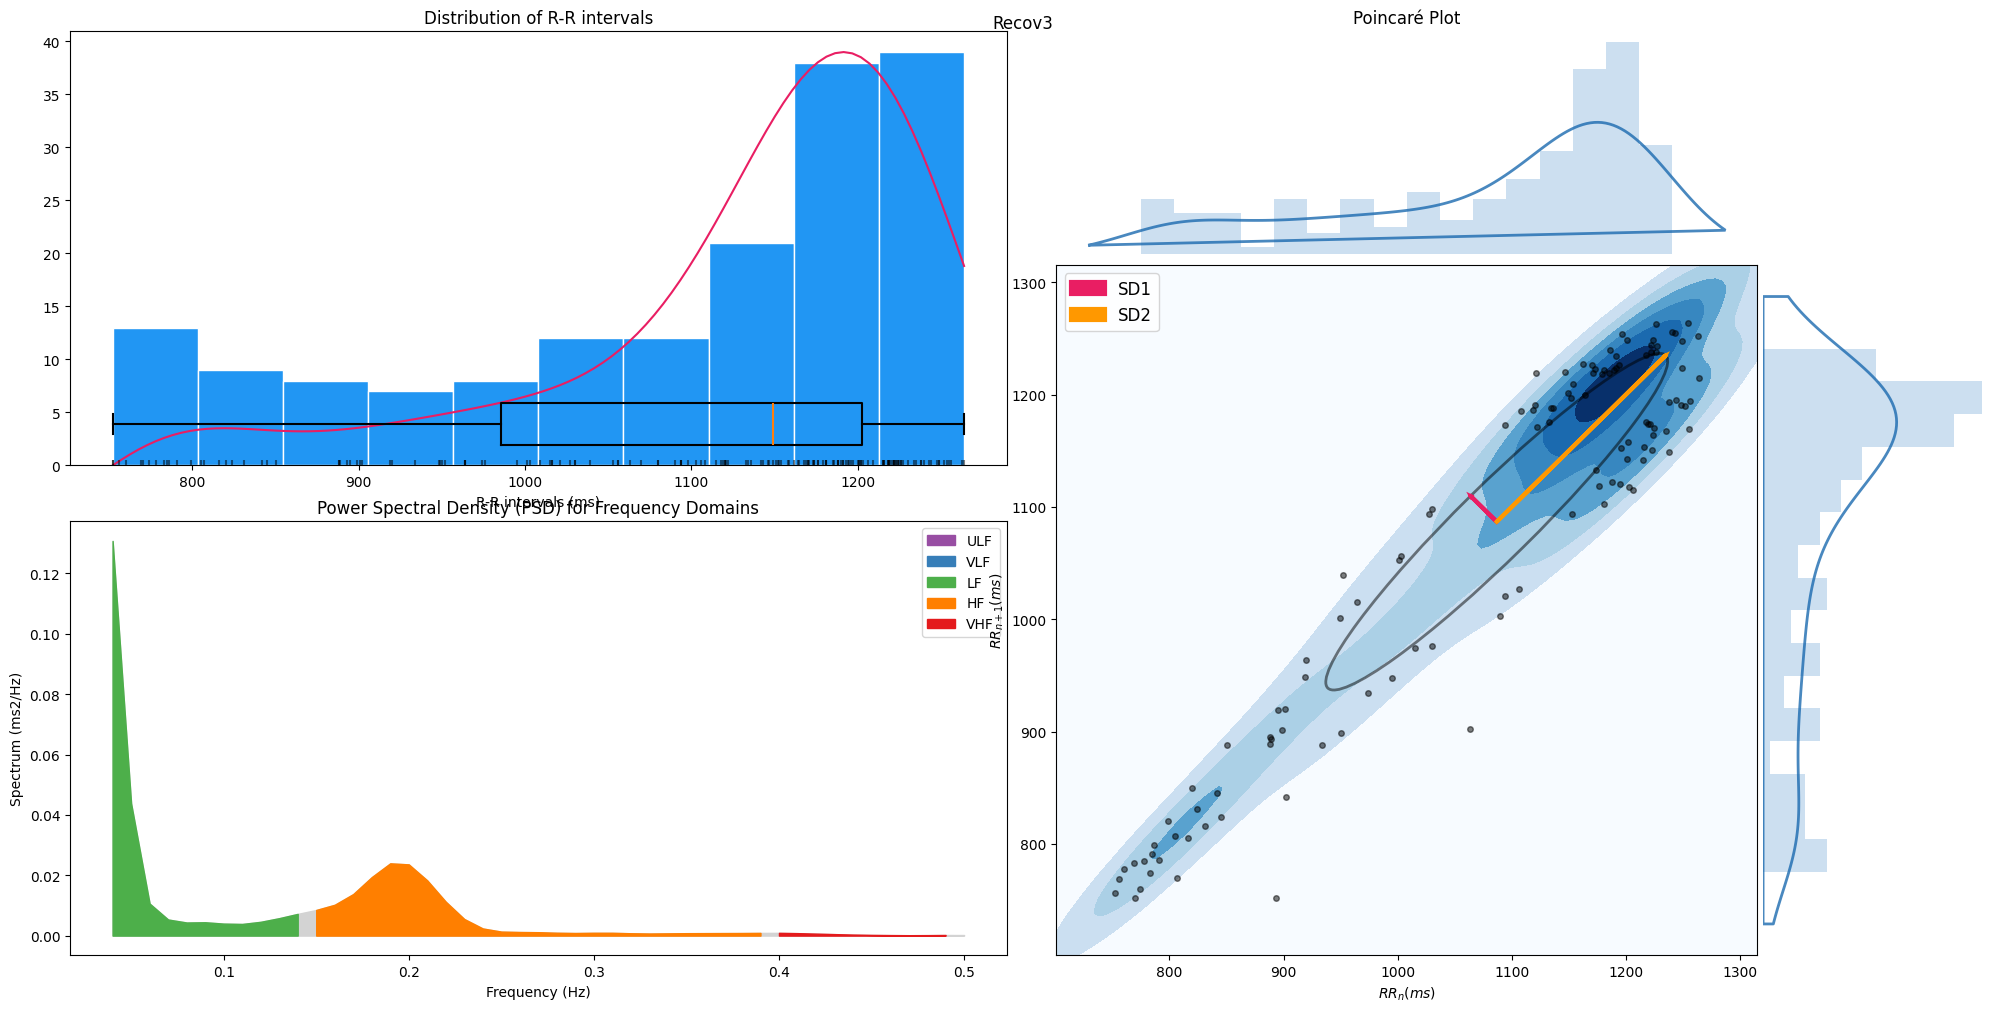

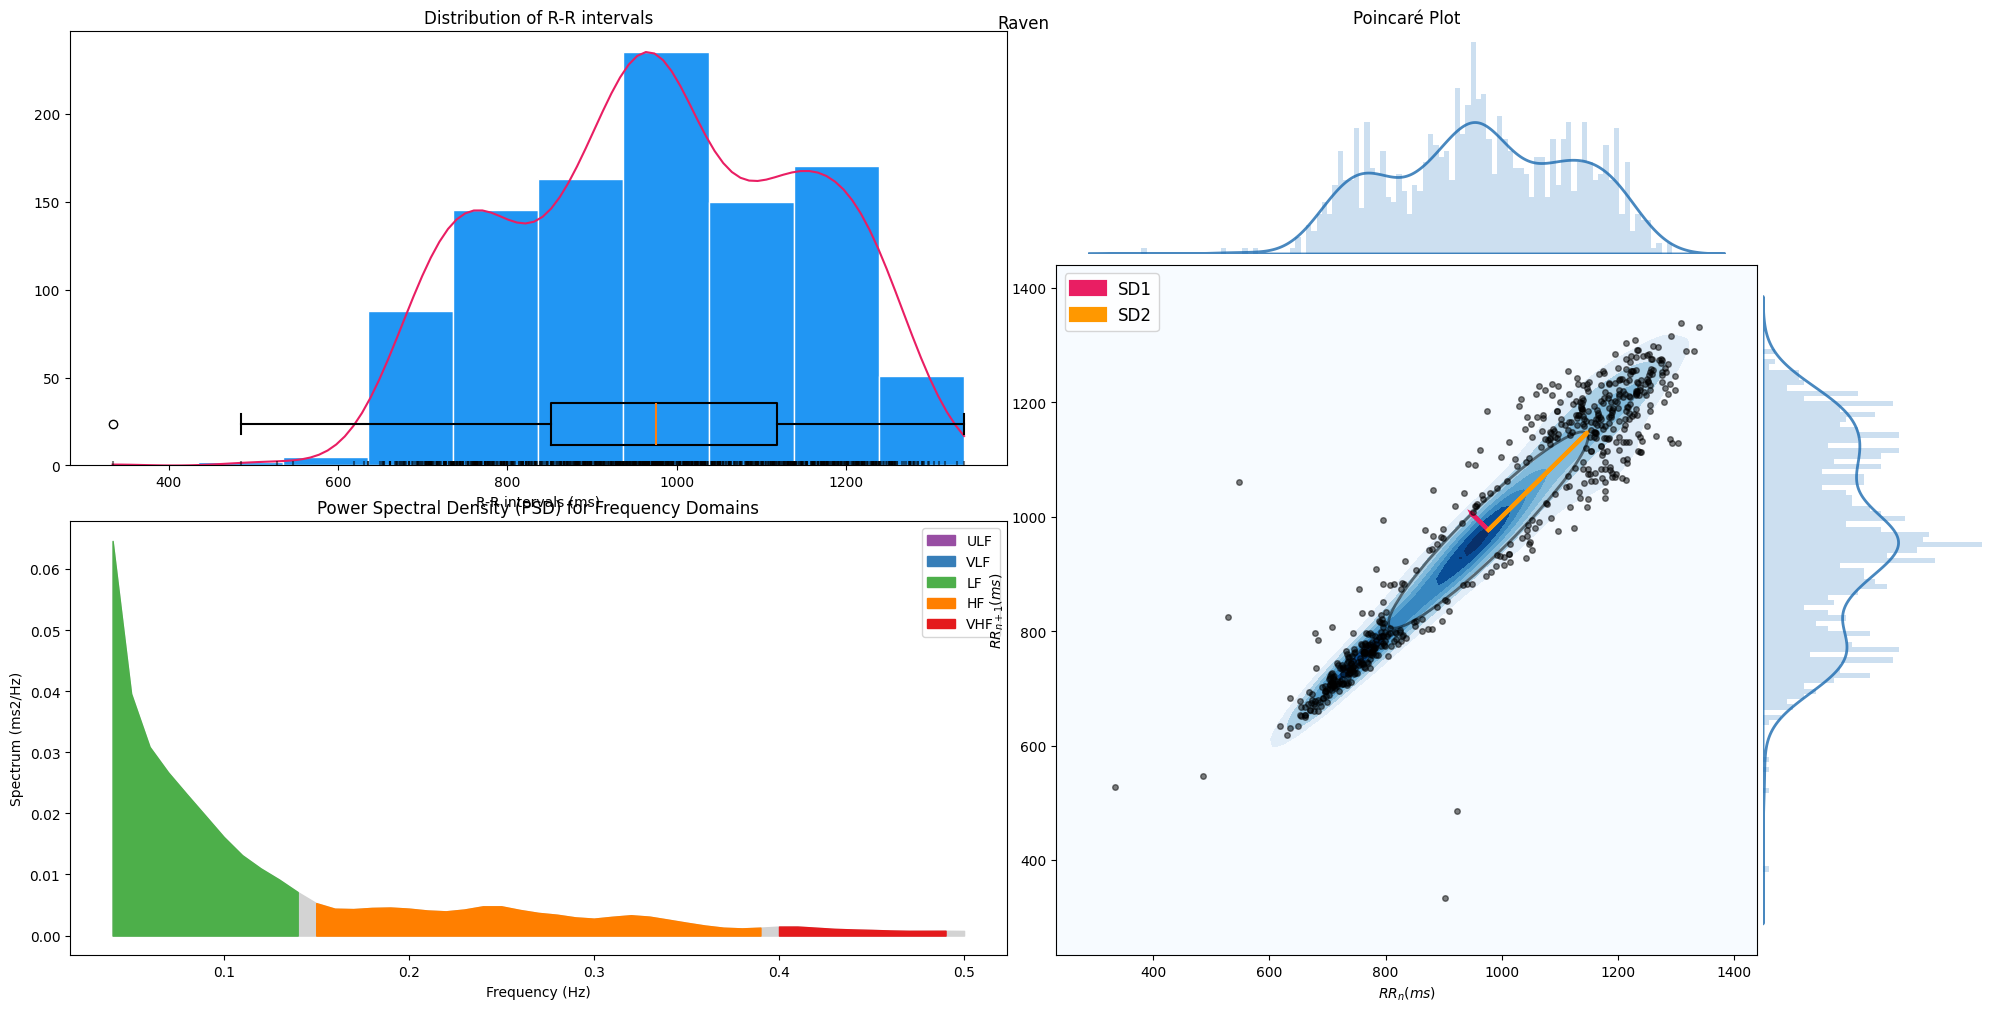

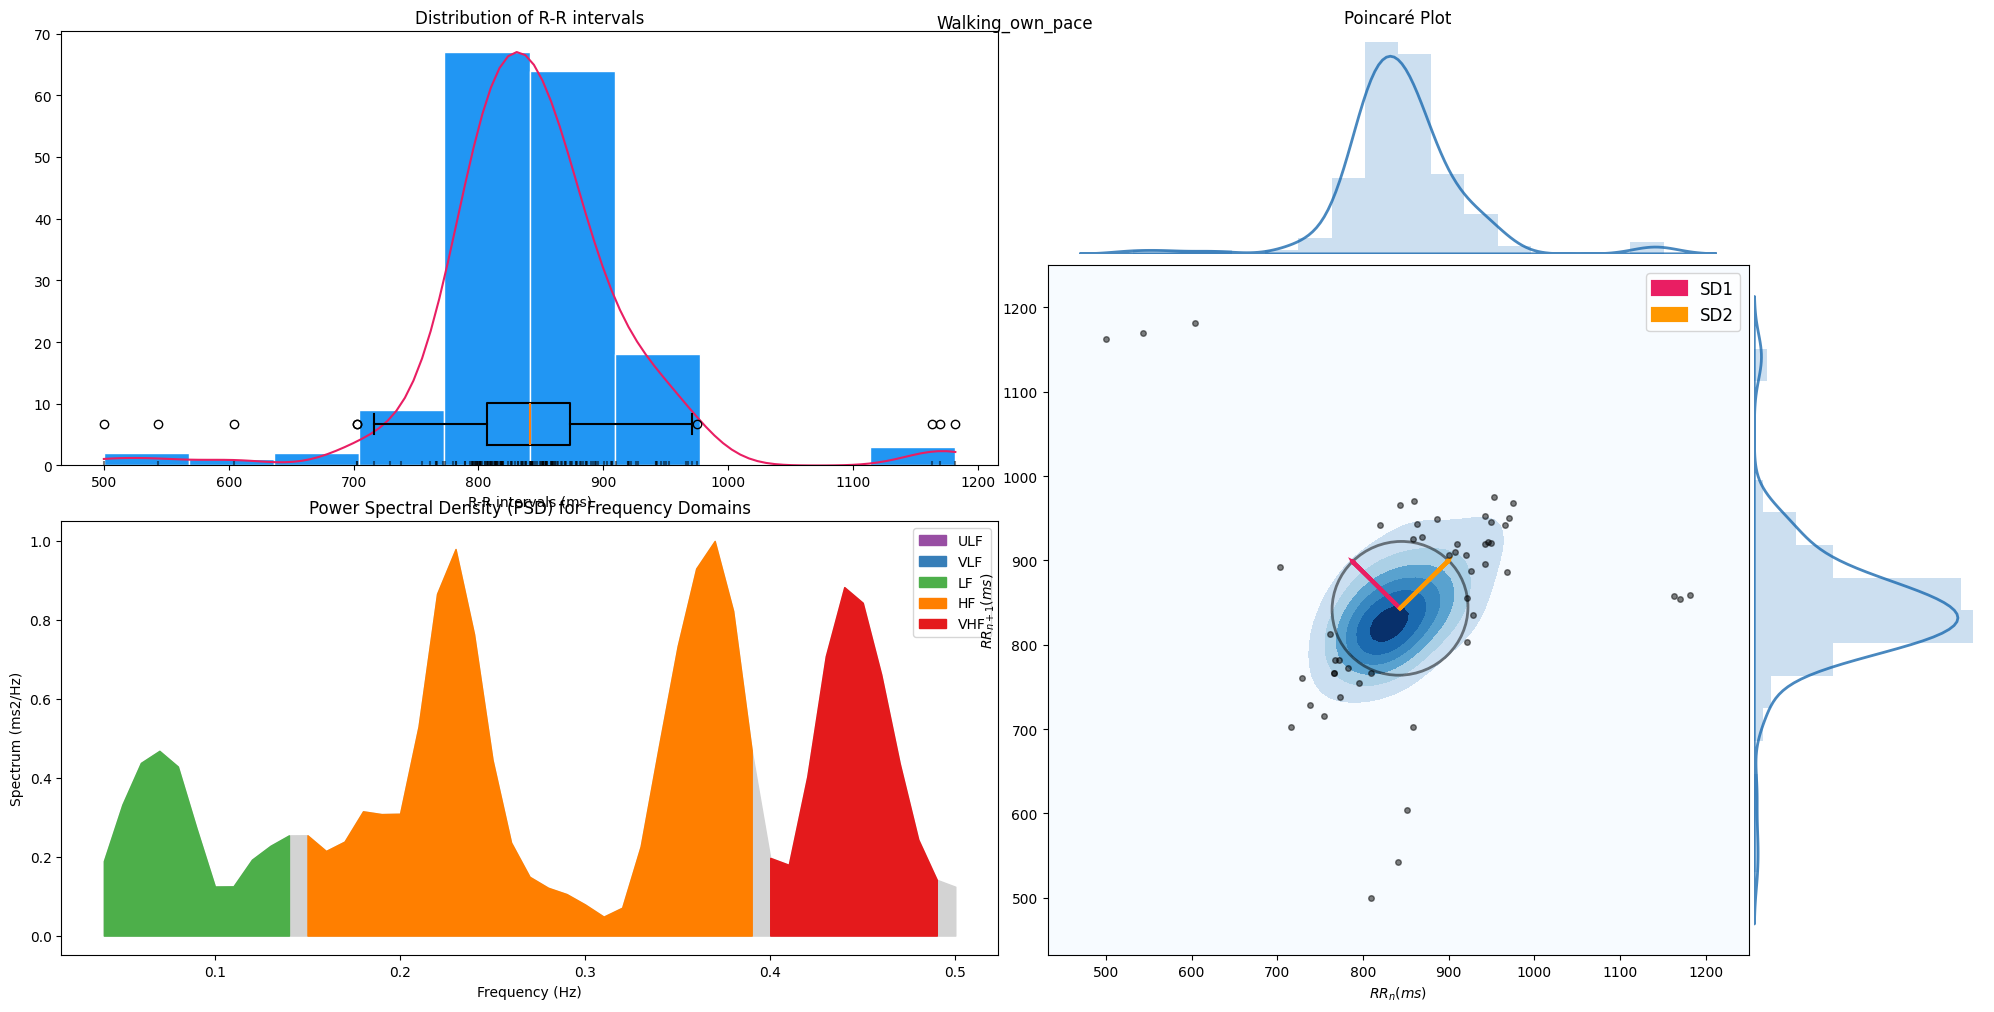

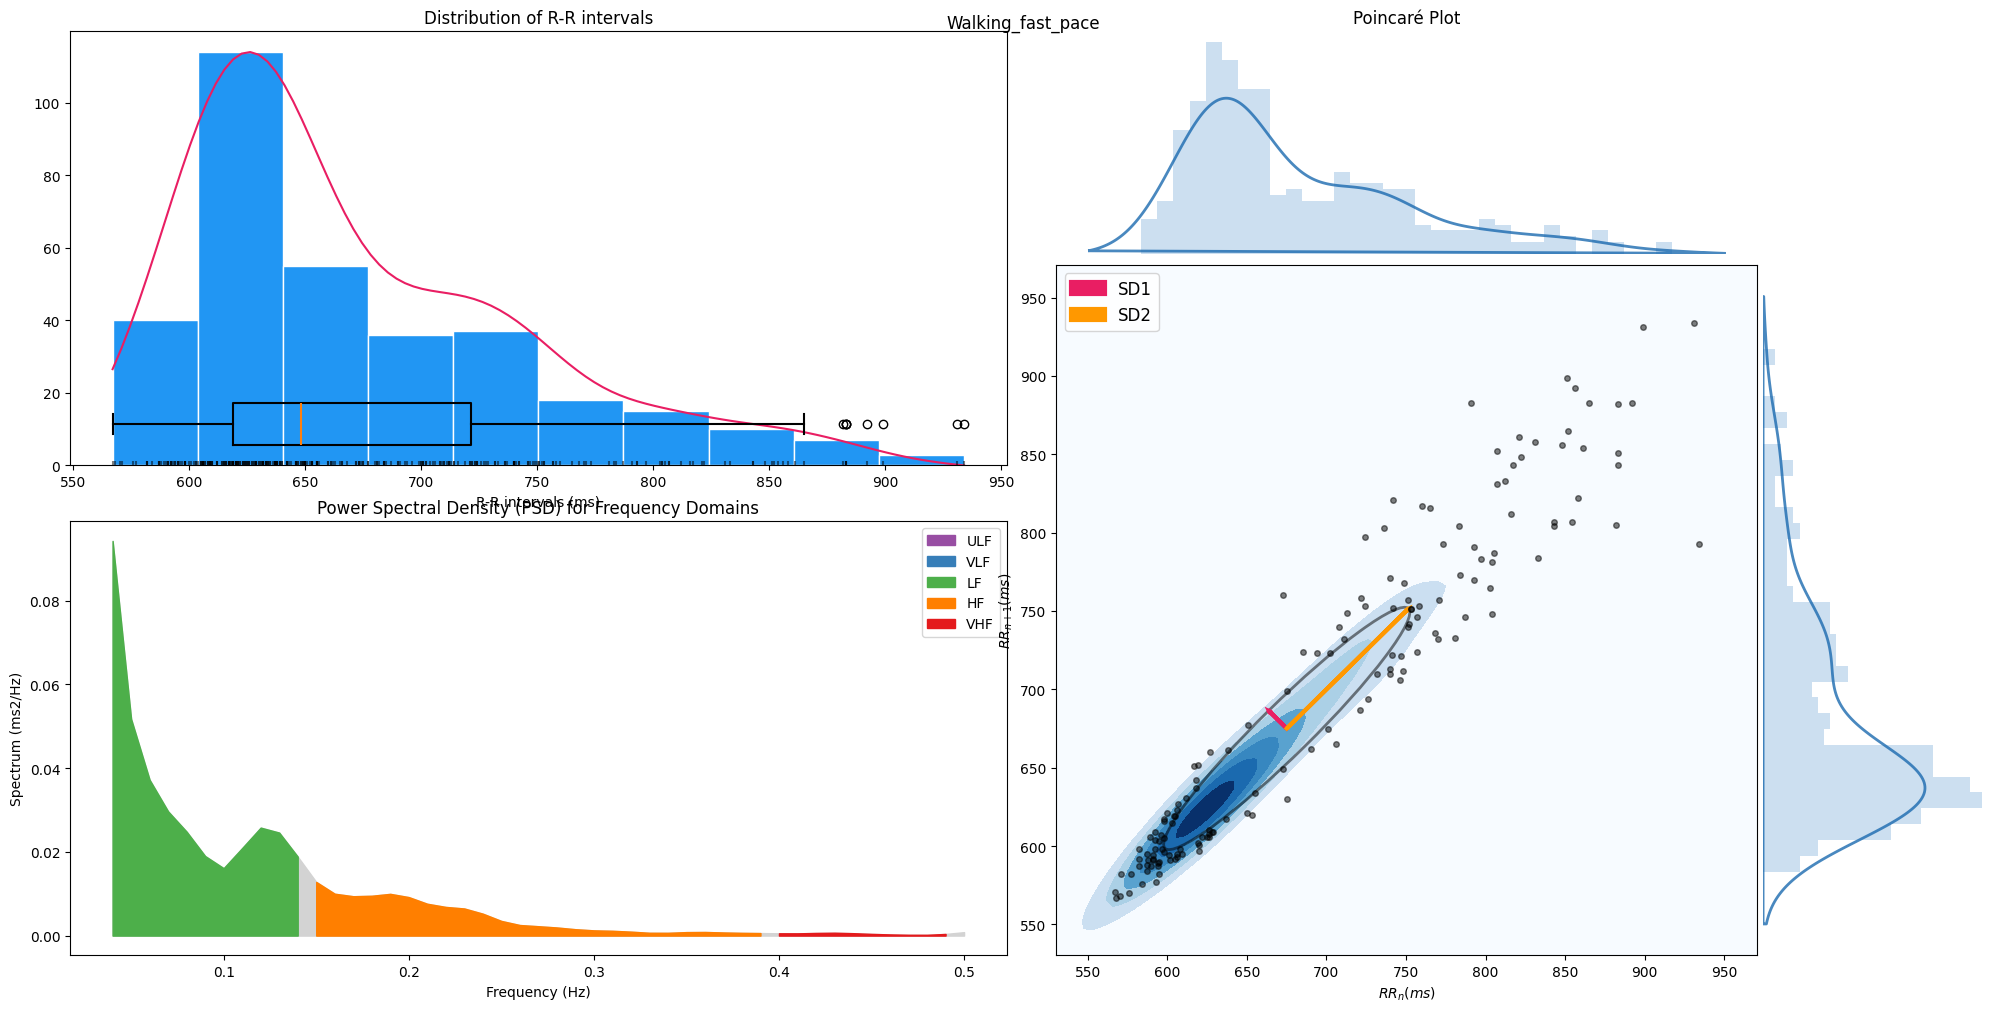

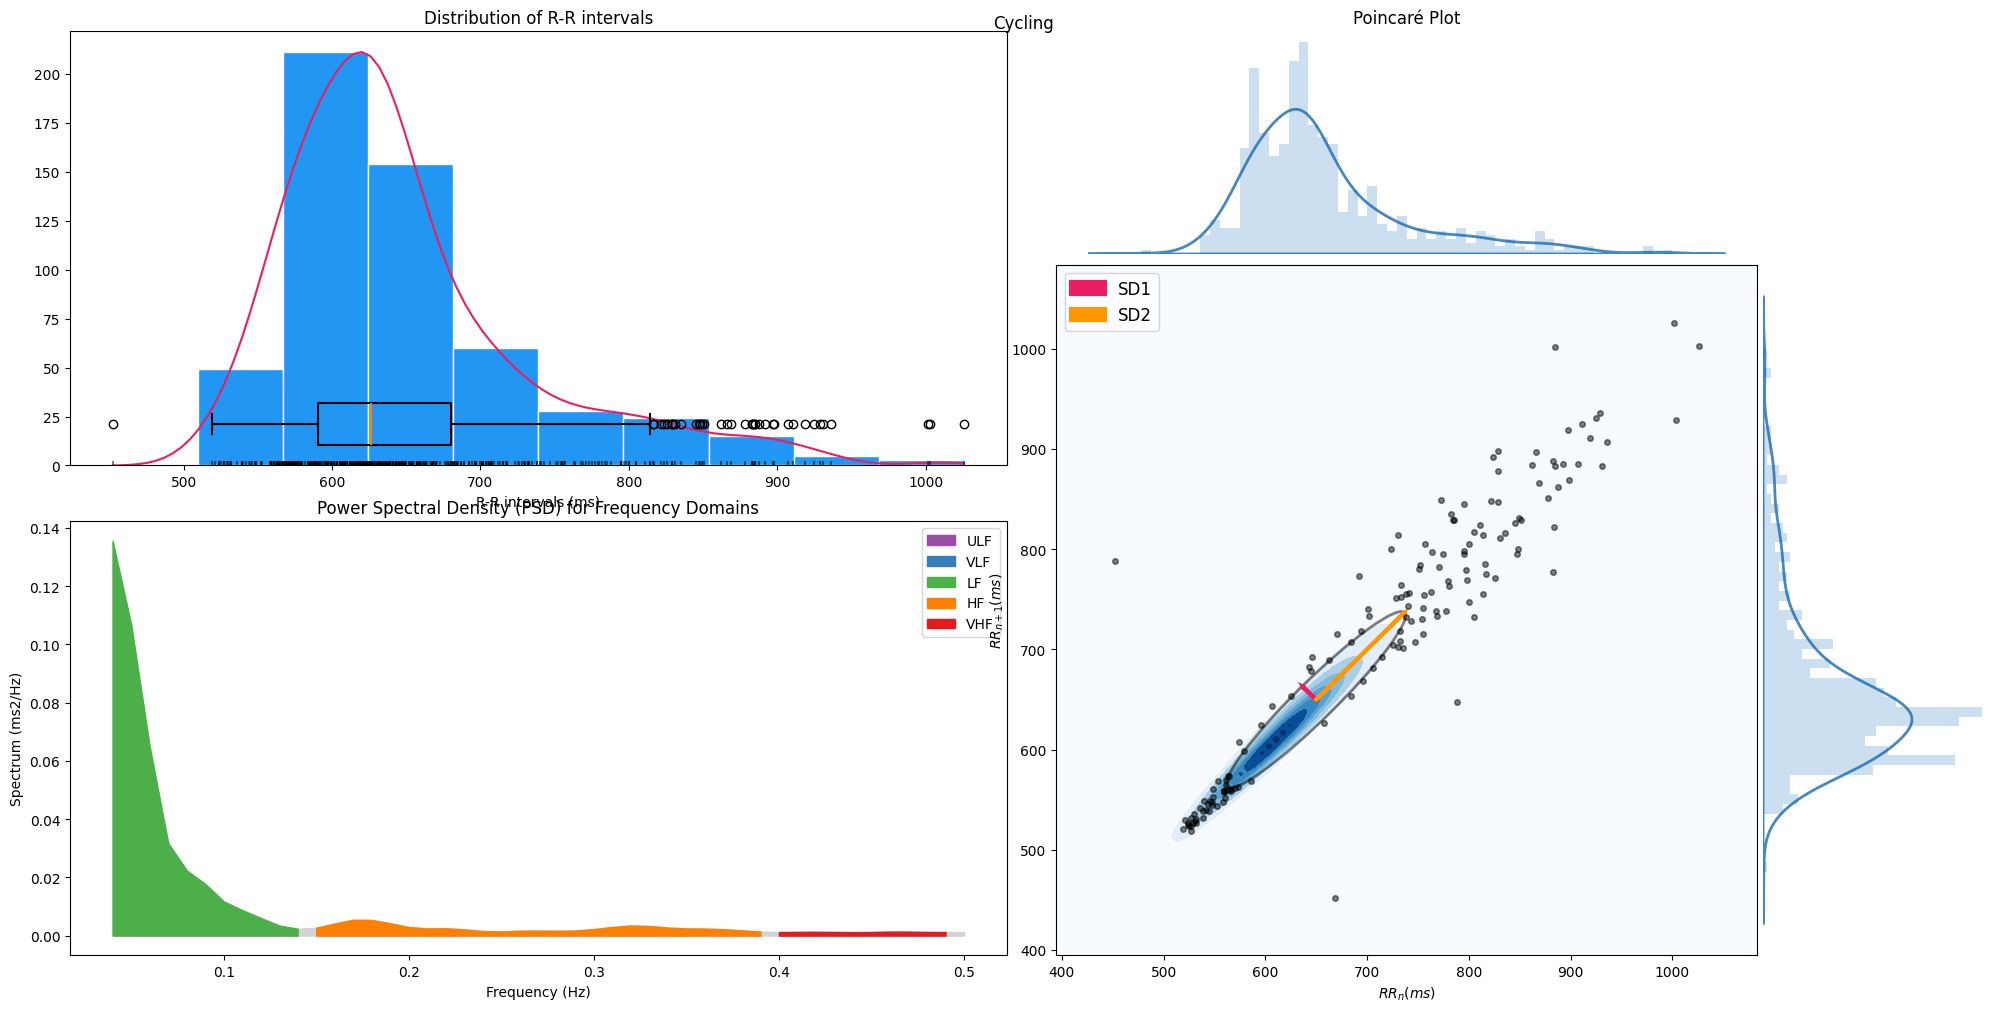

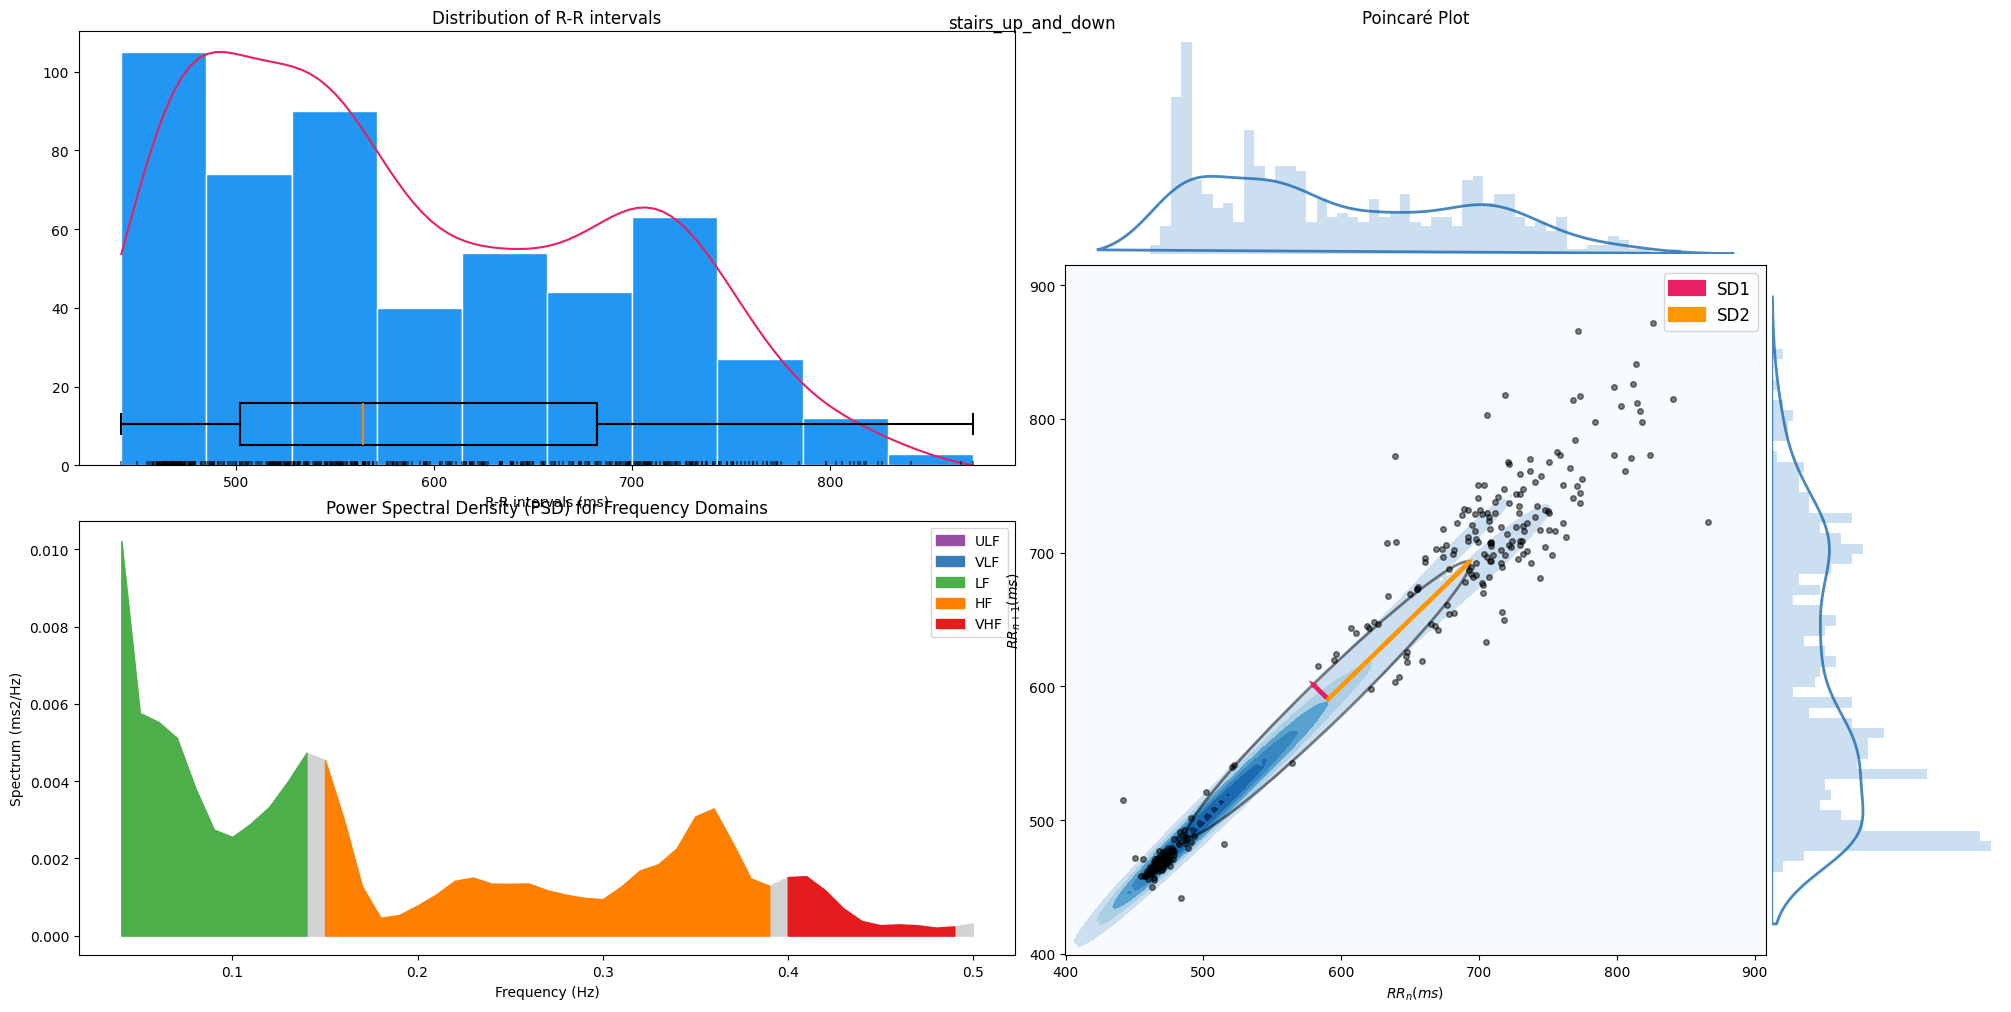

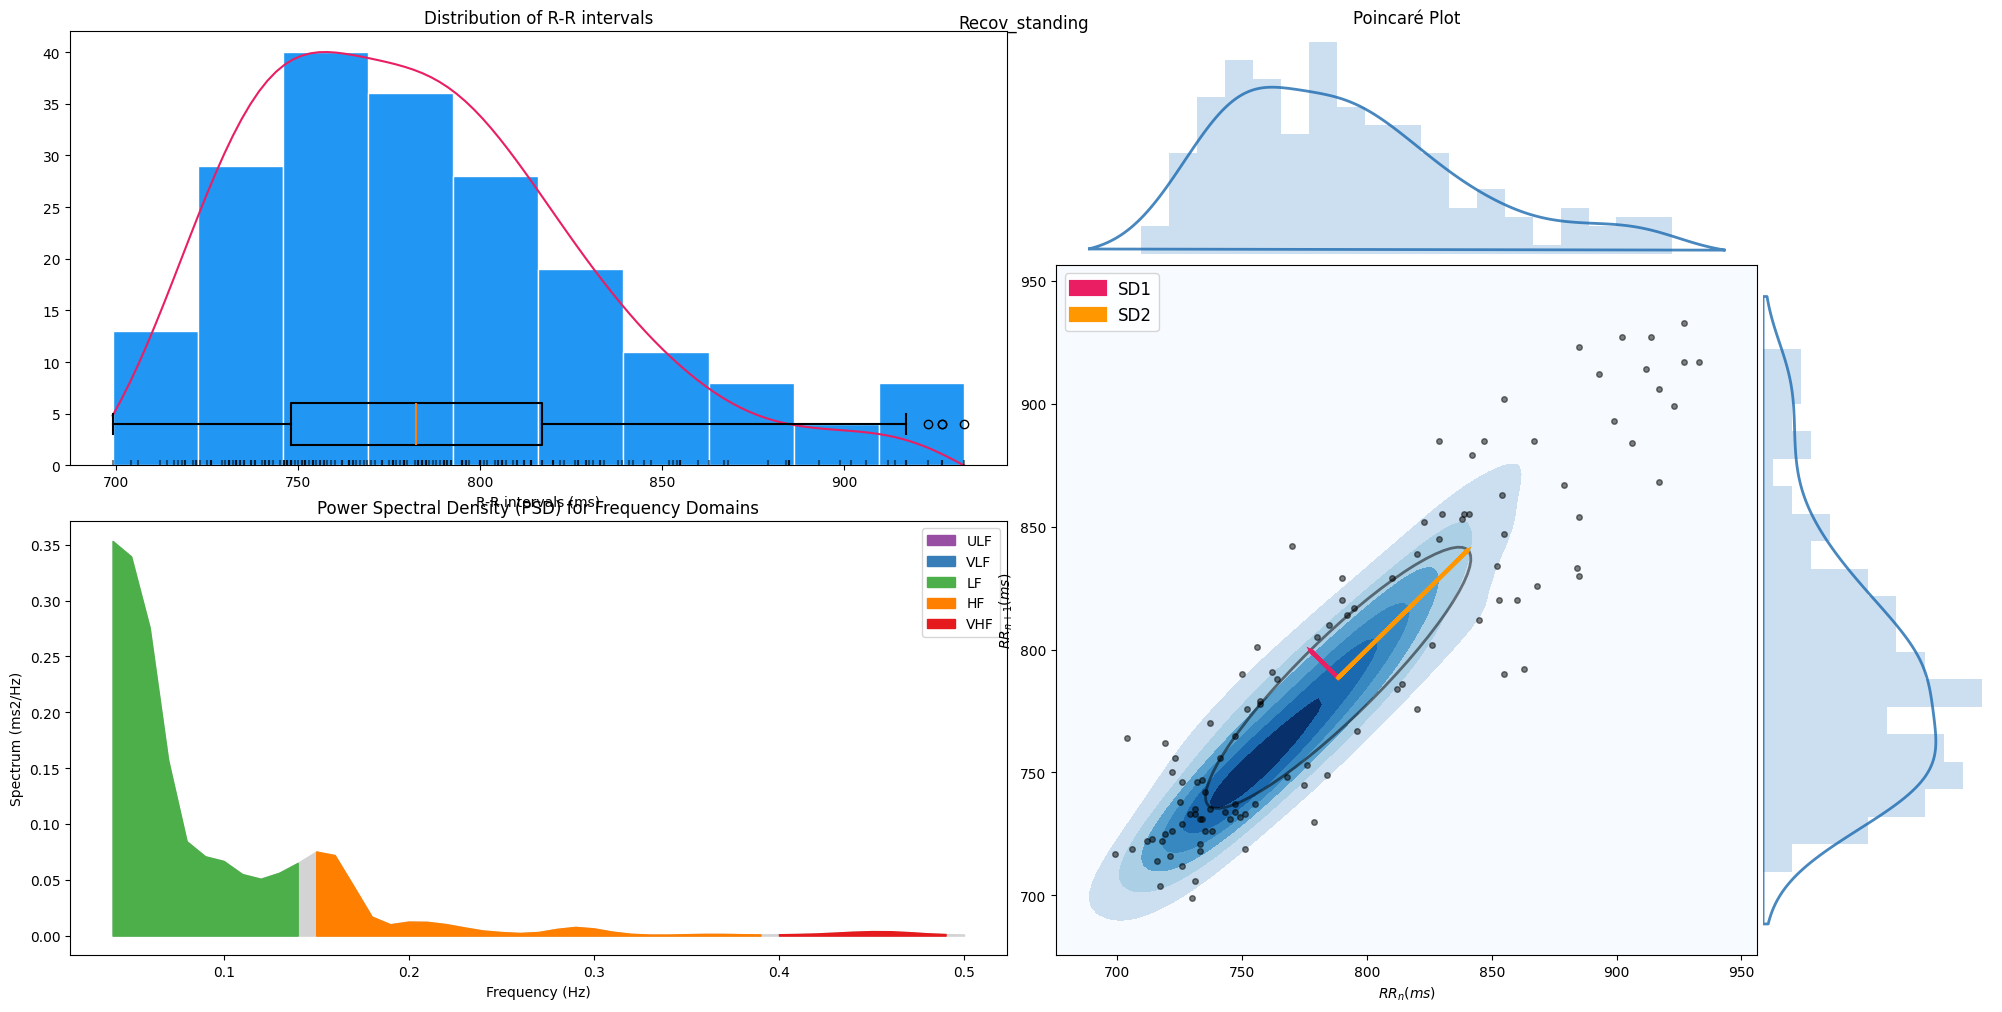

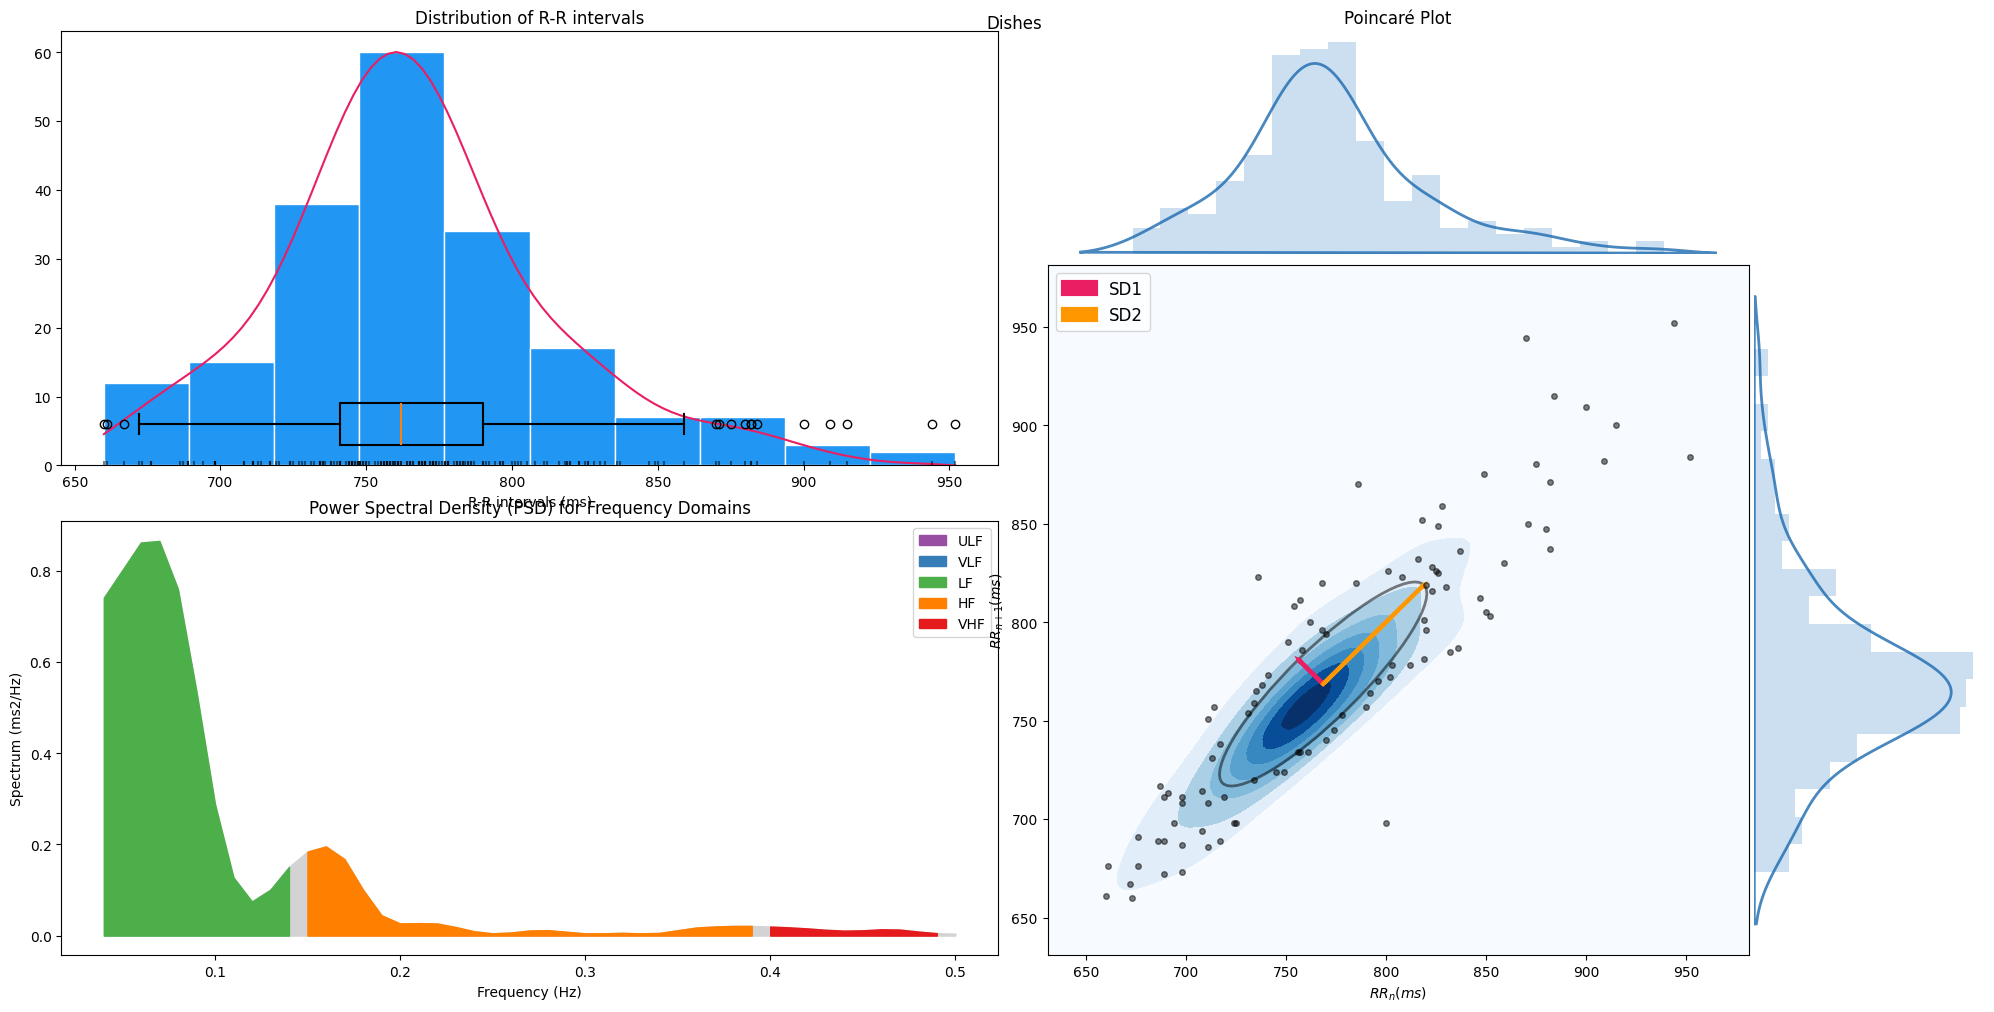

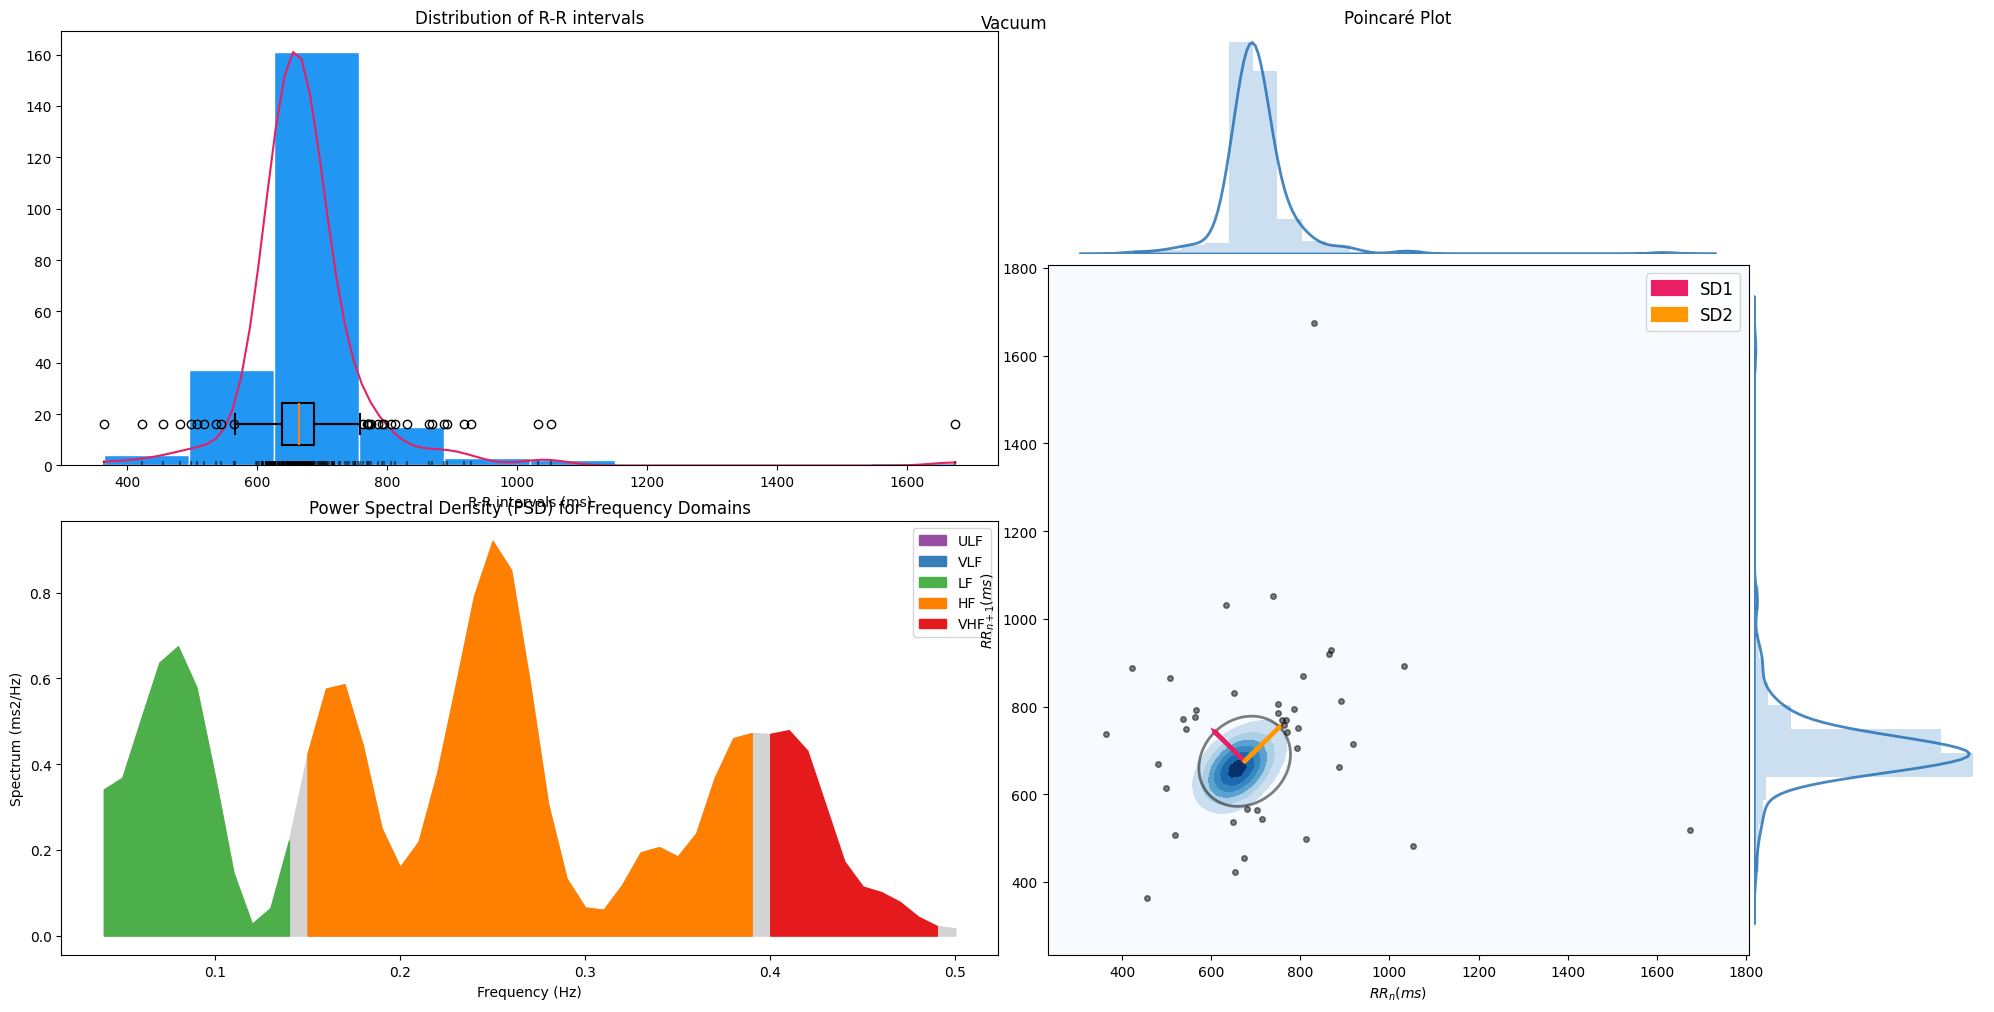

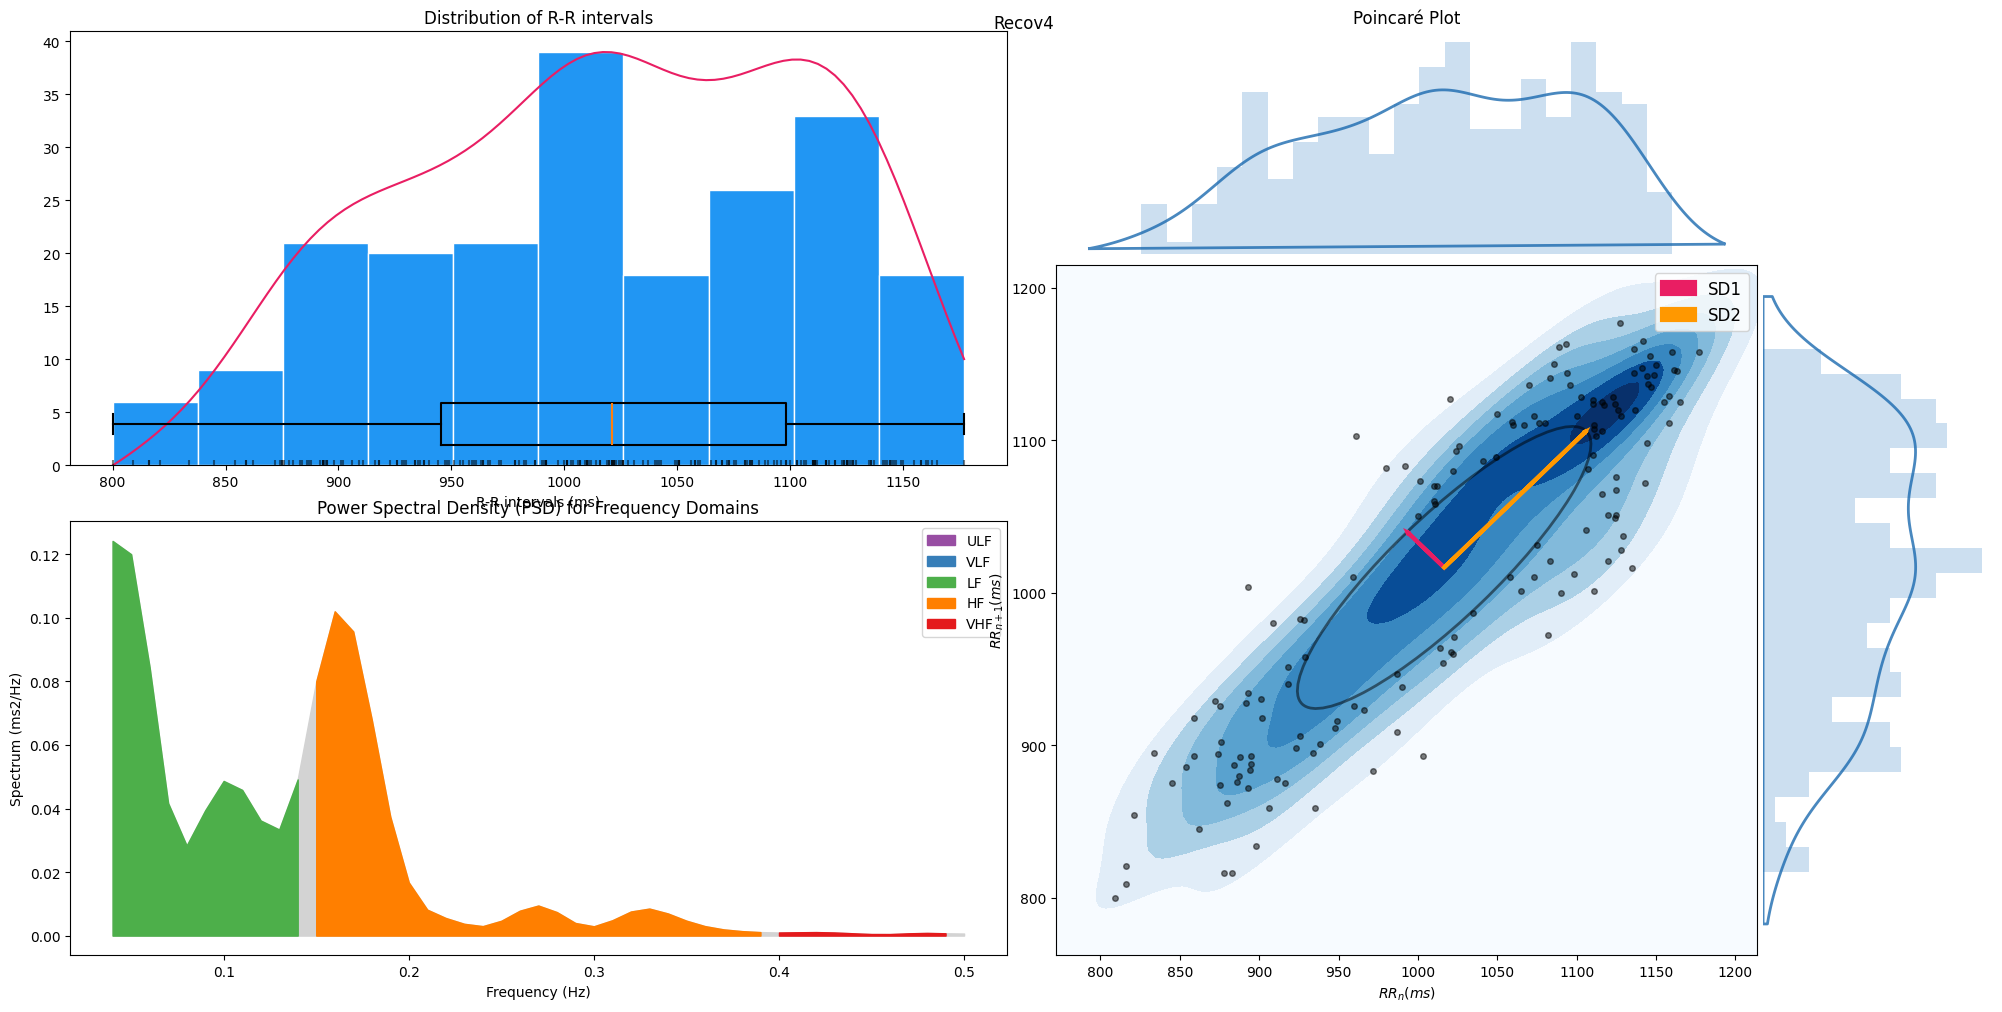

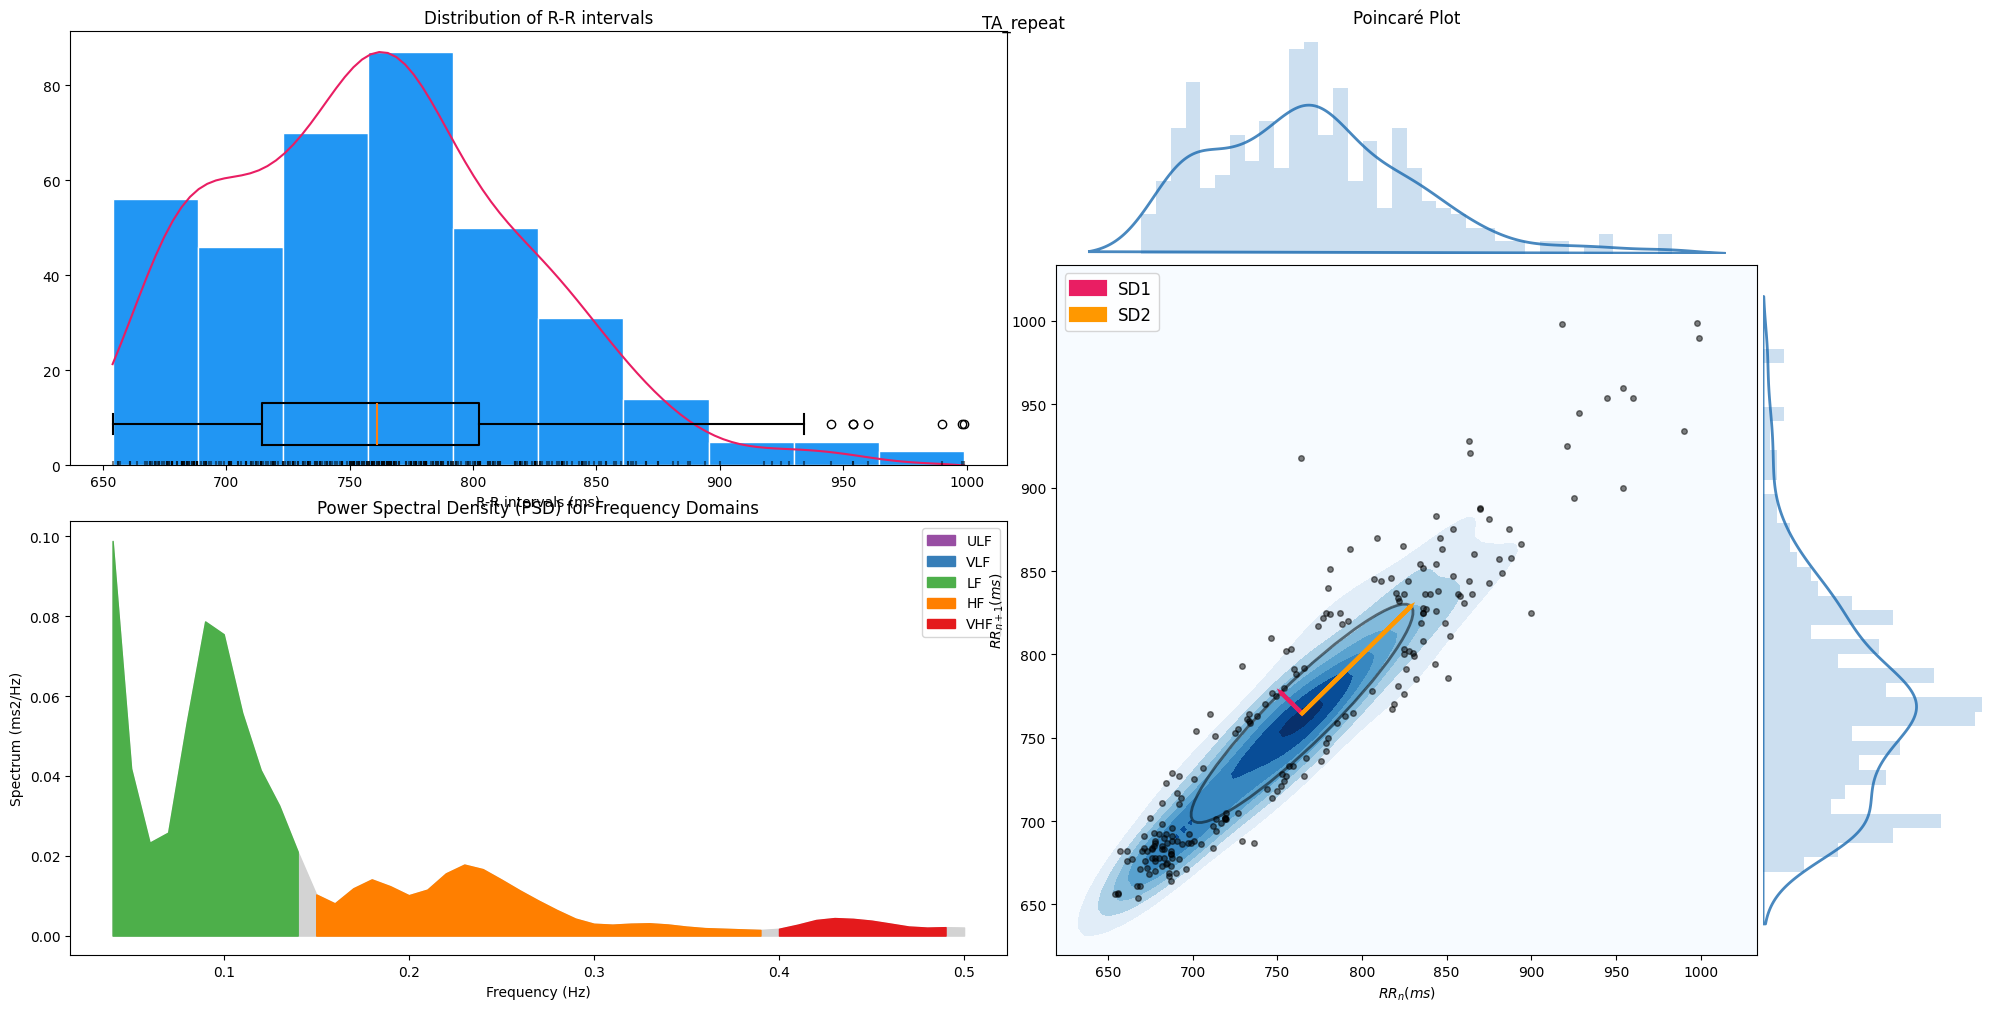

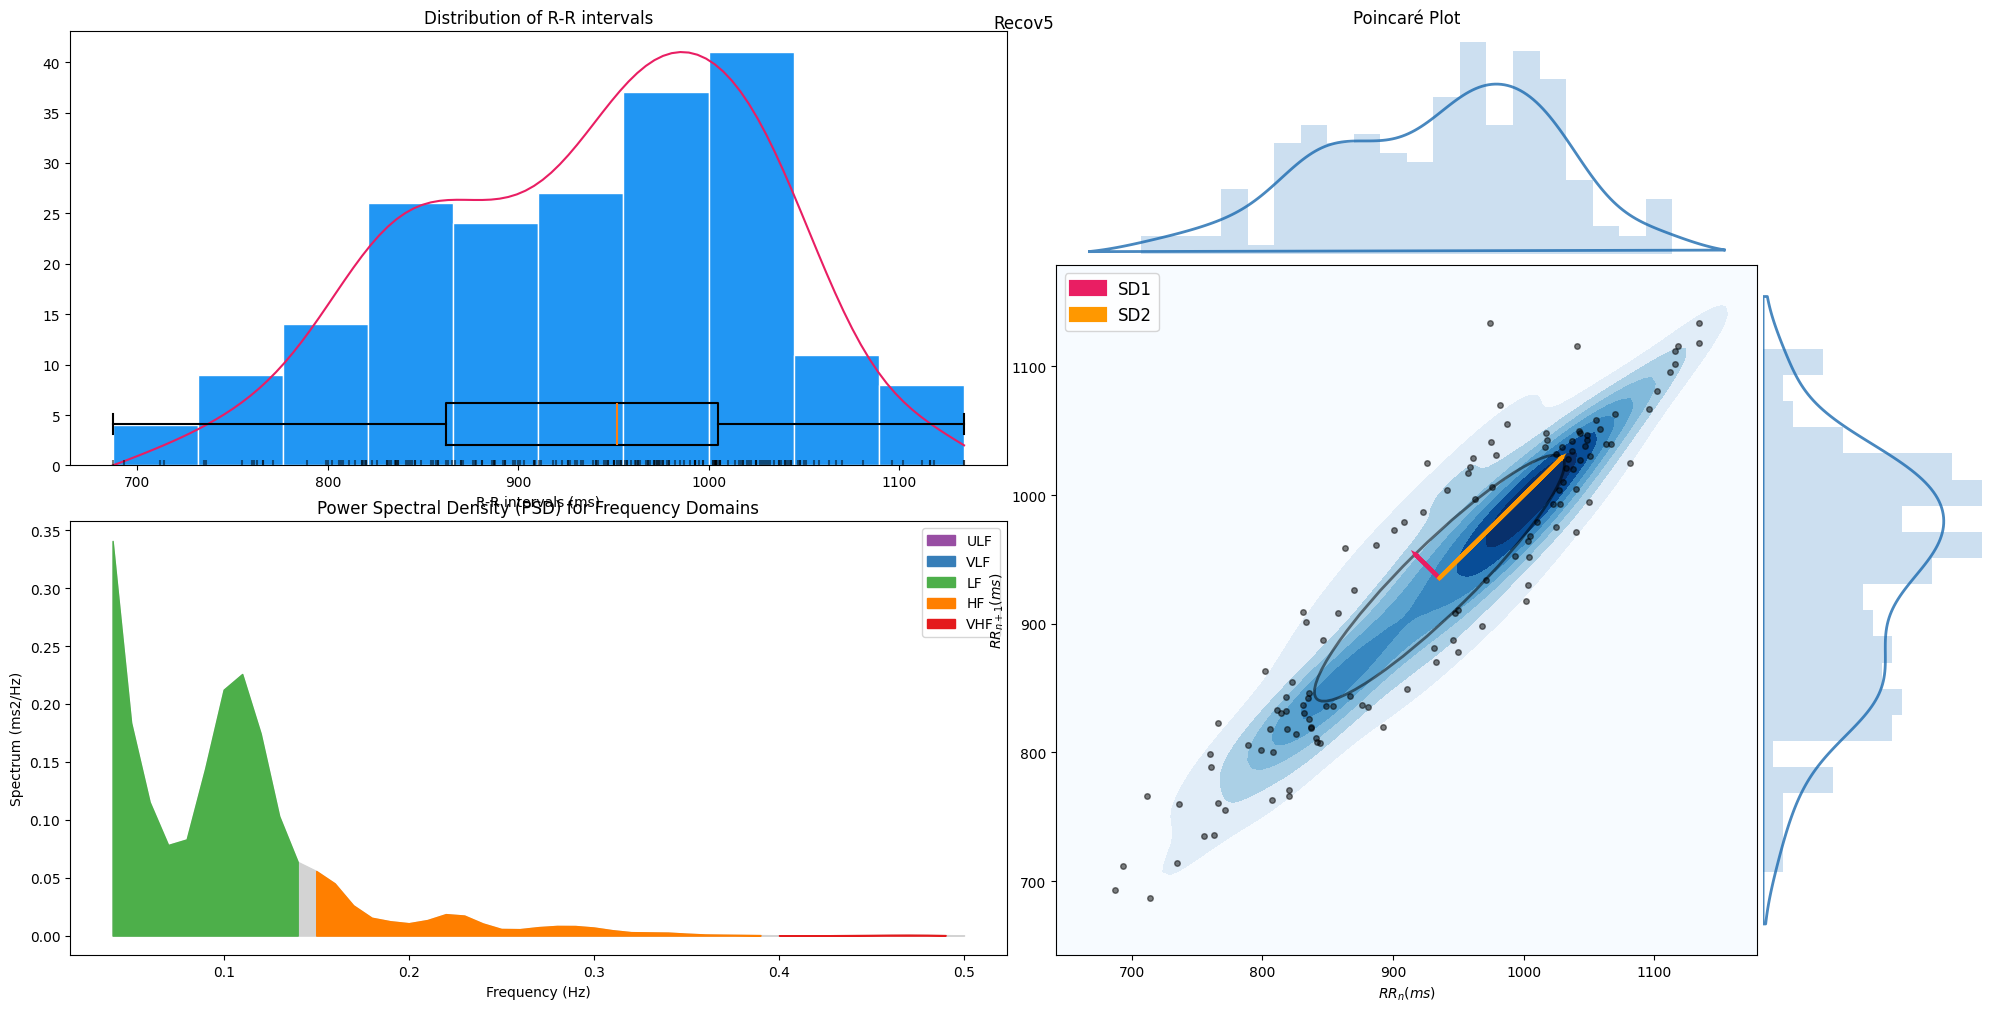

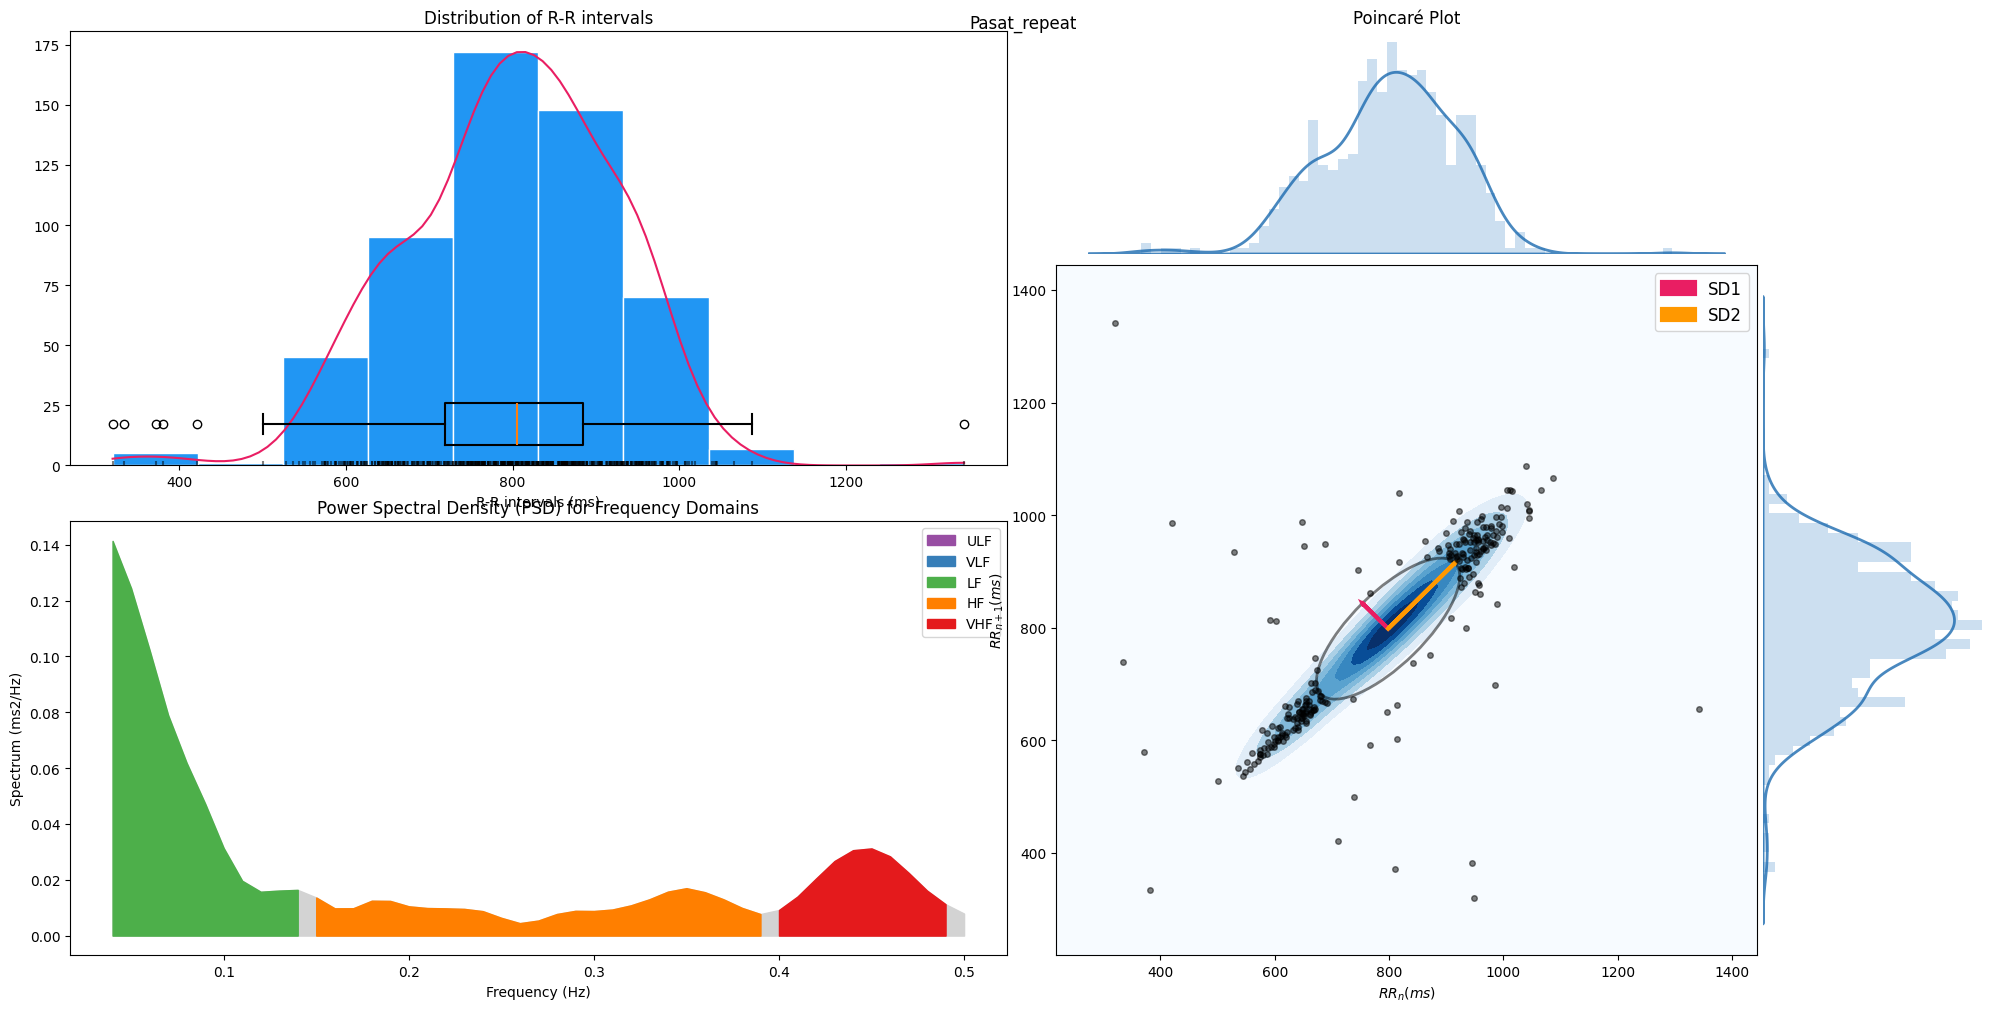

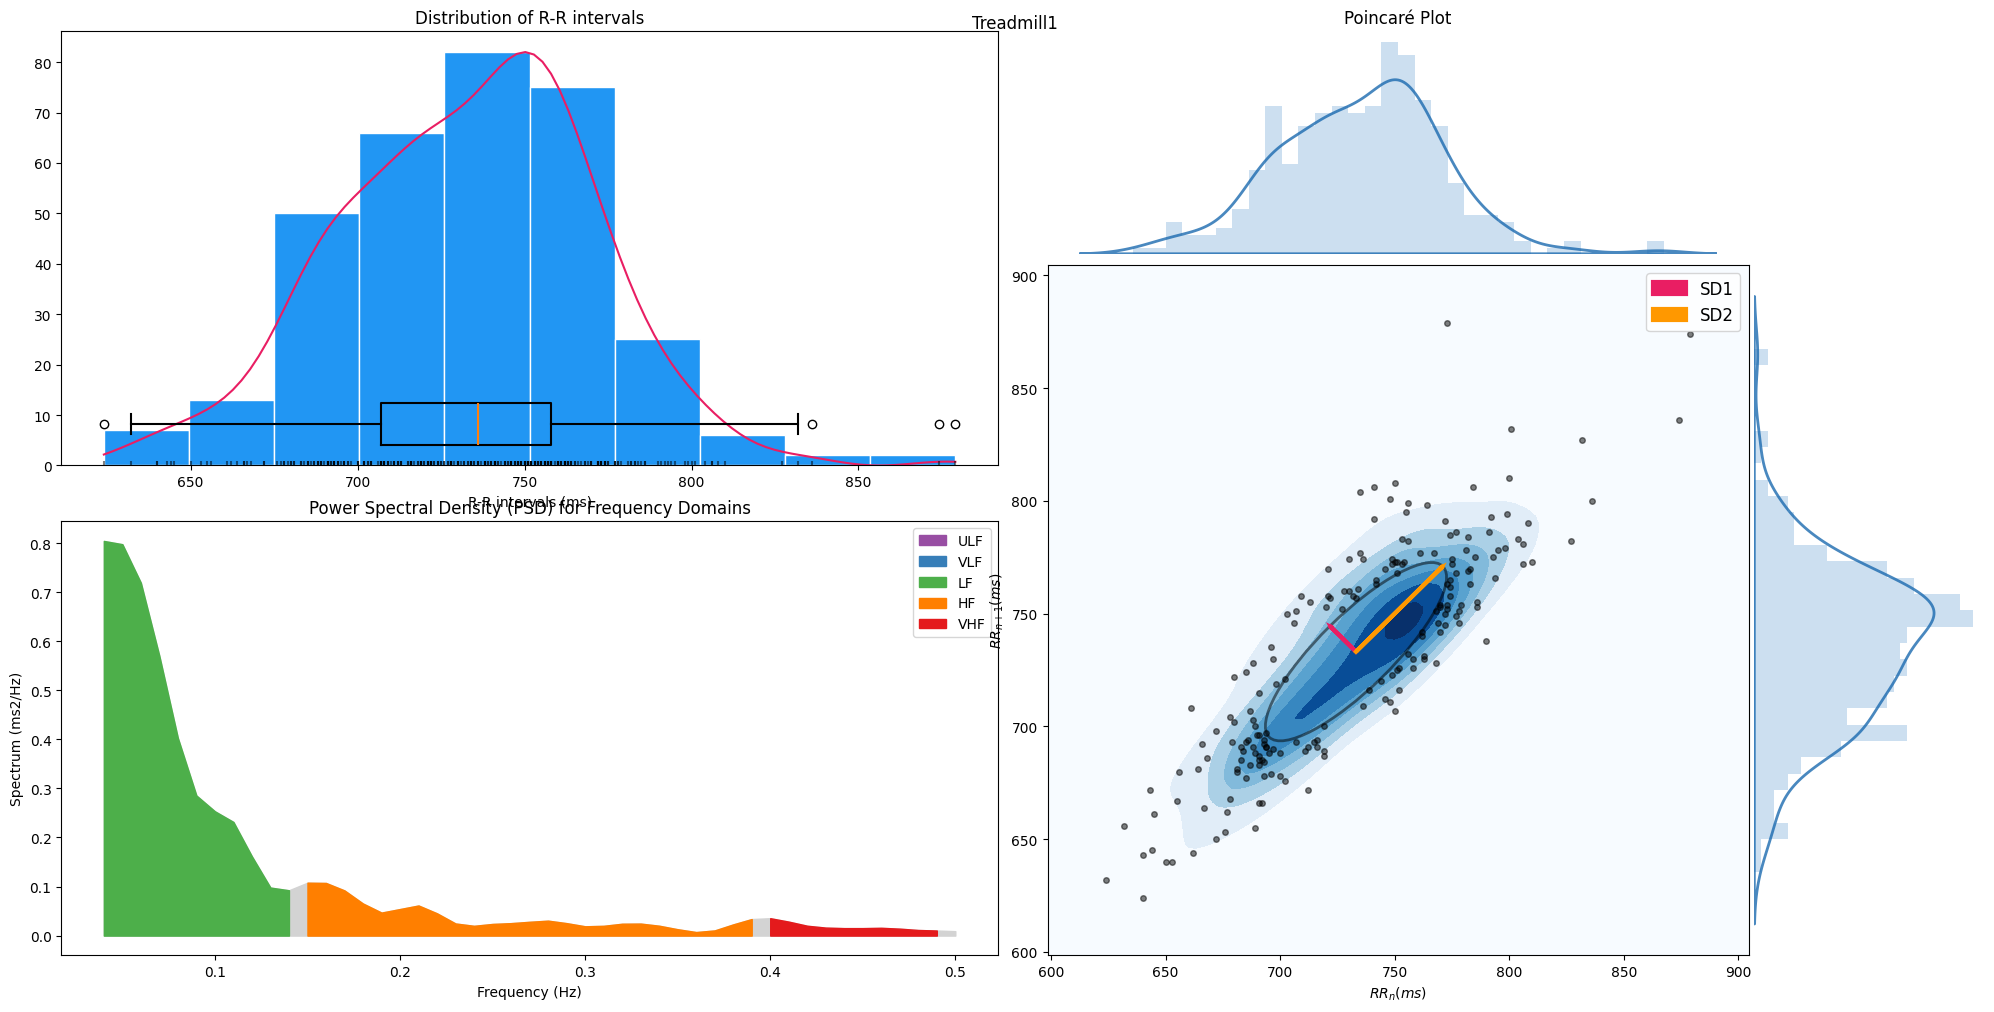

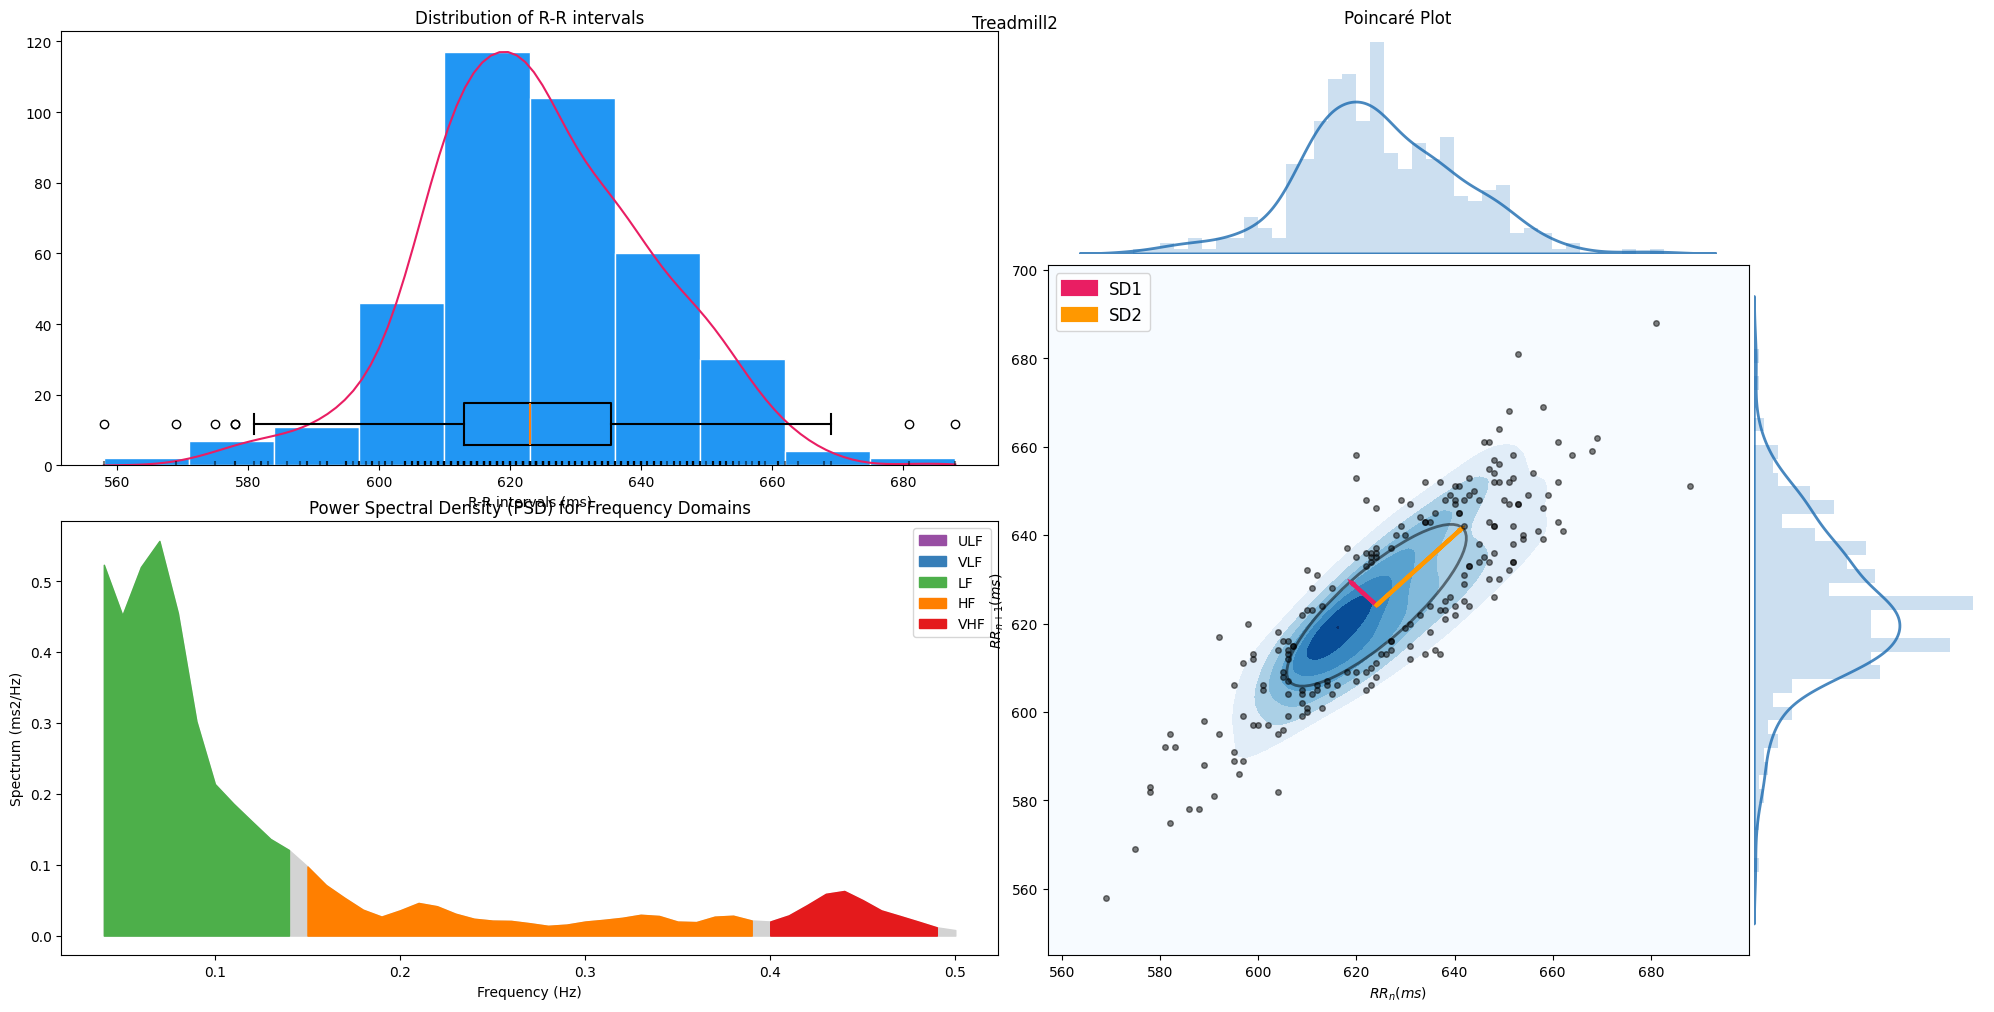

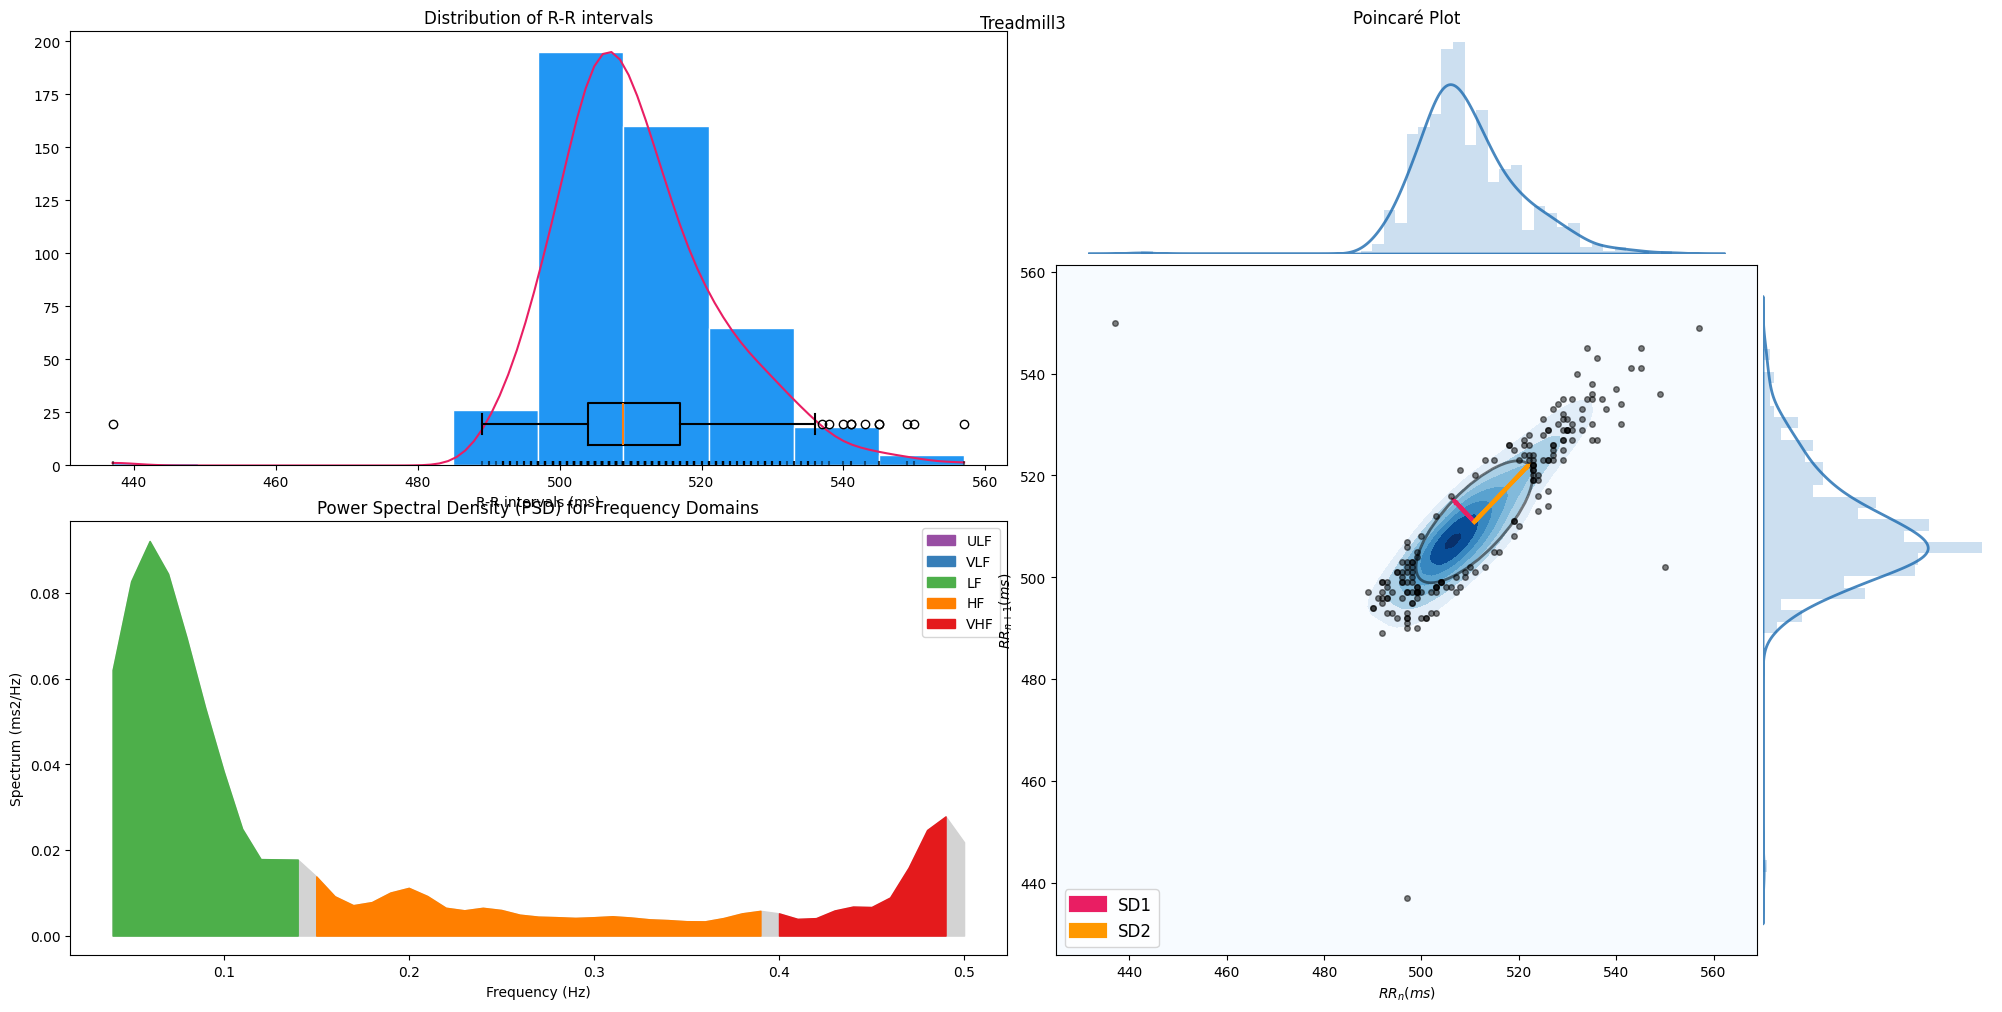

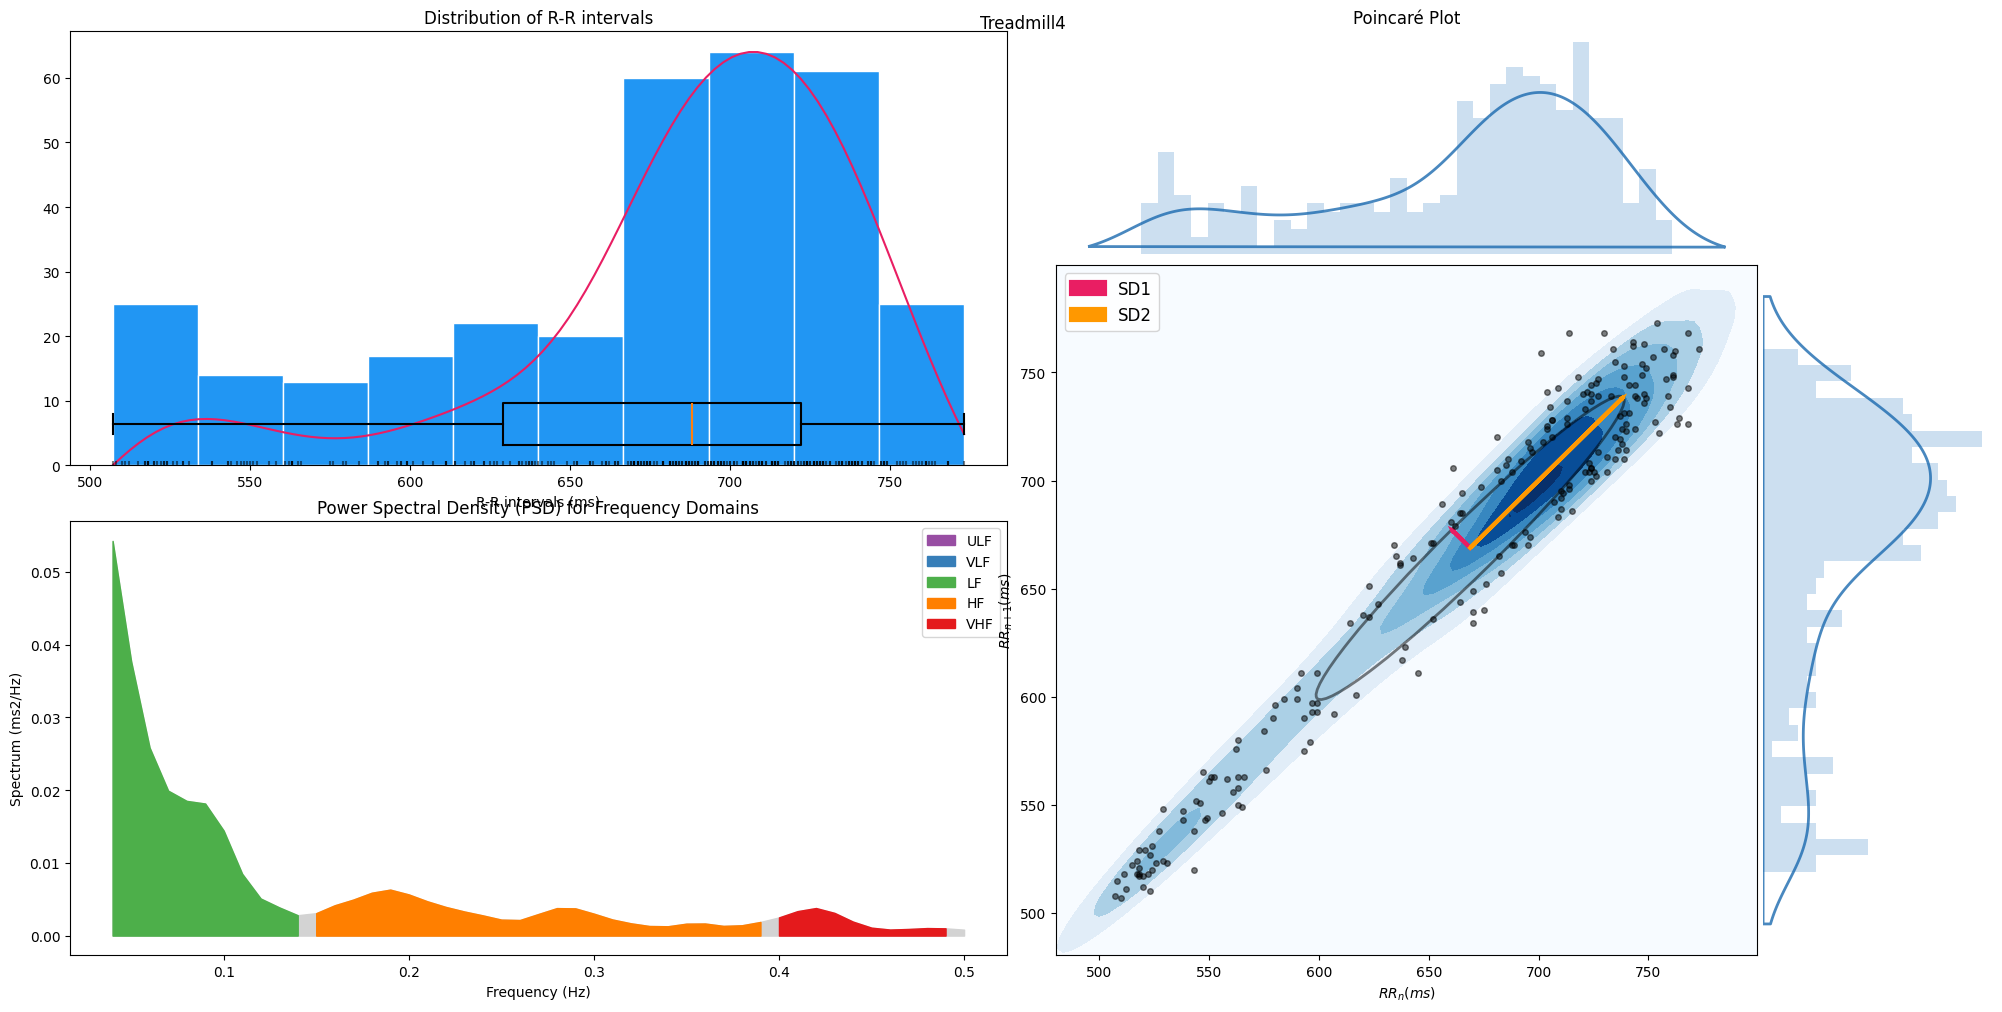

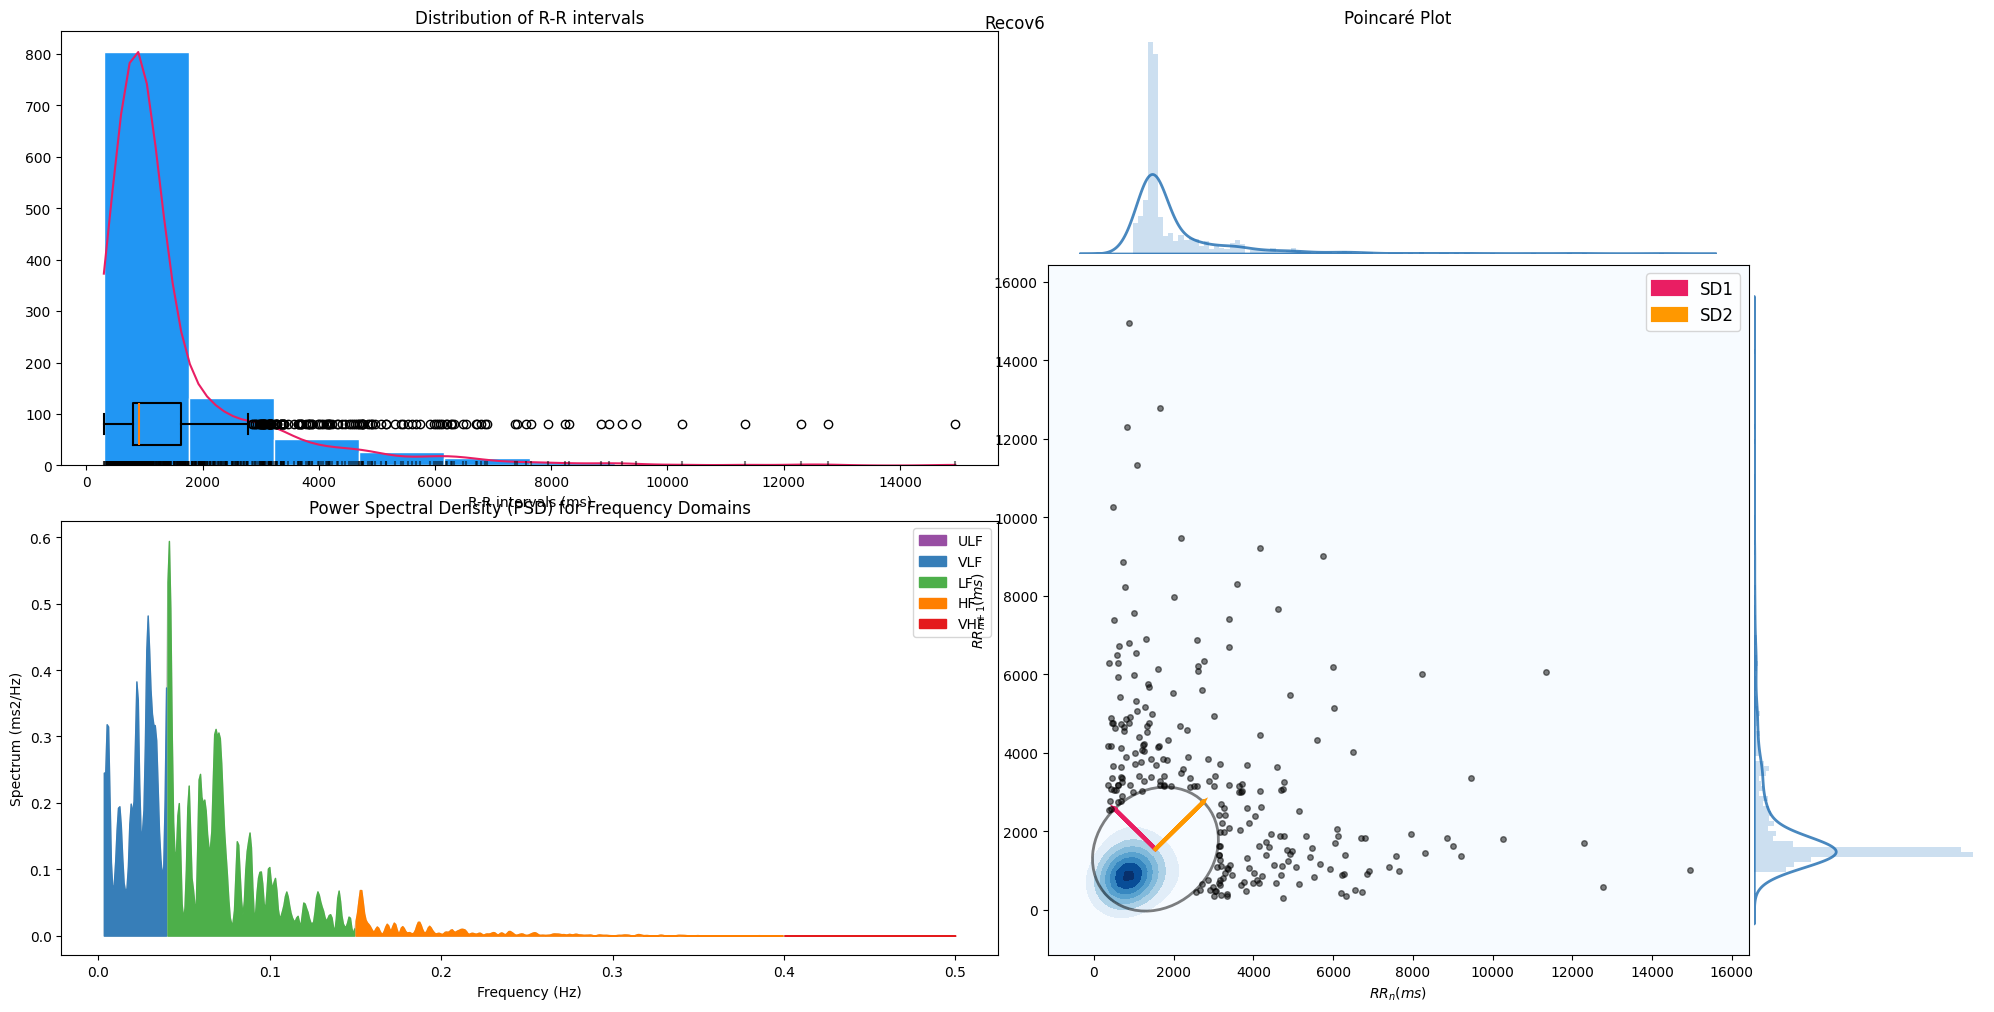

In [55]:
for category in df['category'].unique()[1:]:
    peaks, _ = nk.ecg_peaks(df[df['category'] == category]['ECG_Clean'], sampling_rate=sampling_rate)
    nk.hrv(peaks, sampling_rate=1000, show=True)
    plt.suptitle(category)

### Dataset Preprocessing Speed

In [7]:
dataset.select(range(0, len(dataset), step_size))

Dataset({
    features: ['timestamp', 'signal', 'signal_normalised', 'subject_id', 'category', 'code', 'ECG_Raw', 'ECG_Clean', 'ECG_Rate', 'ECG_Quality', 'ECG_R_Peaks', 'ECG_P_Peaks', 'ECG_P_Onsets', 'ECG_P_Offsets', 'ECG_Q_Peaks', 'ECG_R_Onsets', 'ECG_R_Offsets', 'ECG_S_Peaks', 'ECG_T_Peaks', 'ECG_T_Onsets', 'ECG_T_Offsets', 'ECG_Phase_Atrial', 'ECG_Phase_Completion_Atrial', 'ECG_Phase_Ventricular', 'ECG_Phase_Completion_Ventricular'],
    num_rows: 34768
})

In [ ]:
a = 0
for i in range(0, len(dataset), step_size):
    print(i, "-", a * step_size)
    if a > 20: 
        break
    a += 1

In [24]:
from collections import Counter

In [25]:
def method(data, idxs):
    return {
        'label': [Counter(dataset[idx:idx+n_window]['category']).most_common(1)[0][0] for idx in idxs]
    }

In [35]:
def method(data, idxs):
    from collections import Counter
    return {
        'label': [Counter(dataset.select(range(idx, idx + n_window))['category']).most_common(1)[0][0] for idx in idxs]
    }

In [26]:
len(dataset), len(dataset.select(range(0, len(dataset), step_size)))

(8692000, 34768)

In [36]:
dataset \
    .select(range(0, len(dataset), step_size)) \
    .map(
        method,
        batched=True,
        batch_size=1000,
        with_indices='idxs',
        num_proc=8,
    )

Map (num_proc=8):   0%|          | 0/34768 [00:01<?, ? examples/s]


NameError: name 'dataset' is not defined